# Global imports and data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from scipy.stats import skew, kurtosis, norm
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from numba import njit, prange
import statsmodels.formula.api as smf


In [2]:
metrics=['iou', 'boundary_iou','assd', 'cldice', 'hd', 'dsc', 'nsd', 'masd', 'hd_perc' ]
stats=['mean', 'median', 'std', 'trimmed_mean', 'iqr_length']
all_values=[]
for metric in metrics:
    for stat in stats:

        file_path = f"../../../results_metrics_segm/aggregated_results_{metric}_{stat}.csv"
        data = pd.read_csv(file_path)
        n_subset=data['n'].unique()
        tasks=data['subtask'].unique()
 
        algos=data['alg_name'].unique()
        for task in tasks: 
            data_task=data[data['subtask']==task]
            for algo in algos: 
                data_algo=data_task[data_task['alg_name']==algo]
                
                for n in n_subset:  # Show only selected n values
                    data_n = data_algo[data_algo['n'] == n]
                    method_dict = {
                        'basic': 'contains_true_stat_basic',
                        'bca': 'contains_true_stat_bca',
                        'percentile': 'contains_true_stat_percentile',
                    }

                    # Add parametric methods only for stat == 'mean'
                    if stat == 'mean':
                        method_dict.update({
                            'param_z': 'contains_true_stat_param_z',
                            'param_t': 'contains_true_stat_param_t'
                        })
                    for method, col in method_dict.items():
                        for val in data_n[col]:
                            
                            all_values.append({
                                'metric': metric,
                                'stat': stat,
                                'task':task, 
                                'algo':algo,
                                'n': n,
                                'method': method,
                                'coverage': val,
                            
                                'x_group': f"{metric}\nn={n}"
                            })
df_segm=pd.DataFrame(all_values)

In [3]:
metrics=['iou', 'boundary_iou','assd', 'cldice', 'hd', 'dsc', 'nsd', 'masd', 'hd_perc' ]
stats=['mean', 'median', 'std', 'trimmed_mean', 'iqr_length']
all_values_width=[]
for metric in metrics:
    for stat in stats:

        file_path = f"../../../results_metrics_segm/aggregated_results_{metric}_{stat}.csv"
        data = pd.read_csv(file_path)
        n_subset=data['n'].unique()
        tasks=data['subtask'].unique()
 
        algos=data['alg_name'].unique()
        for task in tasks: 
            data_task=data[data['subtask']==task]
            for algo in algos: 
                data_algo=data_task[data_task['alg_name']==algo]
                
                for n in n_subset:  # Show only selected n values
                    data_n = data_algo[data_algo['n'] == n]
                    method_dict = {
                        'basic': 'width_basic',
                        'bca': 'width_bca',
                        'percentile': 'width_percentile',
                    }

                    # Add parametric methods only for stat == 'mean'
                    if stat == 'mean':
                        method_dict.update({
                            'param_z': 'width_param_z',
                            'param_t': 'width_param_t'
                        })
                    for method, col in method_dict.items():
                        for val in data_n[col]:
                            
                            all_values_width.append({
                                'metric': metric,
                                'stat': stat,
                                'task':task, 
                                'algo':algo,
                                'n': n,
                                'method': method,
                                'width': val,
                                'x_group': f"{metric}\nn={n}"
                            })
df_segm_width=pd.DataFrame(all_values_width)

In [4]:
stats=['accuracy', 'ap', 'auc', 'f1_score']
all_values_micro=[]

for stat in stats:
    file_path = f"../../../results_metrics_classif/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'basic': 'contains_true_stat_basic',
                    'bca': 'contains_true_stat_bca',
                    'percentile': 'contains_true_stat_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'contains_true_stat_agresti_coull',
                        'wilson':'contains_true_stat_wilson',
                        'exact':'contains_true_stat_exact',
                        'wald': 'contains_true_stat_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_micro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'value': val,
                        
                            'x_group': f"n={n}"
                        })
df_micro=pd.DataFrame(all_values_micro)

In [5]:
stats=['accuracy', 'ap', 'auc', 'f1_score']
all_values_micro=[]

for stat in stats:
    file_path = f"../../../results_metrics_classif/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'basic': 'width_basic',
                    'bca': 'width_bca',
                    'percentile': 'width_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'width_agresti_coull',
                        'wilson':'width_wilson',
                        'exact':'width_exact',
                        'wald': 'width_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_micro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'width': val,
                        
                            'x_group': f"n={n}"
                        })
df_micro_width=pd.DataFrame(all_values_micro)

In [6]:
stats=['balanced_accuracy', 'ap', 'auc', 'f1_score']
all_values_macro=[]

for stat in stats:
    file_path = f"../../../results_metrics_classif_macro/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'basic': 'contains_true_stat_basic',
                    'bca': 'contains_true_stat_bca',
                    'percentile': 'contains_true_stat_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'contains_true_stat_agresti_coull',
                        'wilson':'contains_true_stat_wilson',
                        'exact':'contains_true_stat_exact',
                        'wald': 'contains_true_stat_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_macro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'value': val,
                        
                            'x_group': f"n={n}"
                        })
df_macro=pd.DataFrame(all_values_macro)

In [7]:
stats=['balanced_accuracy', 'ap', 'auc', 'f1_score']
all_values_macro=[]

for stat in stats:
    file_path = f"../../../results_metrics_classif_macro/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'basic': 'width_basic',
                    'bca': 'width_bca',
                    'percentile': 'width_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'width_agresti_coull',
                        'wilson':'width_wilson',
                        'exact':'width_exact',
                        'wald': 'width_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_macro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'width': val,
                        
                            'x_group': f"n={n}"
                        })
df_macro_width=pd.DataFrame(all_values_macro)

## Mappings to go from dataframe labels to proper figure labels

In [8]:
metric_labels = {
    'dsc': 'DSC',
    'iou': 'IoU',
    'nsd': 'NSD',
    'boundary_iou': 'Boundary IoU',
    'cldice': 'clDice',
    'assd': 'ASSD',
    'masd' : 'MASD',
    'hd': 'HD',
    'hd_perc': 'HD95',
    'balanced_accuracy': 'Balanced Accuracy',
    'ap': 'AP',
    'auc': 'AUC',
    'f1_score': 'F1 Score',
    'accuracy': 'Accuracy'
}

stat_labels = {
    'mean': 'Mean',
    'median': 'Median',
    'std': 'Standard Deviation',
    'trimmed_mean': 'Trimmed Mean',
    'iqr_length': 'IQR Length'
}

method_labels = {
    "basic": "Basic",
    "percentile": "Percentile",
    "bca": "BCa",
    "delong": "DeLong",
    "logit_transform": "Logit Transform",
    "wilson": "Wilson",
    "agresti_coull" : "Agresti-Coull",
    "exact" : "Exact \n(Cloper-Pearson)",
    "wald" : 'Wald',
    "param_t" : "Parametric t",
    "param_z" : "Parametric z"
}

## Colors attributed to different CI methods on graphs

In [9]:
method_colors = {
    "basic": "#E07A5F", 
    "percentile": "#B39DDB", 
    "bca" : "#F4A261",
    "wilson" : "#DFCF3E", 
    "agresti_coull" : "#5D9336", 
    "exact" : "#DB4ADB", 
    "wald" : "#367F9C", 
    "param_t" : "#999999", 
    "param_z" : "#A7C7E7"}

# Figure 3

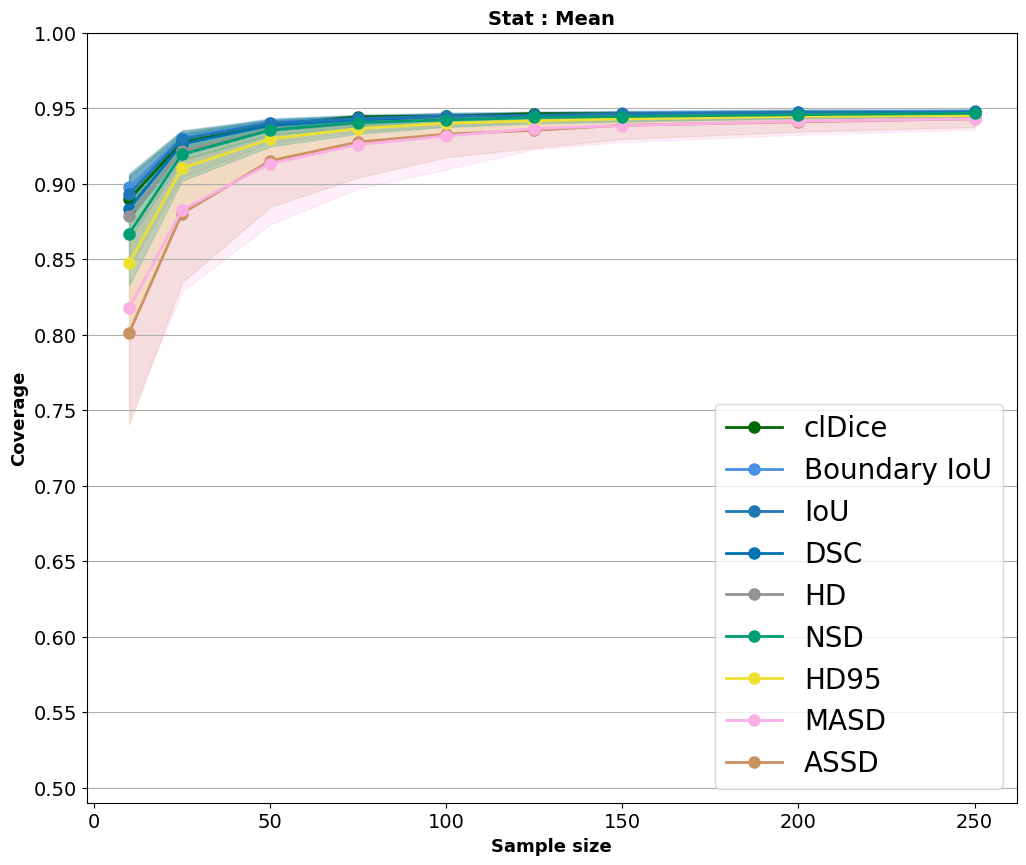

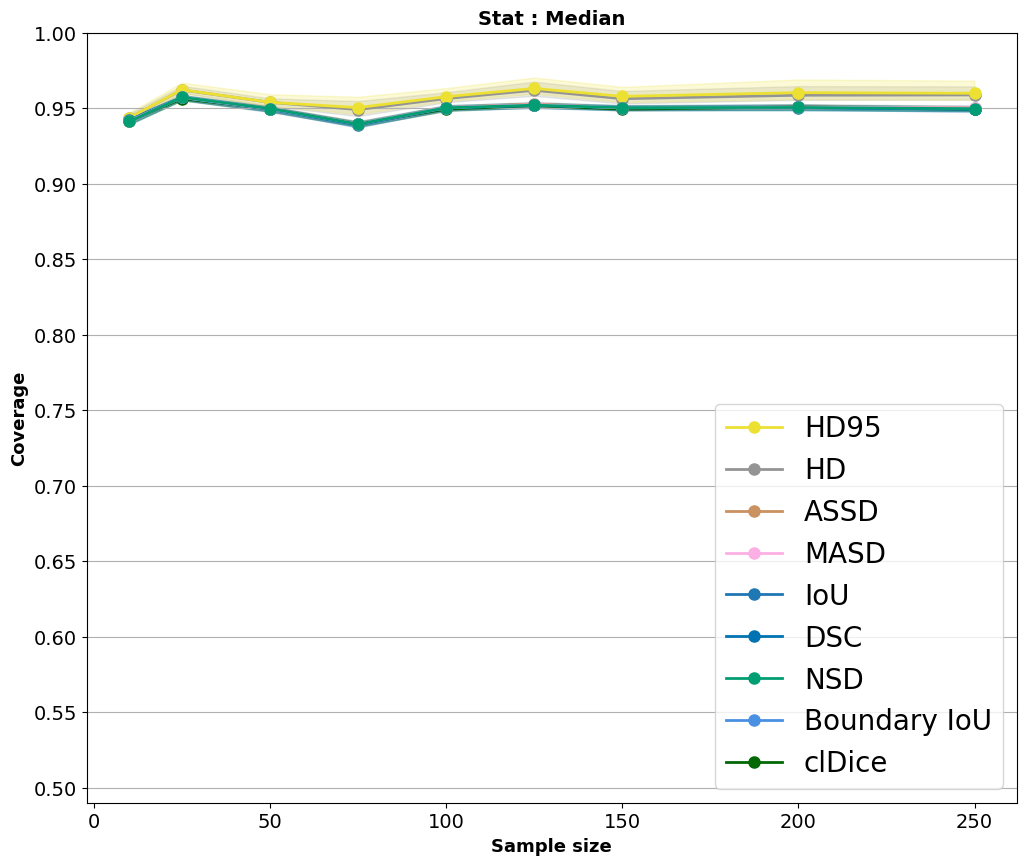

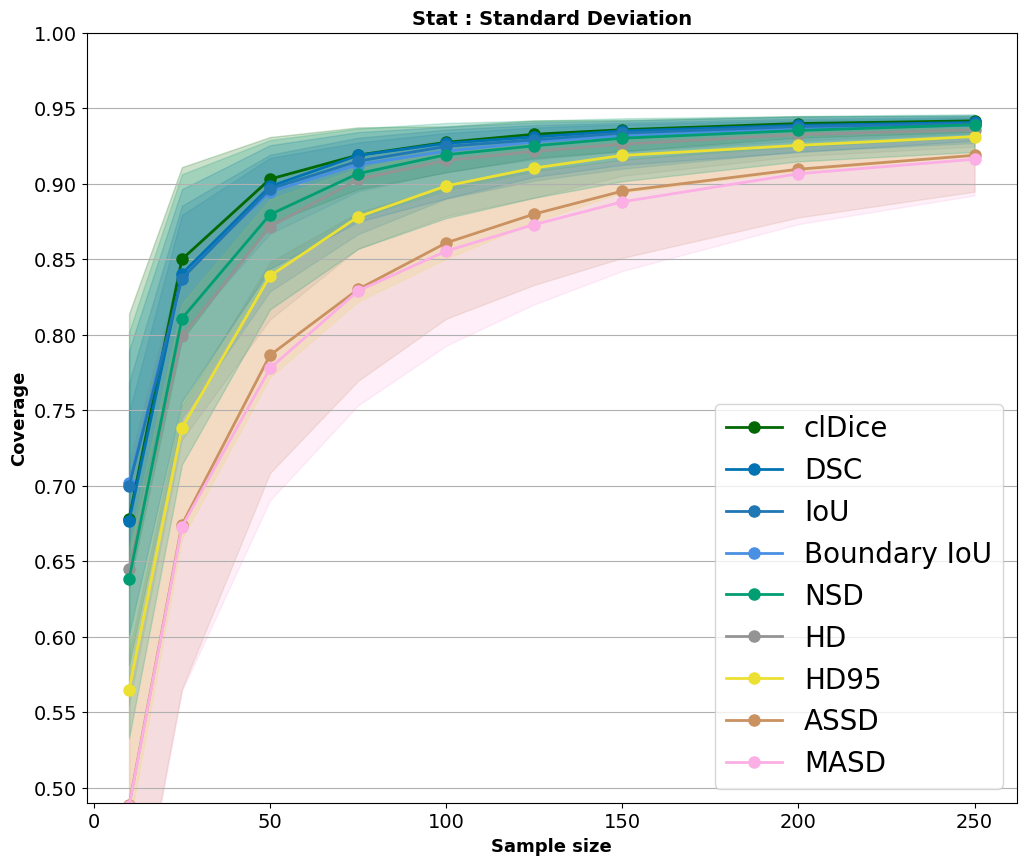

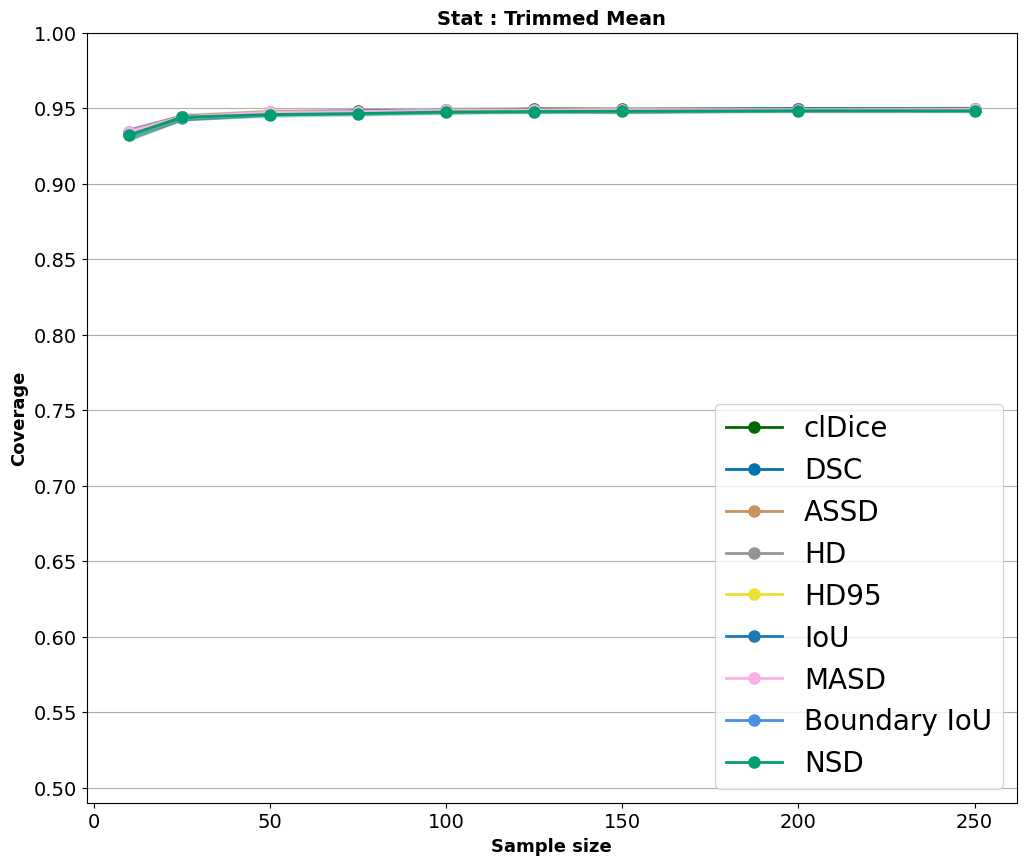

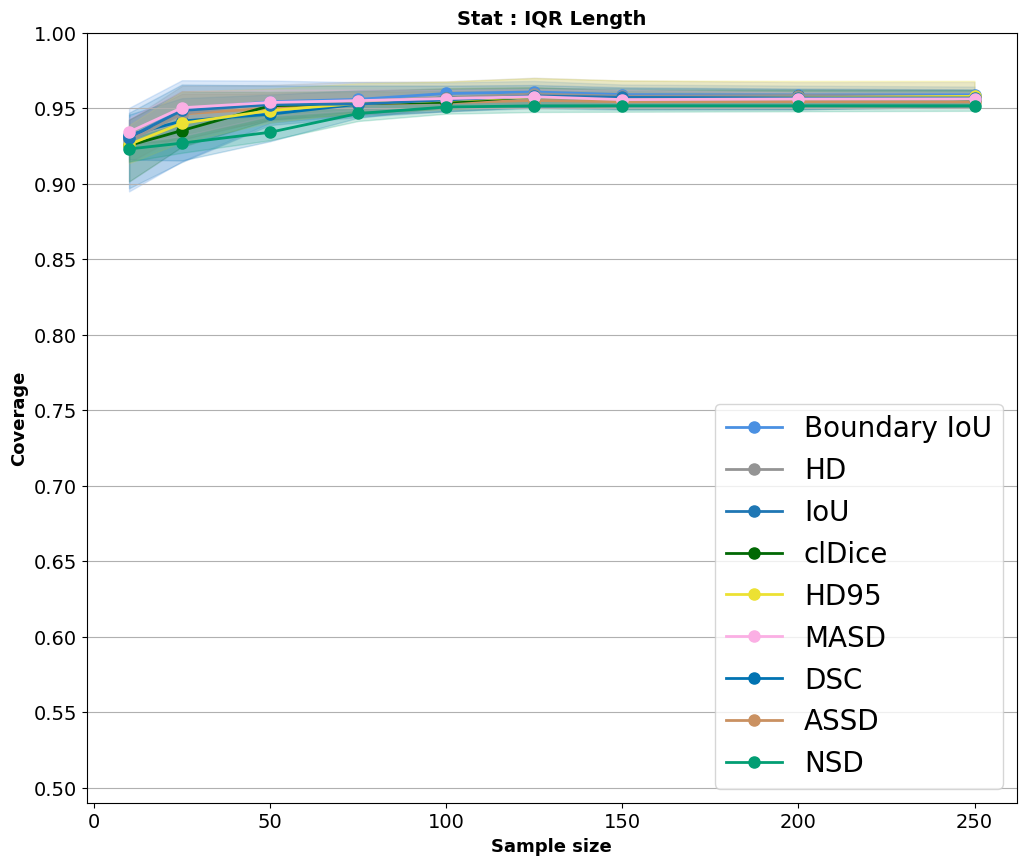

/var/folders/y8/p4xx_h_91xz7ddly7248g8cm0000gq/T/ipykernel_89415/2127776084.py:181: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([metric_labels[metric.get_text()] for metric in xticks])
/var/folders/y8/p4xx_h_91xz7ddly7248g8cm0000gq/T/ipykernel_89415/2127776084.py:183: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([metric_labels[metric.get_text()] for metric in xticks])


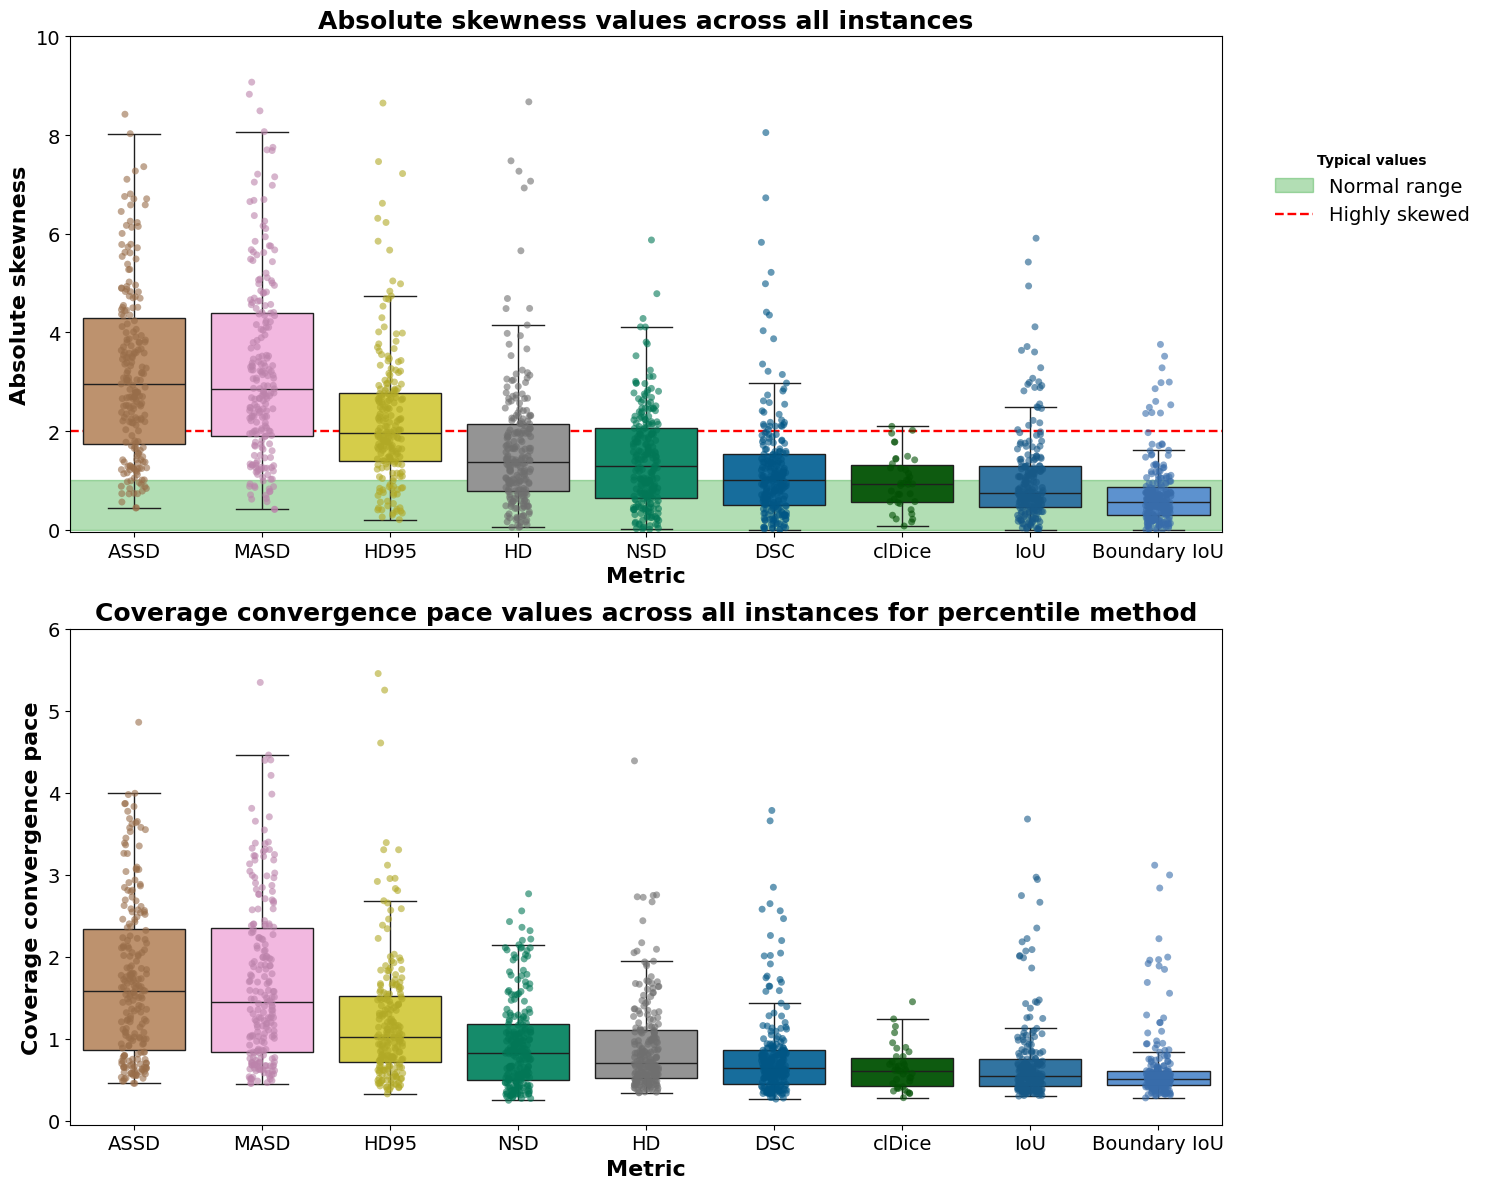

In [ ]:
metric_order =['dsc', 'iou', 'nsd', 'boundary_iou', 'cldice', 'assd', 'masd', 'hd', 'hd_perc' ]

palette = sns.color_palette("colorblind", len(metric_order))
color_dict = dict(zip(metric_order, palette))
color_dict.update({
    "iou": (31/255, 119/255, 180/255),        # #1f77b4 -> RGB normalized
    "boundary_iou": (74/255, 144/255, 226/255),  # #4a90e2 -> RGB normalized
    "cldice": (1/255, 104/255, 4/255)         # #016804 -> RGB normalized
})
stats=["mean"]

for stat in stats:
    data_stat=df_segm[df_segm['stat']==stat]
    data_method=data_stat[data_stat['method']=='percentile']

    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    for metric, df_metric in data_method.groupby('metric'):
        medians = data_method[data_method['metric']==metric].groupby('n')['coverage'].median().values
        q1 = data_method[data_method['metric']==metric].groupby('n')['coverage'].quantile(0.25).values
        q3 = data_method[data_method['metric']==metric].groupby('n')['coverage'].quantile(0.75).values
        ax.plot(df_metric['n'].unique(), medians, marker='o', label=metric_labels[metric], color=color_dict[metric], linewidth=2, markersize=8)
        ax.fill_between(df_metric['n'].unique(), q1, q3, alpha=0.2, color=color_dict[metric])

    ax.set_title(f'Stat : {stat_labels[stat]}', weight='bold', fontsize=14)
    ax.set_xlabel('Sample size', weight='bold', fontsize=13)
    ax.set_ylabel('Coverage', weight='bold',fontsize=13)
    ax.grid(True, axis='y')
    # Sort the legend by median value at n=125
    legend_order = (
        data_method[data_method['n'] == 125]
        .groupby('metric')['coverage']
        .median()
        .sort_values(ascending=False)
        .index
    )
    legend_order = pd.Index([metric_labels[m] for m in legend_order])

    handles, labels = ax.get_legend_handles_labels()
    sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: legend_order.get_loc(x[1]))
    sorted_handles, sorted_labels = zip(*sorted_handles_labels)
    ax.legend(sorted_handles, sorted_labels, fontsize=20, loc="lower right")
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylim(0.49,1)
    ax.set_yticks(np.arange(0.5, 1.05, 0.05))
    plt.savefig(f'../../../clean_figs/fig_3a_{stat}.pdf')
    plt.show()

data= pd.read_csv("../../../data_matrix_grandchallenge_all.csv")

results=[]
metrics=data['score'].unique()
for score in metrics:
    df=data[data['score']==score]
    algos=df['alg_name'].unique()
    score=df['score'].unique()[0]
    count_total=0
    for alg in algos:

        df_alg= df[df['alg_name']==alg]
        tasks = df_alg['subtask'].unique()
        for task in tasks:
            if score=='cldice' and task not in  ['Task08_HepaticVessel_L1','Task08_HepaticVessel_L2']:
                continue 
            else:
                values = df_alg[df_alg['subtask'] == task]['value'].dropna()
                if len(values)<50:
                    continue
                count_total+=1
                value={
                'Metric':score,
                'algorithm': alg,
                'subtask': task,
                'skewness': skew(values),
                'kurtosis': kurtosis(values),
                'Mean': np.mean(values), 
                'Standard error': np.std(values, ddof=1),
                "total_number": count_total
                }  
    
                results.append(value)
results_df= pd.DataFrame(results)
for score in metrics: 
    mask = results_df['Metric'] == score
    max_val = results_df.loc[mask, 'total_number'].max()
    results_df.loc[mask, 'total_number'] = max_val
results = []

for task in df_segm['task'].unique():
    df_task = df_segm[df_segm['task'] == task]
    for algo in df_task['algo'].unique():
        df_algo = df_task[df_task['algo'] == algo]
        for metric in df_algo['metric'].unique():
            df_metric_stat = df_algo[(df_algo['metric'] == metric) & (df_algo['stat']=='mean')]
            for method in df_metric_stat['method'].unique():
                df_metric_stat_method = df_metric_stat[df_metric_stat['method'] == method]
                df_metric_stat_method = df_metric_stat_method.sort_values(by='n')
                n_values = df_metric_stat_method['n'].to_numpy()
                coverages = df_metric_stat_method['coverage'].to_numpy()
                Y = 0.95 - coverages
                X = np.vstack([1/n_values]).T
                beta2, res = np.linalg.lstsq(X, Y, rcond=None)[:2]
                rel_error = np.abs(res[0]) / np.sum(Y**2)
                new_row = {
                    'task': task,
                    'algo': algo,
                    'metric': metric,
                    'stat': "mean",
                    'method': method,
                    'beta2': beta2[0],
                    'R2': rel_error
                }
                results.append(new_row)
df_fit_results = pd.DataFrame(results)

# Add skewness to df_fit_results
df_fit_results = df_fit_results.merge(results_df[['Metric', 'algorithm', 'subtask', 'skewness', "kurtosis"]], 
                                      left_on=['metric', 'algo', 'task'], 
                                      right_on=['Metric', 'algorithm', 'subtask'], 
                                      how='left')

df_fit_results.drop(columns=['Metric', 'algorithm', 'subtask'], inplace=True)

df_fit_results = df_fit_results[df_fit_results['method']=="percentile"]

plt.rcdefaults()
sns.reset_defaults()

def darken_color(color, amount=0.8):
    return tuple(min(max(c * amount, 0), 1) for c in color)

dark_color_dict = {k: darken_color(v, 0.75) for k, v in color_dict.items()}

df_fit_results["abs_skewness"] = df_fit_results["skewness"].abs()
# Sort metrics by descending absolute skewness
sorted_metrics = df_fit_results.groupby('metric')["abs_skewness"].median().sort_values(ascending=False).index


label_fontsize = 16
legend_fontsize = 14
title_fontsize = 18
tick_fontsize = 14

# Create a single figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot Absolute Skewness
axes[0].axhspan(0, 1, color='#009409', alpha=0.3, label='Normal range')
axes[0].axhline(2, color='red', linestyle='--', label='Highly skewed', linewidth=1.7)
sns.boxplot(x='metric', y='abs_skewness', data=df_fit_results, order=sorted_metrics, hue="metric", showfliers=False, palette=color_dict, linewidth=1, ax=axes[0])
sns.stripplot(x='metric', y='abs_skewness', data=df_fit_results, order=sorted_metrics, hue="metric", jitter=True, alpha=0.6, palette=dark_color_dict, legend=False, ax=axes[0])

axes[0].set_title('Absolute skewness values across all instances', weight='bold', fontsize=title_fontsize)
axes[0].set_ylabel('Absolute skewness', weight='bold', fontsize=label_fontsize)
axes[0].set_xlabel('Metric', weight='bold', fontsize=label_fontsize)
axes[0].legend(title="Typical values",
               loc='upper right',
               frameon=False,
               fontsize=legend_fontsize,
               title_fontproperties=FontProperties(weight='bold'),
               bbox_to_anchor=(1.23, 0.8))
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
axes[0].set_ylim(-0.05, 10)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)

sorted_metrics = df_fit_results.groupby('metric')["beta2"].median().sort_values(ascending=False).index
# Plot Coverage Error Constant
sns.boxplot(x='metric', y='beta2', data=df_fit_results, order=sorted_metrics, hue="metric", showfliers=False, palette=color_dict, linewidth=1, ax=axes[1])
sns.stripplot(x='metric', y='beta2', data=df_fit_results, order=sorted_metrics, hue="metric", jitter=True, alpha=0.6, palette=dark_color_dict, legend=False, ax=axes[1])

axes[1].set_title('Coverage convergence pace values across all instances for percentile method', weight='bold', fontsize=title_fontsize)
axes[1].set_ylabel('Coverage convergence pace', weight='bold', fontsize=label_fontsize)
axes[1].set_xlabel('Metric', weight='bold', fontsize=label_fontsize)
axes[1].set_ylim(-0.05, 6)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)

# Adjust x-axis labels for both subplots
xticks = axes[1].get_xticklabels()
axes[1].set_xticklabels([metric_labels[metric.get_text()] for metric in xticks])
xticks = axes[0].get_xticklabels()
axes[0].set_xticklabels([metric_labels[metric.get_text()] for metric in xticks])

plt.tight_layout()
plt.savefig('../../../clean_figs/fig_3_bc.pdf')
plt.show()


In [ ]:
df_fit_results['skewness_sq'] = df_fit_results['skewness'] ** 2 
df_fit_results["task_metric"] = df_fit_results["task"] + "_" + df_fit_results["metric"] 
df_fit_results = df_fit_results.reset_index(drop=True)
df_fit_results["task_metric"] = df_fit_results["task_metric"].astype(str)
df_fit_results = df_fit_results.dropna(subset=["beta2", "skewness_sq", "kurtosis", "task_metric"])

# --- Base model ---
model = smf.mixedlm("beta2 ~ skewness", df_fit_results, groups=df_fit_results["task_metric"])
fit = model.fit()

# --- Function to compute marginal R² ---
def compute_r2_marginal(fit, df):
    var_resid = fit.scale
    var_random = fit.cov_re.iloc[0, 0]

    X_fixed = pd.DataFrame({
        "Intercept": 1,
        "skewness": df["skewness"].astype(float)
    }, index=df.index)

    fe_params = fit.fe_params
    mu_fixed = X_fixed.dot(fe_params)
    var_fixed = np.var(mu_fixed, ddof=0)

    return var_fixed / (var_fixed + var_random + var_resid)

# --- Observed R² ---
R2_marginal = compute_r2_marginal(fit, df_fit_results)
print(f"Observed R²_marginal = {R2_marginal:.4f}")

# -------------------
# Bootstrap CI (two-level)
# -------------------
n_boot = 9999
boot_r2 = []
groups = df_fit_results["task_metric"].unique()
rng = np.random.default_rng(seed=42)

for b in range(n_boot):
    print(b)
    # Step 1: sample groups with replacement
    sampled_groups = rng.choice(groups, size=len(groups), replace=True)
    boot_samples = []

    # Step 2: within each group, resample observations with replacement
    for g in sampled_groups:
        df_group = df_fit_results[df_fit_results["task_metric"] == g]
        df_group_boot = df_group.sample(n=len(df_group), replace=True, random_state=rng.integers(1e9))
        df_group_boot["task_metric"] = g  # keep same group label
        boot_samples.append(df_group_boot)

    # Combine into one bootstrap dataset
    df_boot = pd.concat(boot_samples, ignore_index=True)

    try:
        model_boot = smf.mixedlm("beta2 ~ skewness", df_boot, groups=df_boot["task_metric"])
        fit_boot = model_boot.fit()
        r2_boot = compute_r2_marginal(fit_boot, df_boot)
        boot_r2.append(r2_boot)
    except Exception:
        
        continue  # skip failed fits

# --- Bootstrap CI ---
r2_ci_lower = np.percentile(boot_r2, 2.5)
r2_ci_upper = np.percentile(boot_r2, 97.5)
print(f"Bootstrap 95% CI for R²_marginal: [{r2_ci_lower:.4f}, {r2_ci_upper:.4f}]")


Observed R²_marginal = 0.4843
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269


# Figure 4

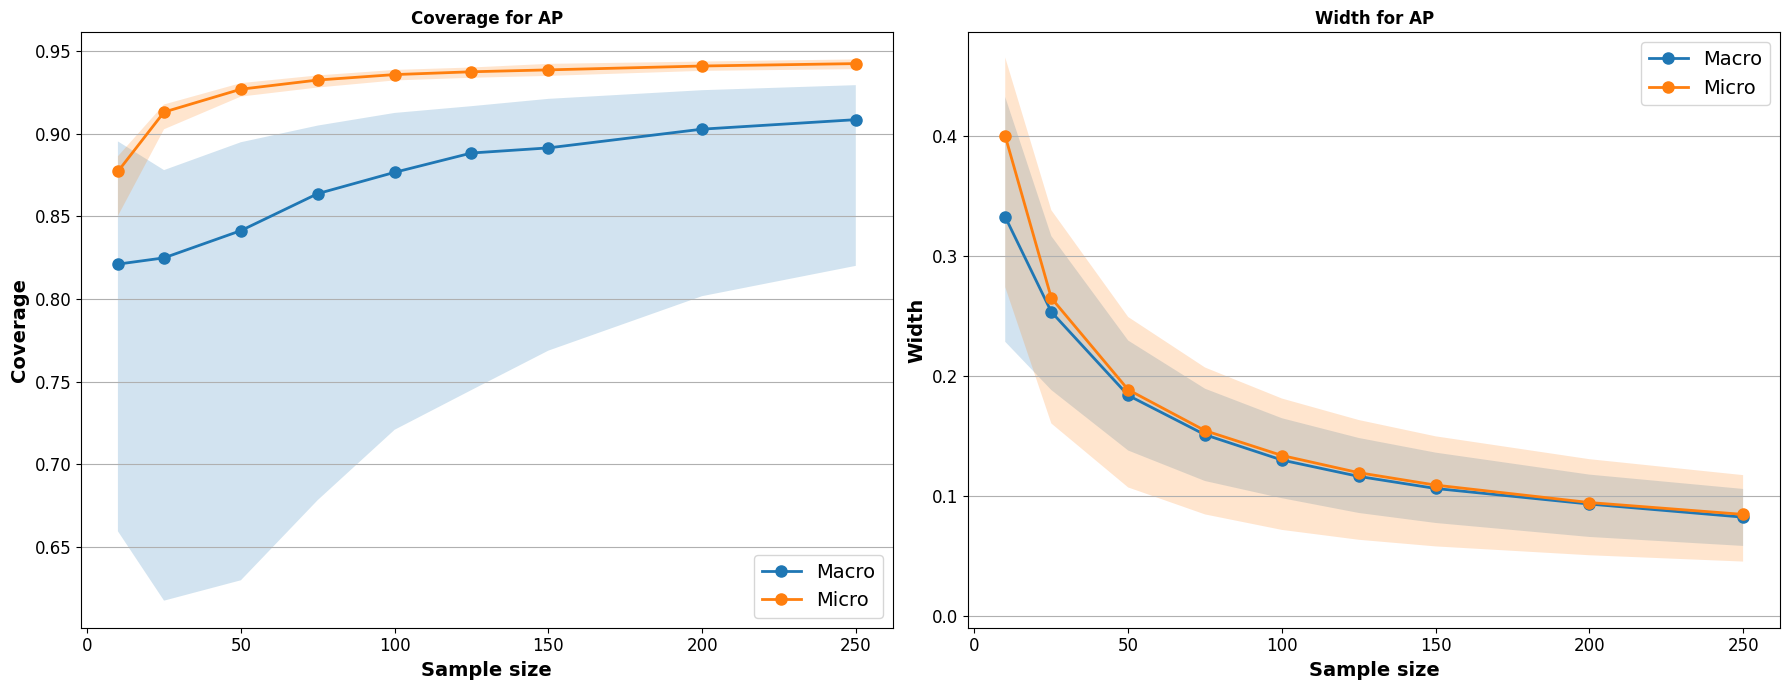

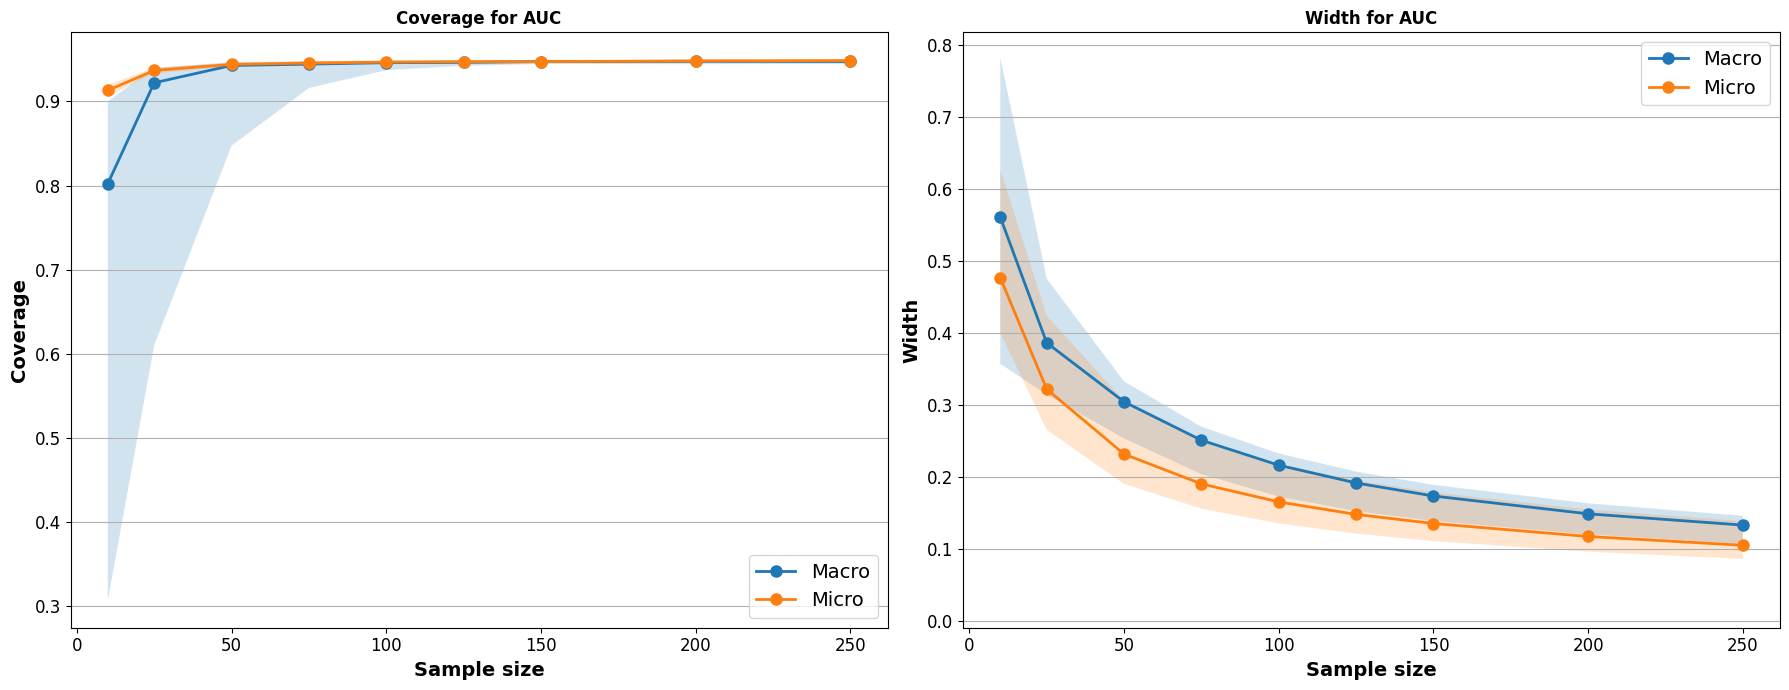

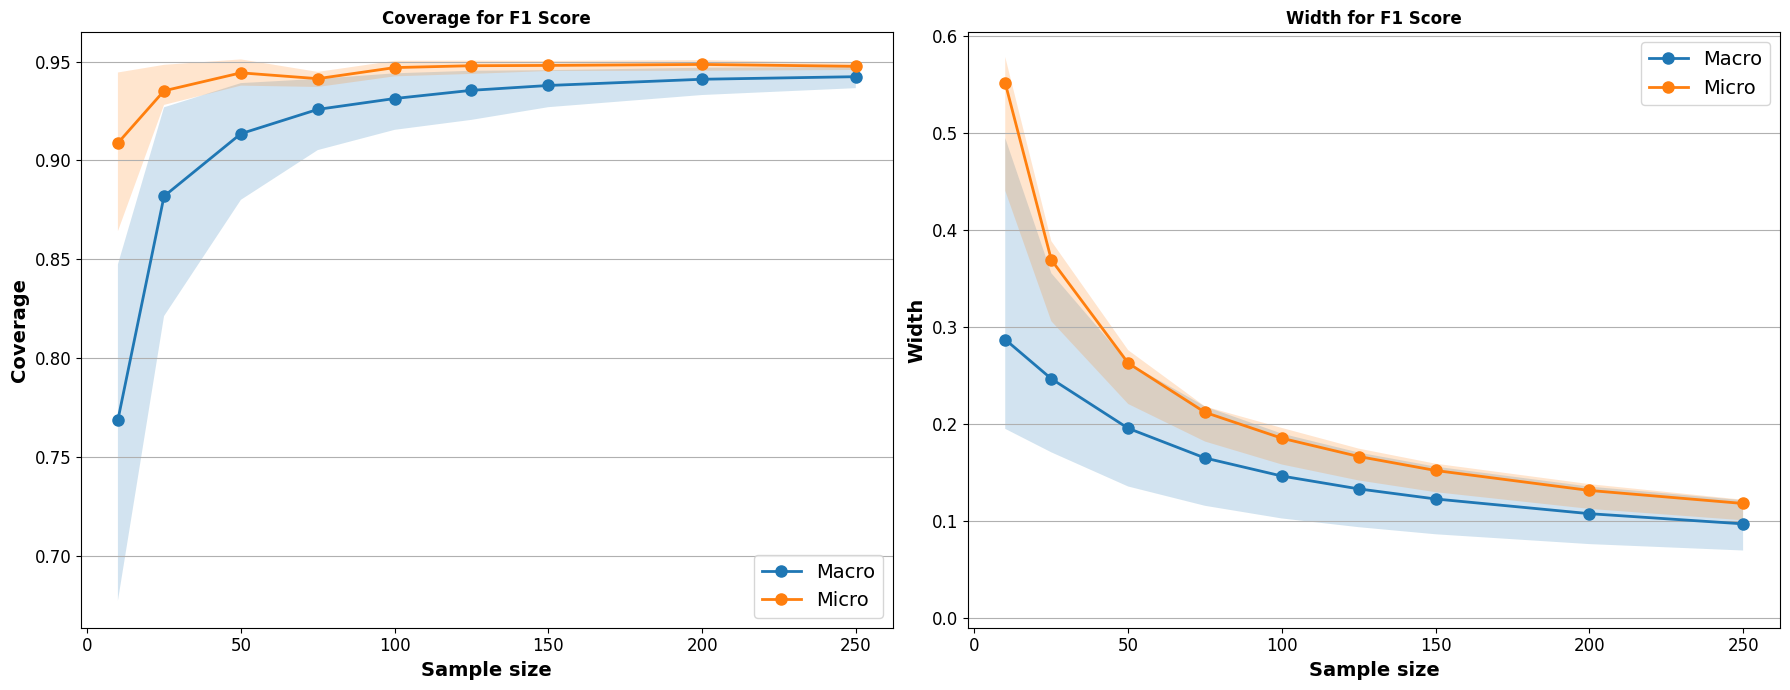

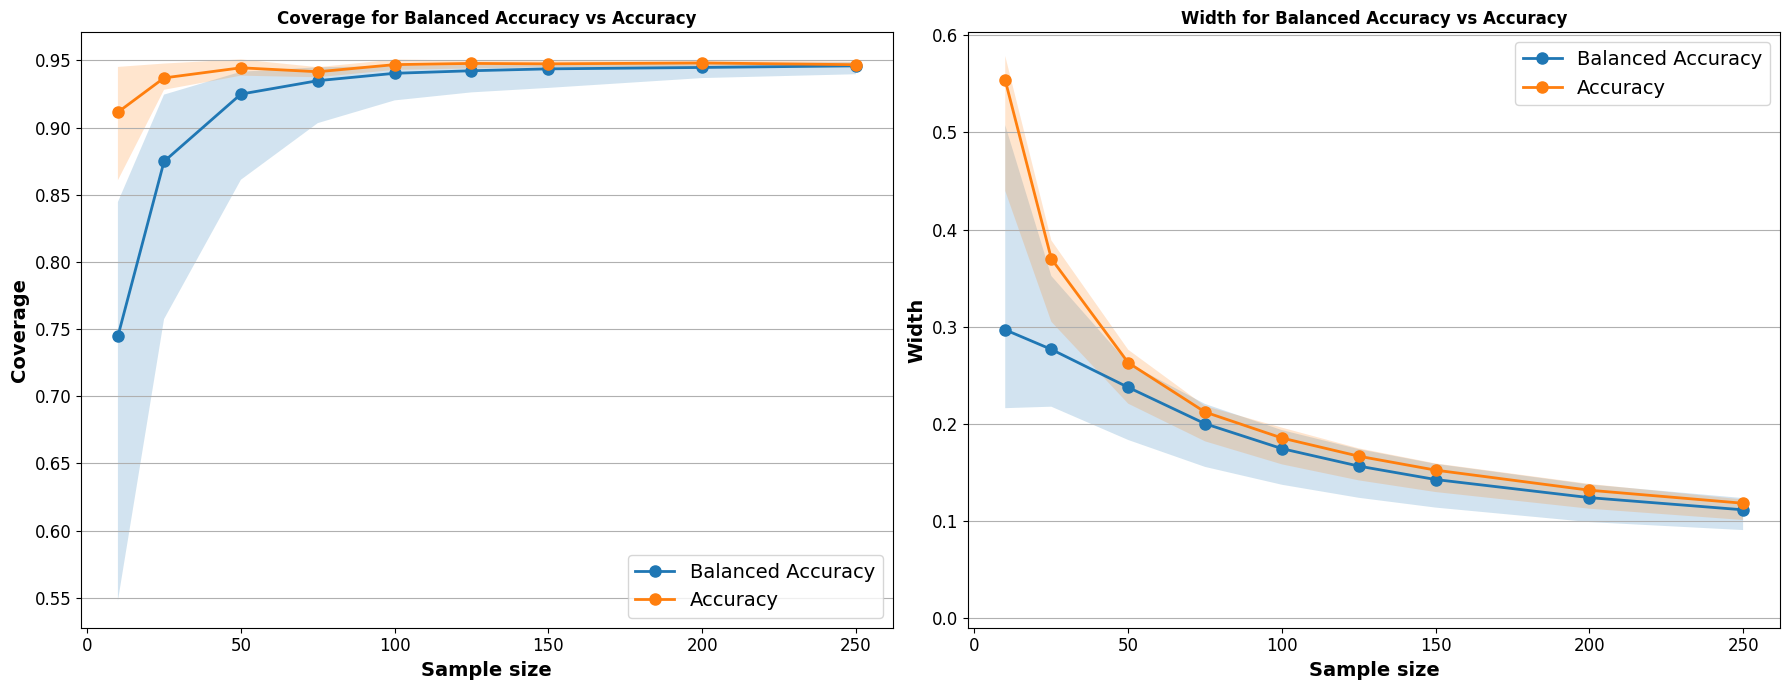

In [18]:
means_macro_df_n=df_macro[(df_macro['method']=='percentile') & (df_macro['n']<=250)].sort_values(by=['stat', 'n'])
means_micro_df_n=df_micro[(df_micro['method']=='percentile') & (df_micro['n']<=250)].sort_values(by=['stat', 'n'])

means_macro_df_n_width =df_macro_width[(df_macro_width['method']=='percentile') & (df_macro_width['n']<=250)].sort_values(by=['stat', 'n'])
means_micro_df_n_width =df_micro_width[(df_micro_width['method']=='percentile') & (df_micro_width['n']<=250)].sort_values(by=['stat', 'n'])

metrics_classif=np.append(means_macro_df_n['stat'].unique(), 'accuracy')
palette_classif = sns.color_palette("colorblind", len(metrics_classif))
color_dict_classif = dict(zip(metrics_classif, palette))

color_dict_classif.update({'balanced_accuracy':color_dict_classif['accuracy']})

# For each metric/stat, plot micro vs macro coverage in a separate figure

for metric in metrics_classif:
    if metric in ['accuracy', 'balanced_accuracy']:
        continue
    fig, (ax_cov, ax_width) = plt.subplots(1, 2, figsize=(18, 7), sharex=True)

    # Coverage subplot (left)
    # Macro
    macro_data = means_macro_df_n[means_macro_df_n['stat'] == metric]
    if not macro_data.empty:
        medians = macro_data.groupby('n')['value'].median().values
        q1 = macro_data.groupby('n')['value'].quantile(0.25).values
        q3 = macro_data.groupby('n')['value'].quantile(0.75).values
        n_vals = macro_data['n'].unique()
        ax_cov.plot(n_vals, medians, marker='o', label='Macro', linewidth=2, markersize=8)
        ax_cov.fill_between(n_vals, q1, q3, alpha=0.2)
    # Micro
    micro_data = means_micro_df_n[means_micro_df_n['stat'] == metric]
    if not micro_data.empty:
        medians = micro_data.groupby('n')['value'].median().values
        q1 = micro_data.groupby('n')['value'].quantile(0.25).values
        q3 = micro_data.groupby('n')['value'].quantile(0.75).values
        n_vals = micro_data['n'].unique()
        ax_cov.plot(n_vals, medians, marker='o', label='Micro', linewidth=2, markersize=8)
        ax_cov.fill_between(n_vals, q1, q3, alpha=0.2)
    ax_cov.set_title(f'Coverage for {metric_labels[metric]}', weight='bold')
    ax_cov.set_xlabel('Sample size', weight='bold', fontsize=14)
    ax_cov.set_ylabel('Coverage', weight='bold', fontsize=14)
    ax_cov.tick_params(axis='y', labelsize=12)
    ax_cov.tick_params(axis='x', labelsize=12)
    ax_cov.grid(True, axis='y')
    ax_cov.legend(fontsize=14)

    # Width subplot (right)
    # Macro
    macro_width = means_macro_df_n_width[means_macro_df_n_width['stat'] == metric]
    if not macro_width.empty:
        medians = macro_width.groupby('n')['width'].median().values
        q1 = macro_width.groupby('n')['width'].quantile(0.25).values
        q3 = macro_width.groupby('n')['width'].quantile(0.75).values
        n_vals = macro_width['n'].unique()
        ax_width.plot(n_vals, medians, marker='o', label='Macro', linewidth=2, markersize=8)
        ax_width.fill_between(n_vals, q1, q3, alpha=0.2)
    # Micro
    micro_width = means_micro_df_n_width[means_micro_df_n_width['stat'] == metric]
    if not micro_width.empty:
        medians = micro_width.groupby('n')['width'].median().values
        q1 = micro_width.groupby('n')['width'].quantile(0.25).values
        q3 = micro_width.groupby('n')['width'].quantile(0.75).values
        n_vals = micro_width['n'].unique()
        ax_width.plot(n_vals, medians, marker='o', label='Micro', linewidth=2, markersize=8)
        ax_width.fill_between(n_vals, q1, q3, alpha=0.2)
    ax_width.set_title(f'Width for {metric_labels[metric]}', weight='bold')
    ax_width.set_xlabel('Sample size', weight='bold', fontsize=14)
    ax_width.set_ylabel('Width', weight='bold', fontsize=14)
    ax_width.tick_params(axis='y', labelsize=12)
    ax_width.tick_params(axis='x', labelsize=12)
    ax_width.set_ylim(-0.01, None)
    ax_width.grid(True, axis='y')
    ax_width.legend(fontsize=14)

    plt.tight_layout()
    #plt.savefig(f'../../../clean_figs/fig_4_{metric}.pdf')
    plt.show()

fig, (ax_cov, ax_width) = plt.subplots(1, 2, figsize=(18, 7), sharex=True)

# Coverage subplot (left)
# Macro
macro_data = means_macro_df_n[means_macro_df_n['stat'] == "balanced_accuracy"]
if not macro_data.empty:
    medians = macro_data.groupby('n')['value'].median().values
    q1 = macro_data.groupby('n')['value'].quantile(0.25).values
    q3 = macro_data.groupby('n')['value'].quantile(0.75).values
    n_vals = macro_data['n'].unique()
    ax_cov.plot(n_vals, medians, marker='o', label='Balanced Accuracy', linewidth=2, markersize=8)
    ax_cov.fill_between(n_vals, q1, q3, alpha=0.2)
# Micro
micro_data = means_micro_df_n[means_micro_df_n['stat'] == "accuracy"]
if not micro_data.empty:
    medians = micro_data.groupby('n')['value'].median().values
    q1 = micro_data.groupby('n')['value'].quantile(0.25).values
    q3 = micro_data.groupby('n')['value'].quantile(0.75).values
    n_vals = micro_data['n'].unique()
    ax_cov.plot(n_vals, medians, marker='o', label='Accuracy', linewidth=2, markersize=8)
    ax_cov.fill_between(n_vals, q1, q3, alpha=0.2)
ax_cov.set_title(f'Coverage for {metric_labels["balanced_accuracy"]} vs Accuracy', weight='bold')
ax_cov.set_xlabel('Sample size', weight='bold', fontsize=14)
ax_cov.set_ylabel('Coverage', weight='bold', fontsize=14)
ax_cov.tick_params(axis='y', labelsize=12)
ax_cov.tick_params(axis='x', labelsize=12)
ax_cov.grid(True, axis='y')
ax_cov.legend(fontsize=14)

# Width subplot (right)
# Macro
macro_width = means_macro_df_n_width[means_macro_df_n_width['stat'] == "balanced_accuracy"]
if not macro_width.empty:
    medians = macro_width.groupby('n')['width'].median().values
    q1 = macro_width.groupby('n')['width'].quantile(0.25).values
    q3 = macro_width.groupby('n')['width'].quantile(0.75).values
    n_vals = macro_width['n'].unique()
    ax_width.plot(n_vals, medians, marker='o', label='Balanced Accuracy', linewidth=2, markersize=8)
    ax_width.fill_between(n_vals, q1, q3, alpha=0.2)
# Micro
micro_width = means_micro_df_n_width[means_micro_df_n_width['stat'] == "accuracy"]
if not micro_width.empty:
    medians = micro_width.groupby('n')['width'].median().values
    q1 = micro_width.groupby('n')['width'].quantile(0.25).values
    q3 = micro_width.groupby('n')['width'].quantile(0.75).values
    n_vals = micro_width['n'].unique()
    ax_width.plot(n_vals, medians, marker='o', label='Accuracy', linewidth=2, markersize=8)
    ax_width.fill_between(n_vals, q1, q3, alpha=0.2)
ax_width.set_title(f'Width for {metric_labels["balanced_accuracy"]} vs Accuracy', weight='bold')
ax_width.set_xlabel('Sample size', weight='bold', fontsize=14)
ax_width.set_ylabel('Width', weight='bold', fontsize=14)
ax_width.tick_params(axis='y', labelsize=12)
ax_width.tick_params(axis='x', labelsize=12)
ax_width.set_ylim(-0.01, None)
ax_width.grid(True, axis='y')
ax_width.legend(fontsize=14)

plt.tight_layout()
#plt.savefig(f'../../../clean_figs/fig_4_acc_ba.pdf')
plt.show()


# Figure 5

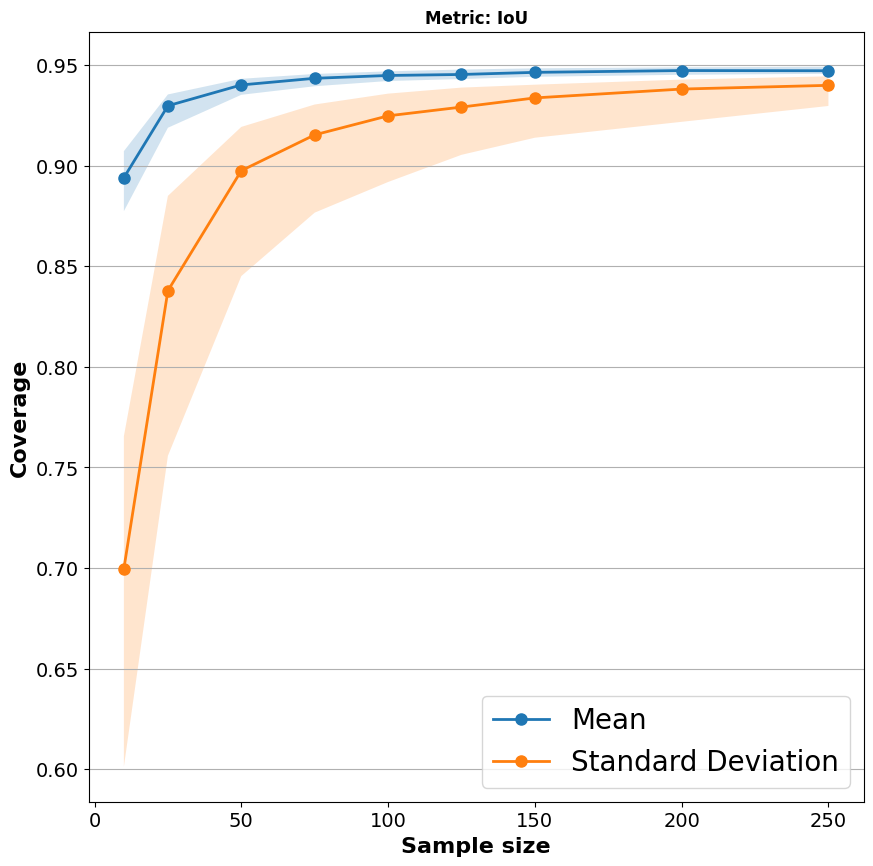

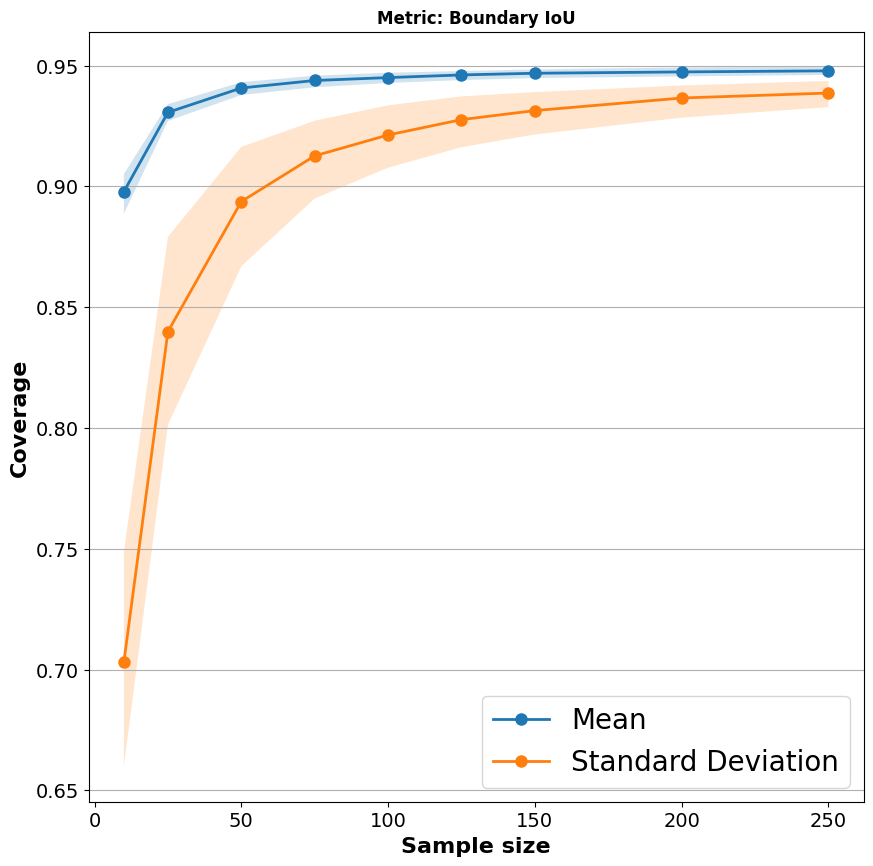

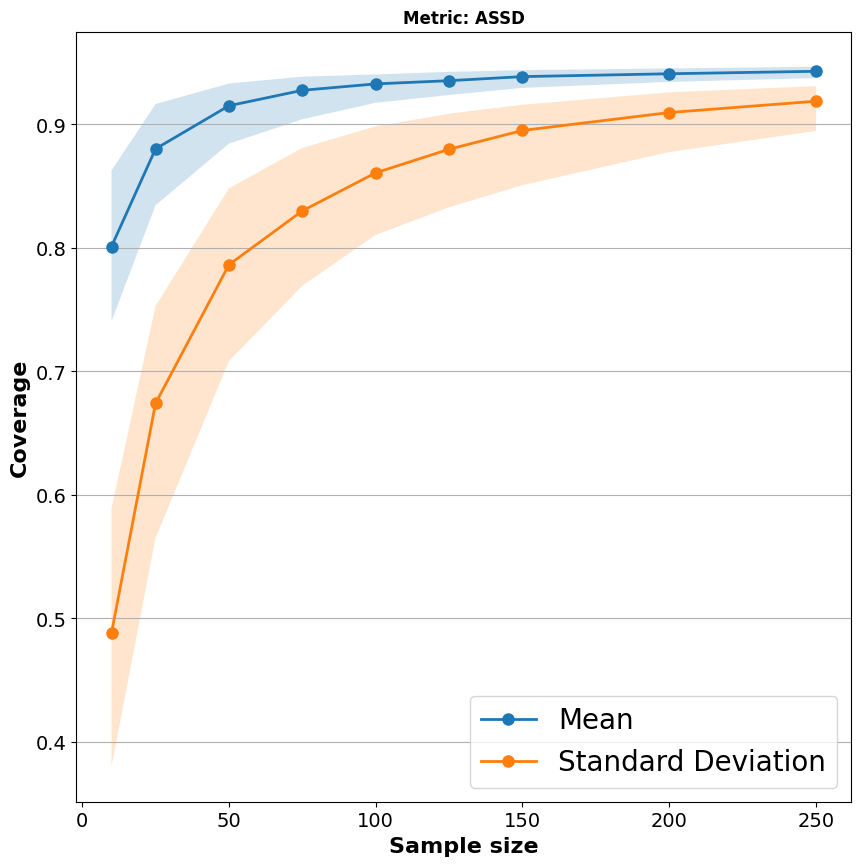

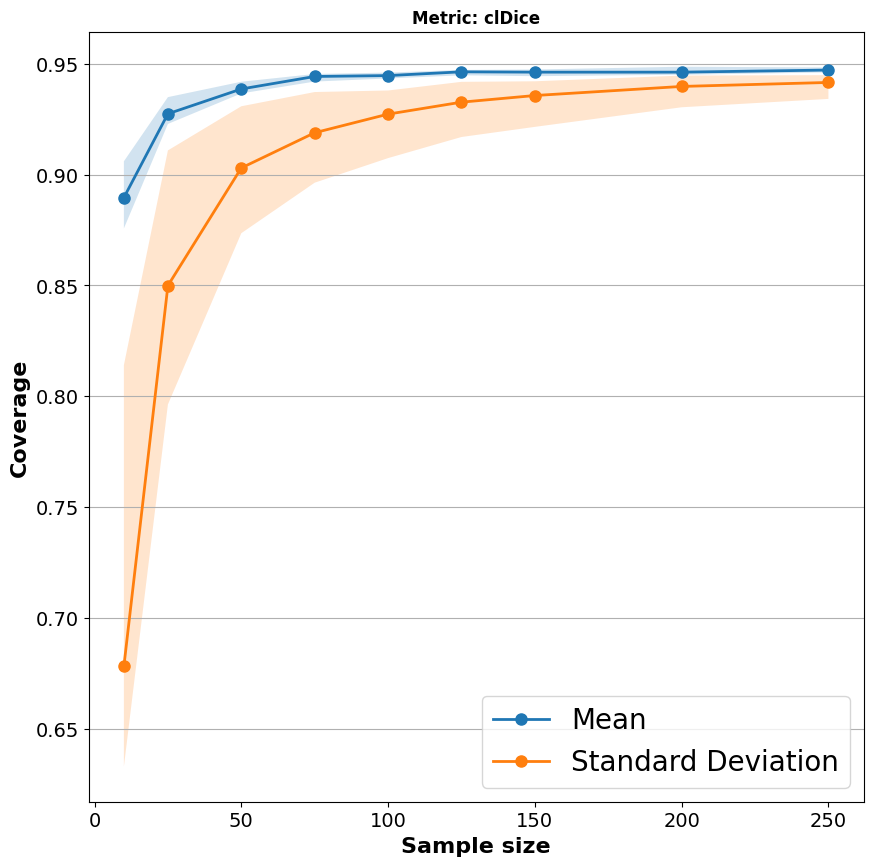

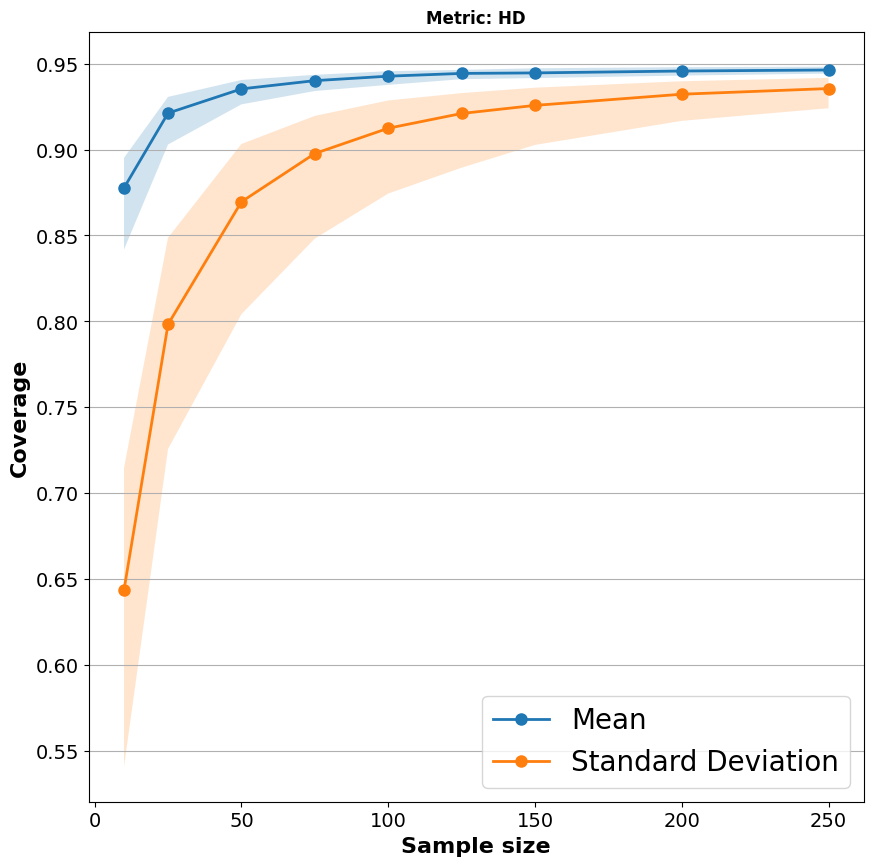

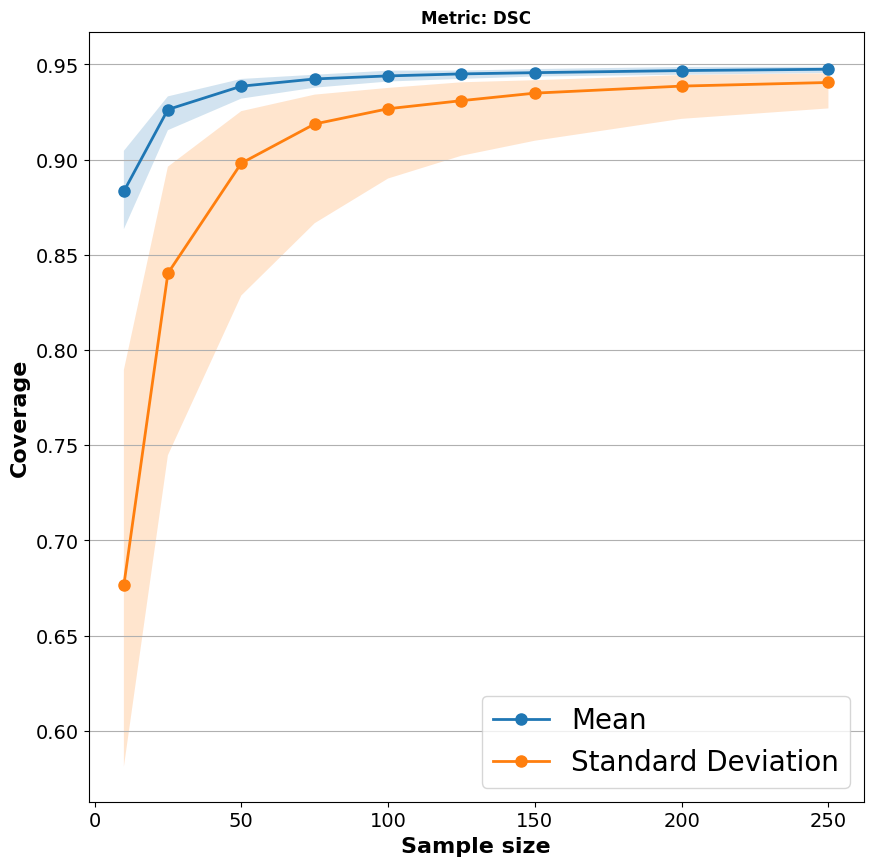

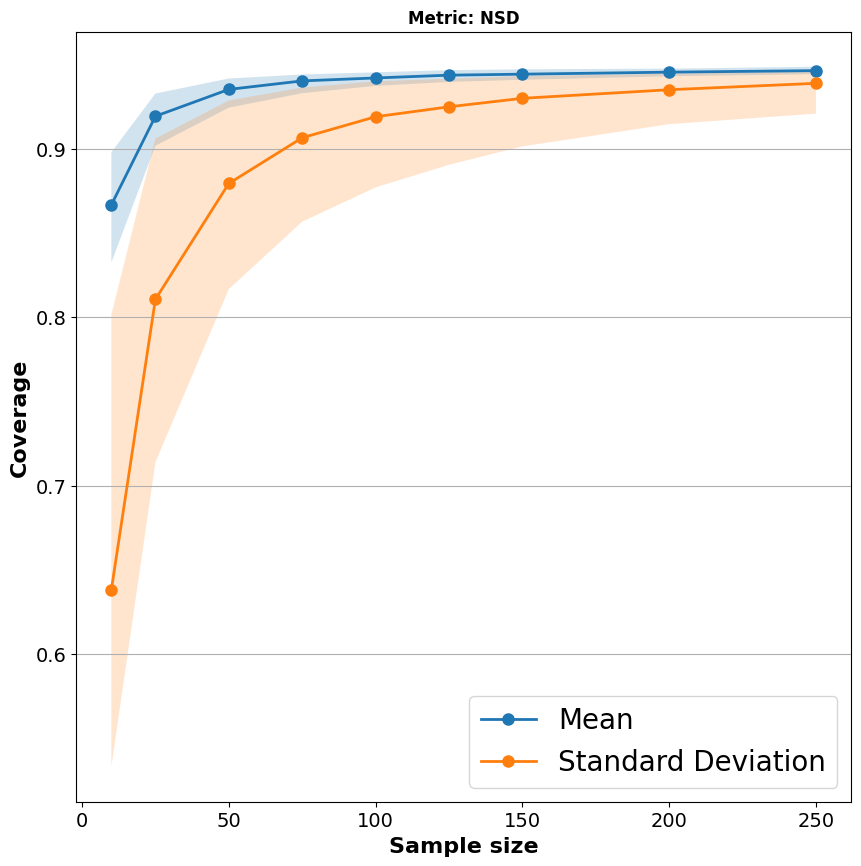

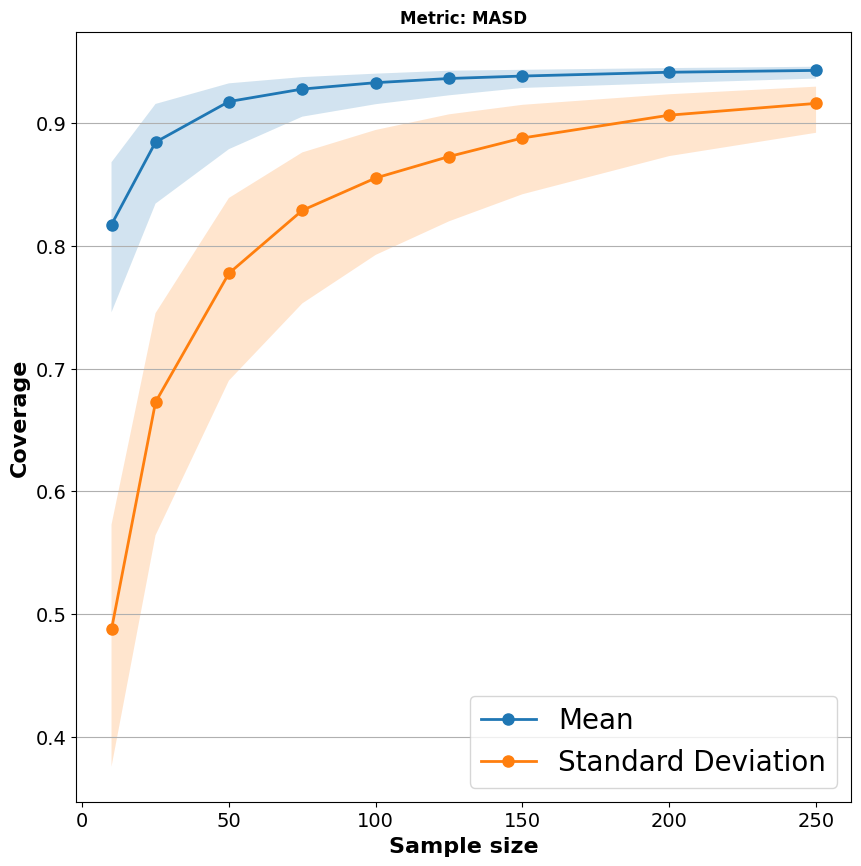

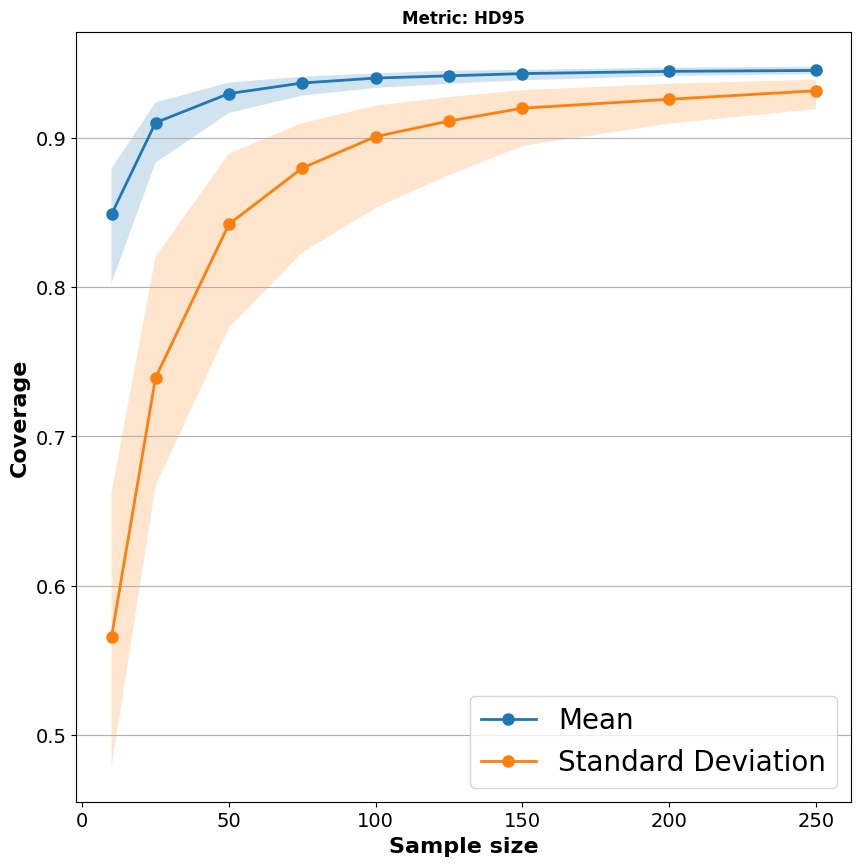

In [ ]:
metrics = df_segm['metric'].unique()
CI_segm_stat=df_segm[df_segm['stat'].isin(['mean', 'std'])]

for metric in metrics:
    df_all_metric=CI_segm_stat[CI_segm_stat['metric']==metric]
    data_method=df_all_metric[df_all_metric['method']=='percentile']
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)


# central plot
    for stat, df_stat in data_method.groupby('stat'):
        medians = df_stat.groupby('n')['coverage'].median().values
        q1 = df_stat.groupby('n')['coverage'].quantile(0.25).values
        q3 = df_stat.groupby('n')['coverage'].quantile(0.75).values
        ax.plot(df_stat['n'].unique(), medians, marker='o', label=stat_labels[stat], linewidth=2, markersize=8)
        ax.fill_between(df_stat['n'].unique(), q1, q3, alpha=0.2)

    ax.set_title(f'Metric: {metric_labels[metric]}', weight='bold')
    ax.set_xlabel('Sample size',weight='bold', fontsize=16)
    ax.set_ylabel('Coverage', weight='bold', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=14)

    ax.grid(True, axis='y')

    ax.legend(prop={'weight':'bold'}, fontsize= 20)
    plt.legend(fontsize= 20)

    #plt.savefig(f"../../../clean_figs/fig_5_{metric}.pdf") # leave room for suptitle
    plt.show()


# Figure 6

In [ ]:
df_mcc = pd.read_csv(f"../../../results_metrics_classif/aggregated_results_mcc.csv").drop(columns=['Unnamed: 0'])

stupid_classif_df = df_mcc[df_mcc["true_value"]==0][["subtask", "alg_name"]].drop_duplicates()

['param_z', 'basic', 'studentized', 'param_t', 'bca', 'percentile']
['basic', 'bca', 'percentile', 'param_t', 'param_z']
basic
bca
percentile
param_t
param_z
basic
bca
percentile
param_t
param_z
basic
bca
percentile
param_t
param_z
basic
bca
percentile
param_t
param_z
basic
bca
percentile
param_t
param_z


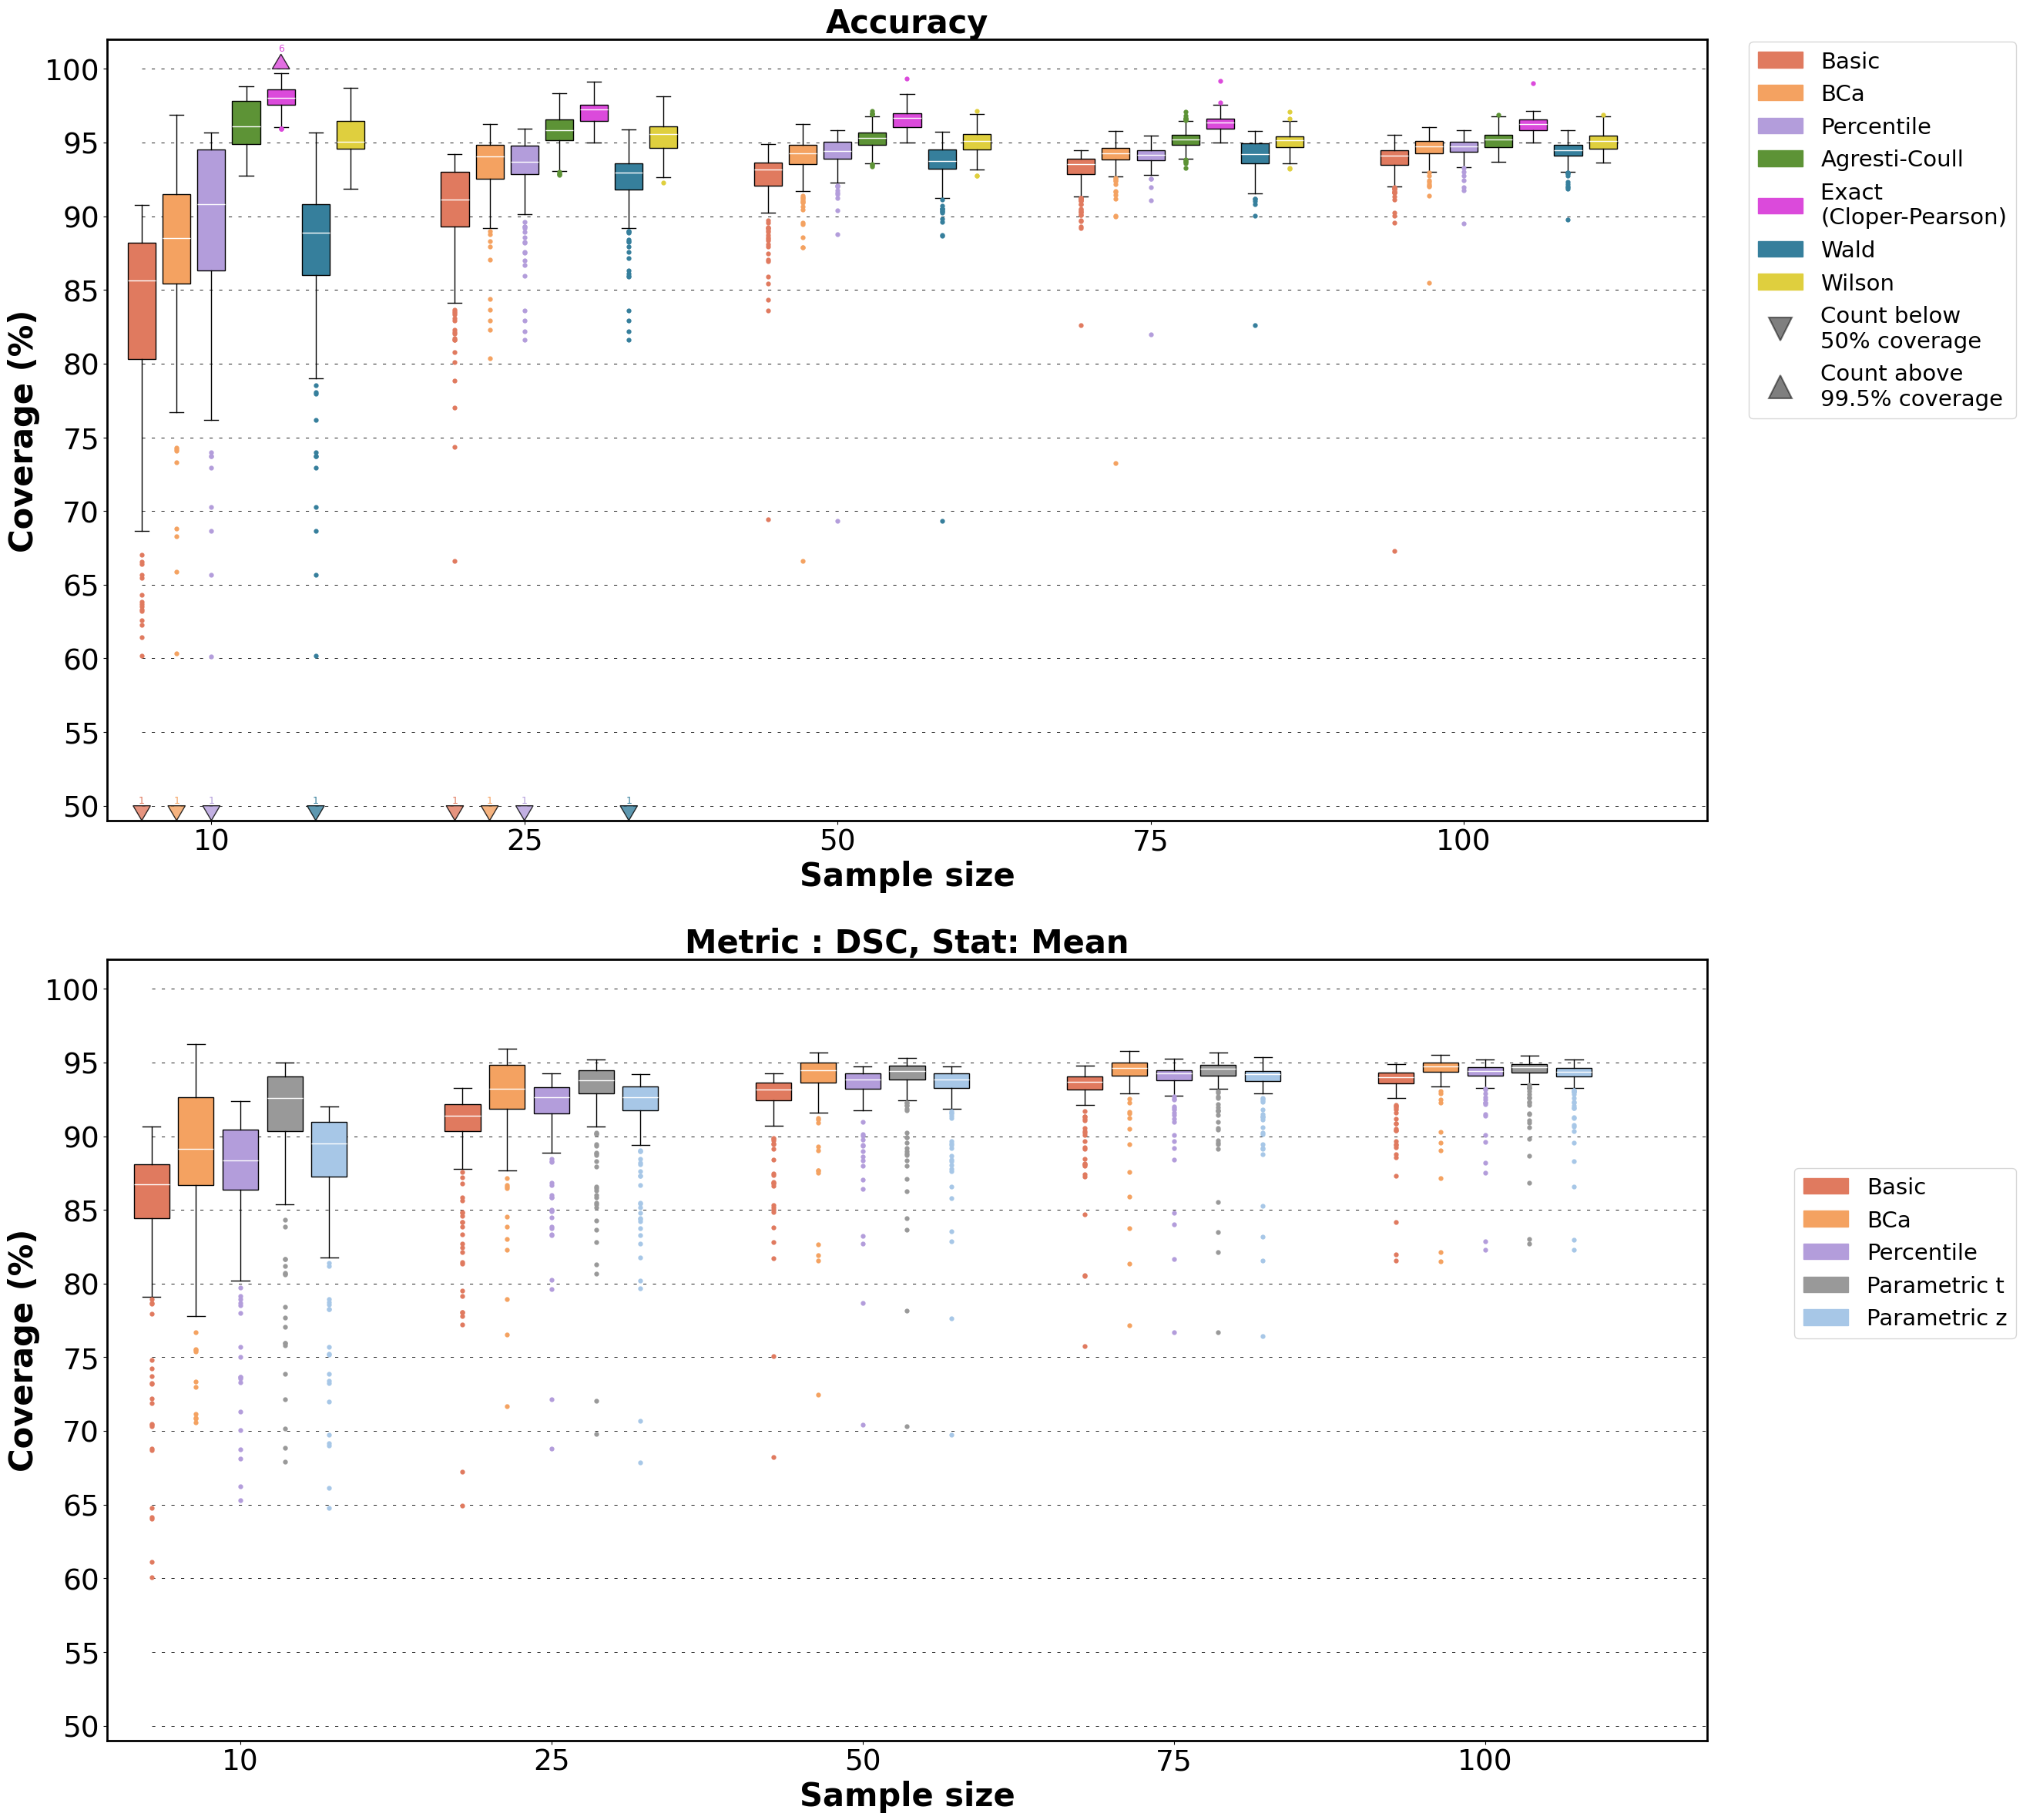

In [ ]:
metrics = ["accuracy"]

size_factor = 3

# Set Nature-style: clean, minimal, sans-serif, no grid, no top/right spines
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.size": 10*size_factor,
    "axes.titlesize": 10*size_factor,
    "axes.labelsize": 10*size_factor,
    "xtick.labelsize": 9*size_factor,
    "ytick.labelsize": 9*size_factor,
    "legend.fontsize": 7*size_factor,
    "axes.edgecolor": "black",
    "axes.linewidth": 2,
    "axes.spines.top": True,
    "axes.spines.right": True,
    "axes.grid": False,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white",
    "axes.facecolor": "white"
})

fig, axs = plt.subplots(2, 1, figsize=(9*size_factor, 9*size_factor))

preferred_order = ["basic", "bca", "percentile"]
metric = "accuracy"
ax = axs[0]
df_all = pd.read_csv(f"../../../results_metrics_classif/aggregated_results_{metric}.csv").drop(columns=['Unnamed: 0'])

# Remove matching rows
df_filtered = df_all.merge(stupid_classif_df, on=['subtask', 'alg_name'], how='left', indicator=True)
df_all = df_filtered[df_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])
methods = [c[6:] for c in df_all.columns if "width" in c]
preferred = [m for m in preferred_order if m in methods]
others = sorted([m for m in methods if m not in preferred_order])

methods = preferred+others

ax.hlines(np.arange(0, 1.01, 0.05), 0, (len(methods)+2)*len(df_all["n"].unique()-2), colors="black", linewidths=0.2*size_factor, linestyles=(0, (5,10)))

arrow_legend_down = False
arrow_legend_up = False
n_values = [n for n in np.sort(df_all["n"].unique()) if n<=100]
for i, n in enumerate(n_values):
    for j, method in enumerate(methods):
        coverages = df_all[df_all["n"]==n][f"contains_true_stat_{method}"]
        pos = (len(methods)+2)*i+j
        ax.boxplot(coverages, positions=[pos], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor=method_colors[method]),
                    flierprops=dict(marker='o', markersize=1*size_factor, markerfacecolor=method_colors[method],
                                        markeredgewidth=0.5*size_factor, markeredgecolor="black"),
                    medianprops=dict(color="white"), sym=method_colors[method])

        count_below = (coverages < 0.5).sum()
        if count_below > 0:
            arrow_legend_down = True
            triangle = mpatches.Polygon(
                [[pos, 0.49], [pos - 0.25, 0.5], [pos + 0.25, 0.5]],
                closed=True,
                facecolor=method_colors[method],
                edgecolor='black',
                alpha=0.8,
                zorder=10
            )
            ax.add_patch(triangle)
            ax.text(pos, 0.502, f'{count_below}',
                    ha='center', fontsize=3*size_factor, color=method_colors[method], 
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.'))

        count_above = (coverages > 0.995).sum()
        if count_above > 0:
            arrow_legend_up = True
            triangle = mpatches.Polygon(
                [[pos, 1.01], [pos - 0.25, 1], [pos + 0.25, 1]],
                closed=True,
                facecolor=method_colors[method],
                edgecolor='black',
                alpha=0.8,
                zorder=10
            )
            ax.add_patch(triangle)
            ax.text(pos, 1.012, f'{count_above}',
                    ha='center', fontsize=3*size_factor, color=method_colors[method],
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.'))

legend_handles_ax1 = [
    mpatches.Patch(color=method_colors[method], label=method_labels[method]) for method in methods
]
if arrow_legend_down:
    arrow_handle = Line2D([0], [0], color='black', marker='v', linestyle='None', alpha=0.5, markersize=7*size_factor,
                            markeredgecolor="black", markeredgewidth=0.5*size_factor, label='Count below \n50% coverage')
    legend_handles_ax1.append(arrow_handle)
if arrow_legend_up:
    circle_handle = Line2D([0], [0], color='black', marker='^', linestyle='None', alpha=0.5, markersize=7*size_factor,
                            markeredgecolor="black", markeredgewidth=0.5*size_factor, label='Count above \n99.5% coverage')
    legend_handles_ax1.append(circle_handle)

ax.set_ylabel("Coverage (%)", weight="bold")
ax.set_xlabel("Sample size", weight="bold")
ax.set_ylim(0.49, 1.02)
ax.set_title(f"{metric_labels[metric]}".replace("_", " "), weight="bold")
ax.set_xticks([(len(methods)+2)*i+2 for i in range(len(n_values))])
ax.set_xticklabels([f"{int(n)}" for n in np.sort(n_values)])
ax.set_yticks(np.arange(0.5, 1.01, 0.05))
ax.set_yticklabels((np.arange(0.5, 1.01, 0.05)*100).astype(int))
ax.legend(handles=legend_handles_ax1, loc="lower right", bbox_to_anchor=(1.2, 0.5))
ax.set_xlim(-1, (len(methods)+2)*len(n_values))

####### Second plot : mean of DSC ######

metric = "dsc"
ax = axs[1]
df_all = pd.read_csv(f"../../../results_metrics_segm/aggregated_results_{metric}_mean.csv")

methods = [c[6:] for c in df_all.columns if "width" in c]
preferred = [m for m in preferred_order if m in methods]
others = sorted([m for m in methods if m not in preferred_order])
print(methods)

methods = preferred+others
methods.remove('studentized')
print(methods)
ax.hlines(np.arange(0, 1.01, 0.05), 0, (len(methods)+2)*len(df_all["n"].unique()-2), colors="black", linewidths=0.2*size_factor, linestyles=(0, (5,10)))

arrow_legend_down = False
arrow_legend_up = False
n_values = [n for n in np.sort(df_all["n"].unique()) if n<=100]
for i, n in enumerate(n_values):
    for j, method in enumerate(methods):
        print(method)
        coverages = df_all[df_all["n"]==n][f"contains_true_stat_{method}"]
        pos = (len(methods)+2)*i+j
        ax.boxplot(coverages, positions=[pos], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor=method_colors[method]),
                    flierprops=dict(marker='o', markersize=1*size_factor, markerfacecolor=method_colors[method],
                                        markeredgewidth=0.5*size_factor, markeredgecolor="black"),
                    medianprops=dict(color="white"), sym=method_colors[method])

        count_below = (coverages < 0.5).sum()
        if count_below > 0:
            arrow_legend_down = True
            triangle = mpatches.Polygon(
                [[pos, 0.49], [pos - 0.25, 0.5], [pos + 0.25, 0.5]],
                closed=True,
                facecolor=method_colors[method],
                edgecolor='black',
                alpha=0.8,
                zorder=10
            )
            ax.add_patch(triangle)
            ax.text(pos, 0.502, f'{count_below}',
                    ha='center', fontsize=3*size_factor, color=method_colors[method], 
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.'))

        count_above = (coverages > 0.995).sum()
        if count_above > 0:
            arrow_legend_up = True
            triangle = mpatches.Polygon(
                [[pos, 1.01], [pos - 0.25, 1], [pos + 0.25, 1]],
                closed=True,
                facecolor=method_colors[method],
                edgecolor='black',
                alpha=0.8,
                zorder=10
            )
            ax.add_patch(triangle)
            ax.text(pos, 1.012, f'{count_above}',
                    ha='center', fontsize=3*size_factor, color=method_colors[method],
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.'))

legend_handles_ax1 = [
    mpatches.Patch(color=method_colors[method], label=method_labels[method]) for method in methods
]
if arrow_legend_down:
    arrow_handle = Line2D([0], [0], color='black', marker='v', linestyle='None', alpha=0.5, markersize=7*size_factor,
                            markeredgecolor="black", markeredgewidth=0.5*size_factor, label='Count below \n50% coverage')
    legend_handles_ax1.append(arrow_handle)
if arrow_legend_up:
    circle_handle = Line2D([0], [0], color='black', marker='^', linestyle='None', alpha=0.5, markersize=7*size_factor,
                            markeredgecolor="black", markeredgewidth=0.5*size_factor, label='Count above \n99.5% coverage')
    legend_handles_ax1.append(circle_handle)

ax.set_ylabel("Coverage (%)", weight="bold")
ax.set_xlabel("Sample size", weight="bold")
ax.set_ylim(0.49, 1.02)
ax.set_title(f"Metric : {metric_labels[metric]}, Stat: Mean".replace("_", " "), weight="bold")
ax.set_xticks([(len(methods)+2)*i+2 for i in range(len(n_values))])
ax.set_xticklabels([f"{int(n)}" for n in np.sort(n_values)])
ax.set_yticks(np.arange(0.5, 1.01, 0.05))
ax.set_yticklabels((np.arange(0.5, 1.01, 0.05)*100).astype(int))
ax.legend(handles=legend_handles_ax1, loc="lower right", bbox_to_anchor=(1.2, 0.5))
ax.set_xlim(-1, (len(methods)+2)*len(n_values))

plt.subplots_adjust(bottom=0.15, wspace=0.2, hspace=0.4)
plt.tight_layout(rect=[0, 0.08, 1, 1])
#plt.savefig(f"../../../clean_figs/fig_6.pdf")
plt.show()

In [ ]:
df_segm

metric        stat                   task           algo      n  \
0           iou        mean  Task01_BrainTumour_L1  17111010008.0   10.0   
1           iou        mean  Task01_BrainTumour_L1  17111010008.0   10.0   
2           iou        mean  Task01_BrainTumour_L1  17111010008.0   10.0   
3           iou        mean  Task01_BrainTumour_L1  17111010008.0   10.0   
4           iou        mean  Task01_BrainTumour_L1  17111010008.0   10.0   
...         ...         ...                    ...            ...    ...   
276619  hd_perc  iqr_length        Task10_Colon_L1          whale  200.0   
276620  hd_perc  iqr_length        Task10_Colon_L1          whale  200.0   
276621  hd_perc  iqr_length        Task10_Colon_L1          whale  250.0   
276622  hd_perc  iqr_length        Task10_Colon_L1          whale  250.0   
276623  hd_perc  iqr_length        Task10_Colon_L1          whale  250.0   

            method  coverage           x_group  
0            basic    0.8906       iou\nn=10.0  
1              bca    0.9332       iou\nn=10.0  
2       percentile    0.9118       iou\nn=10.0  
3          param_z    0.9163       iou\nn=10.0  
4          param_t    0.9464       iou\nn=10.0  
...            ...       ...               ...  
276619         bca    0.8739  hd_perc\nn=200.0  
276620  percentile    0.9600  hd_perc\nn=200.0  
276621       basic    0.6944  hd_perc\nn=250.0  
276622         bca    0.7881  hd_perc\nn=250.0  
276623  percentile    0.9623  hd_perc\nn=250.0  

[276624 rows x 8 columns]

# Figure 7

        n               stat  value_median  value_q1  value_q3
0    10.0                 ap       0.82110  0.659300  0.895425
1    10.0                auc       0.80220  0.306500  0.899975
2    10.0  balanced_accuracy       0.74475  0.547775  0.844650
3    10.0           f1_score       0.76875  0.677225  0.847450
4    25.0                 ap       0.82490  0.617275  0.878050
5    25.0                auc       0.92220  0.610075  0.940225
6    25.0  balanced_accuracy       0.87480  0.757400  0.924575
7    25.0           f1_score       0.88190  0.821225  0.926900
8    50.0                 ap       0.84140  0.629625  0.894925
9    50.0                auc       0.94280  0.847450  0.946700
10   50.0  balanced_accuracy       0.92495  0.861175  0.941600
11   50.0           f1_score       0.91355  0.880075  0.939150
12   75.0                 ap       0.86380  0.678200  0.905025
13   75.0                auc       0.94440  0.916025  0.947925
14   75.0  balanced_accuracy       0.93495  0.903350  0

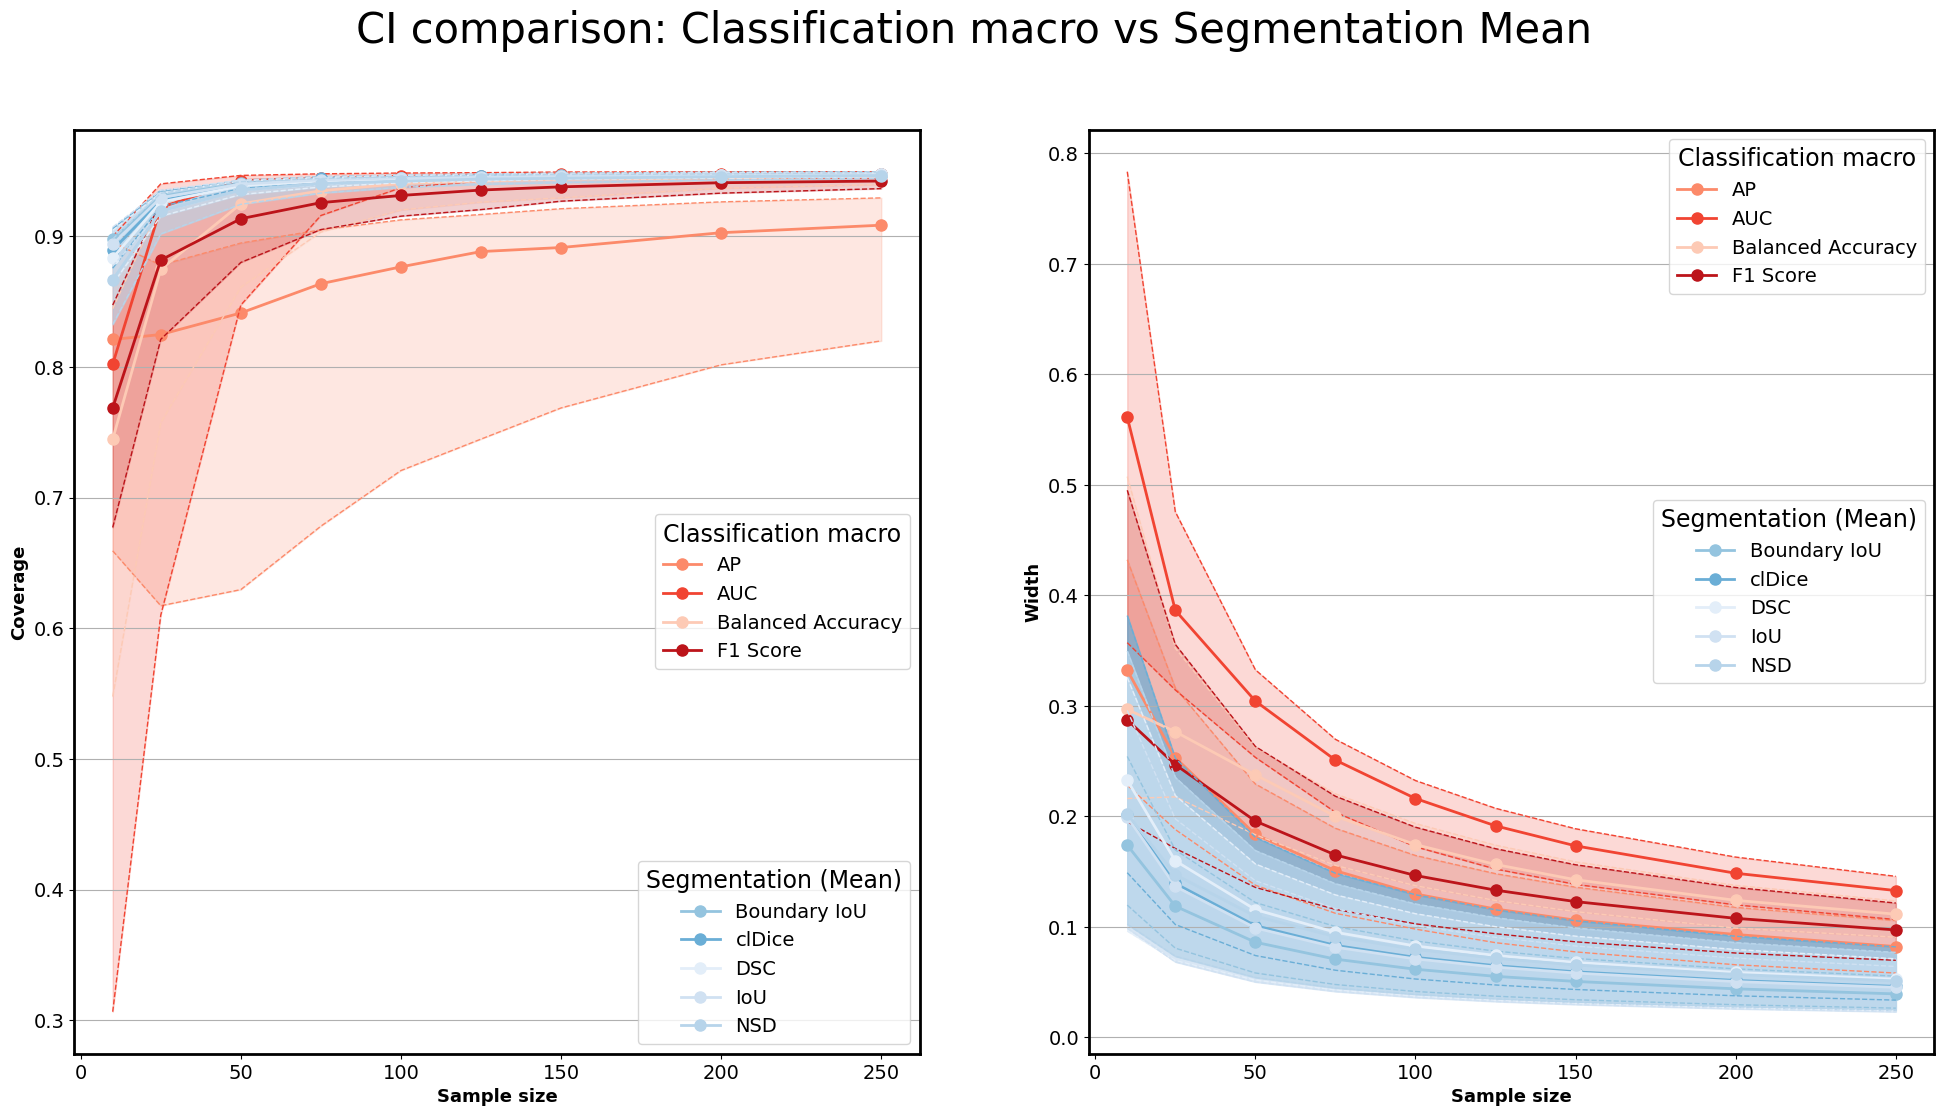

        n               stat  value_median  value_q1  value_q3
0    10.0                 ap       0.82110  0.659300  0.895425
1    10.0                auc       0.80220  0.306500  0.899975
2    10.0  balanced_accuracy       0.74475  0.547775  0.844650
3    10.0           f1_score       0.76875  0.677225  0.847450
4    25.0                 ap       0.82490  0.617275  0.878050
5    25.0                auc       0.92220  0.610075  0.940225
6    25.0  balanced_accuracy       0.87480  0.757400  0.924575
7    25.0           f1_score       0.88190  0.821225  0.926900
8    50.0                 ap       0.84140  0.629625  0.894925
9    50.0                auc       0.94280  0.847450  0.946700
10   50.0  balanced_accuracy       0.92495  0.861175  0.941600
11   50.0           f1_score       0.91355  0.880075  0.939150
12   75.0                 ap       0.86380  0.678200  0.905025
13   75.0                auc       0.94440  0.916025  0.947925
14   75.0  balanced_accuracy       0.93495  0.903350  0

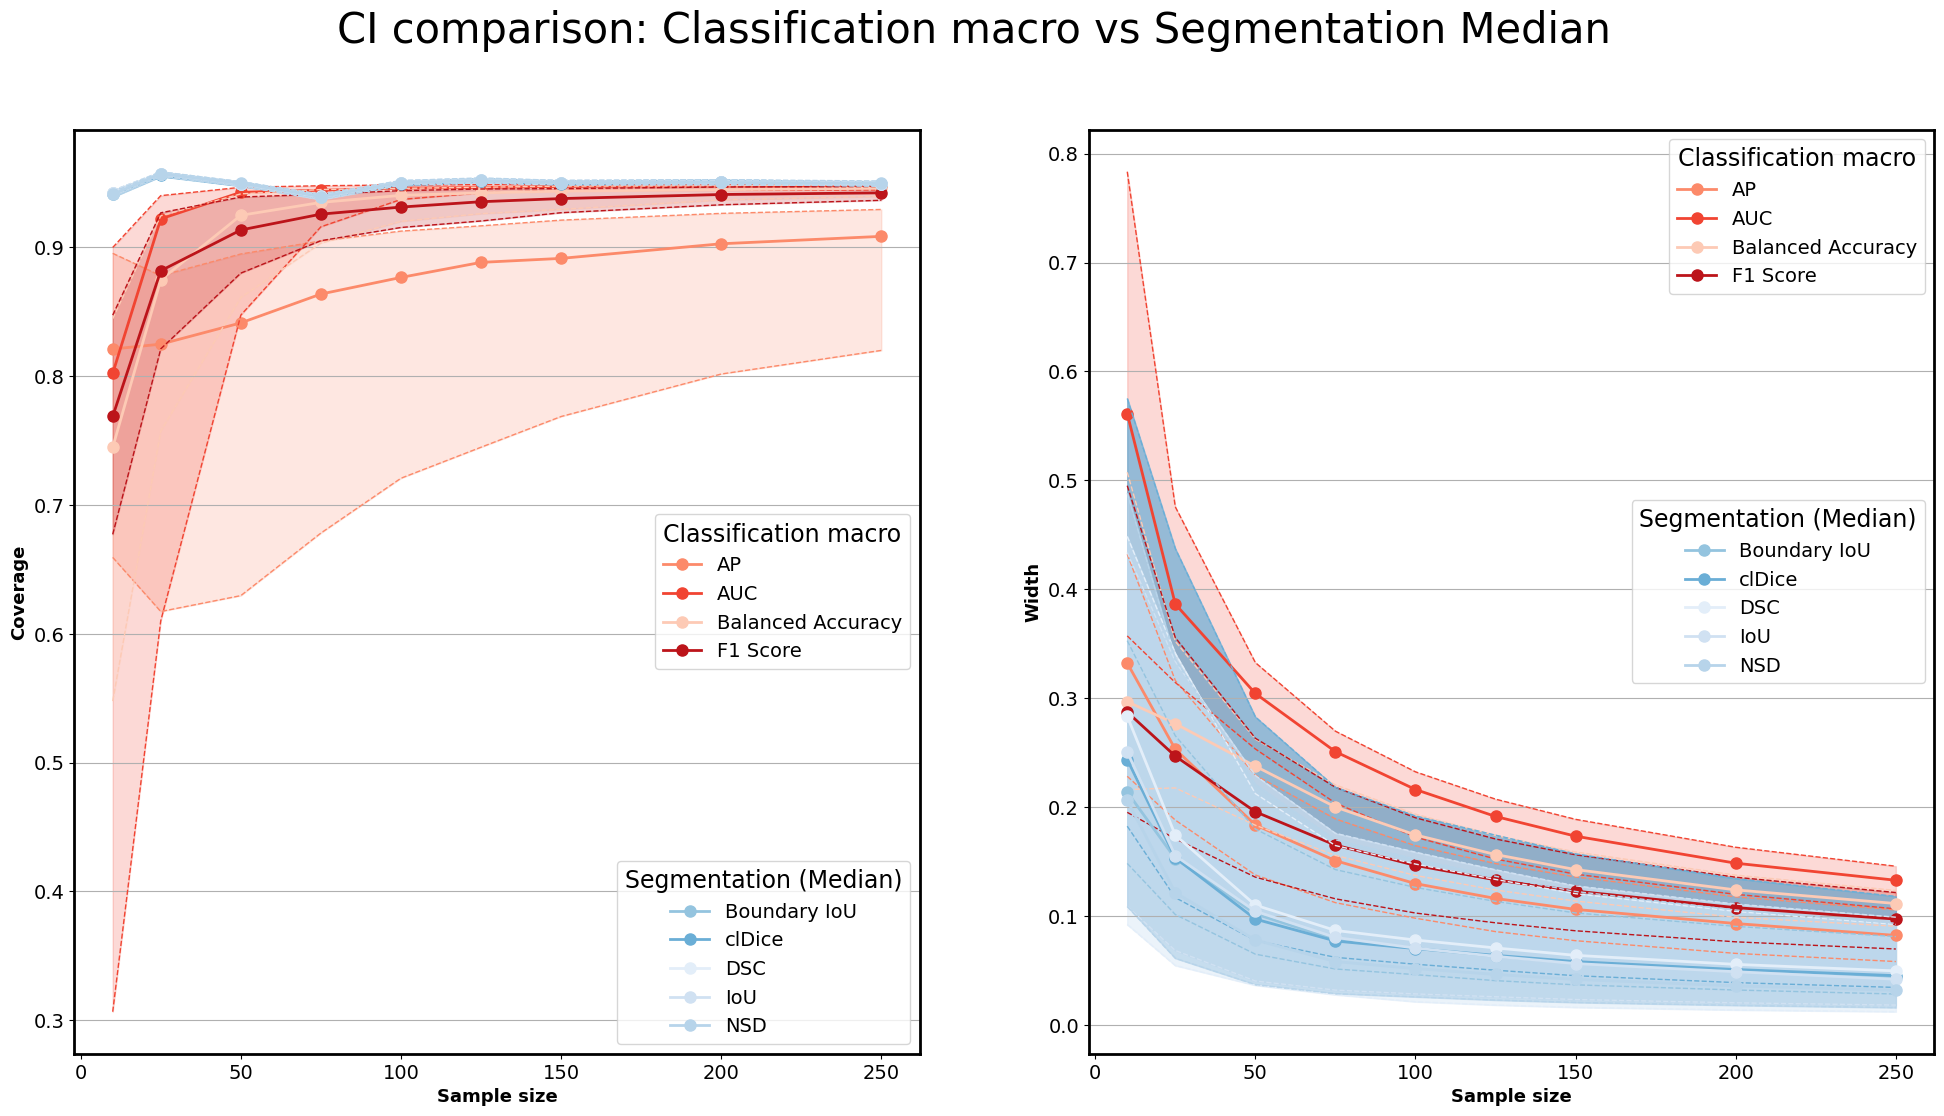

        n               stat  value_median  value_q1  value_q3
0    10.0                 ap       0.82110  0.659300  0.895425
1    10.0                auc       0.80220  0.306500  0.899975
2    10.0  balanced_accuracy       0.74475  0.547775  0.844650
3    10.0           f1_score       0.76875  0.677225  0.847450
4    25.0                 ap       0.82490  0.617275  0.878050
5    25.0                auc       0.92220  0.610075  0.940225
6    25.0  balanced_accuracy       0.87480  0.757400  0.924575
7    25.0           f1_score       0.88190  0.821225  0.926900
8    50.0                 ap       0.84140  0.629625  0.894925
9    50.0                auc       0.94280  0.847450  0.946700
10   50.0  balanced_accuracy       0.92495  0.861175  0.941600
11   50.0           f1_score       0.91355  0.880075  0.939150
12   75.0                 ap       0.86380  0.678200  0.905025
13   75.0                auc       0.94440  0.916025  0.947925
14   75.0  balanced_accuracy       0.93495  0.903350  0

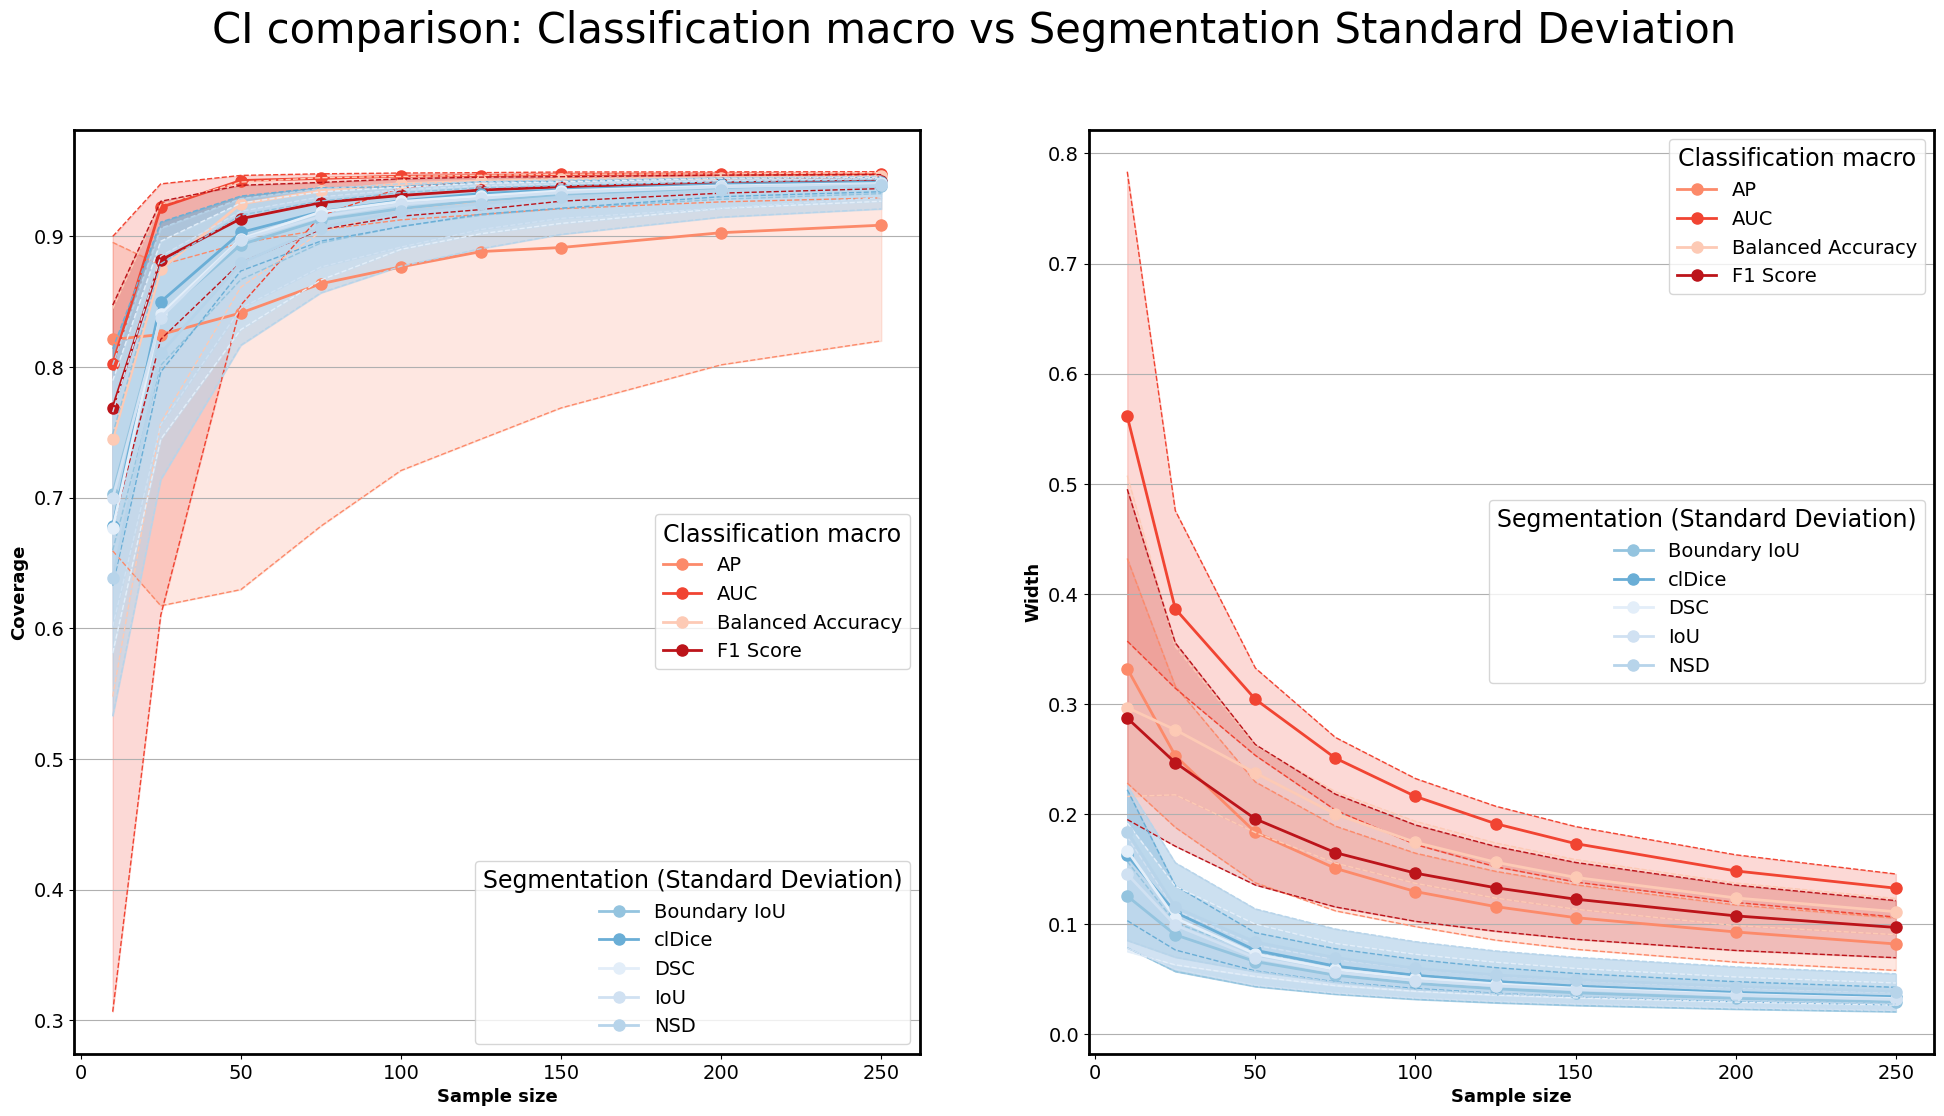

        n               stat  value_median  value_q1  value_q3
0    10.0                 ap       0.82110  0.659300  0.895425
1    10.0                auc       0.80220  0.306500  0.899975
2    10.0  balanced_accuracy       0.74475  0.547775  0.844650
3    10.0           f1_score       0.76875  0.677225  0.847450
4    25.0                 ap       0.82490  0.617275  0.878050
5    25.0                auc       0.92220  0.610075  0.940225
6    25.0  balanced_accuracy       0.87480  0.757400  0.924575
7    25.0           f1_score       0.88190  0.821225  0.926900
8    50.0                 ap       0.84140  0.629625  0.894925
9    50.0                auc       0.94280  0.847450  0.946700
10   50.0  balanced_accuracy       0.92495  0.861175  0.941600
11   50.0           f1_score       0.91355  0.880075  0.939150
12   75.0                 ap       0.86380  0.678200  0.905025
13   75.0                auc       0.94440  0.916025  0.947925
14   75.0  balanced_accuracy       0.93495  0.903350  0

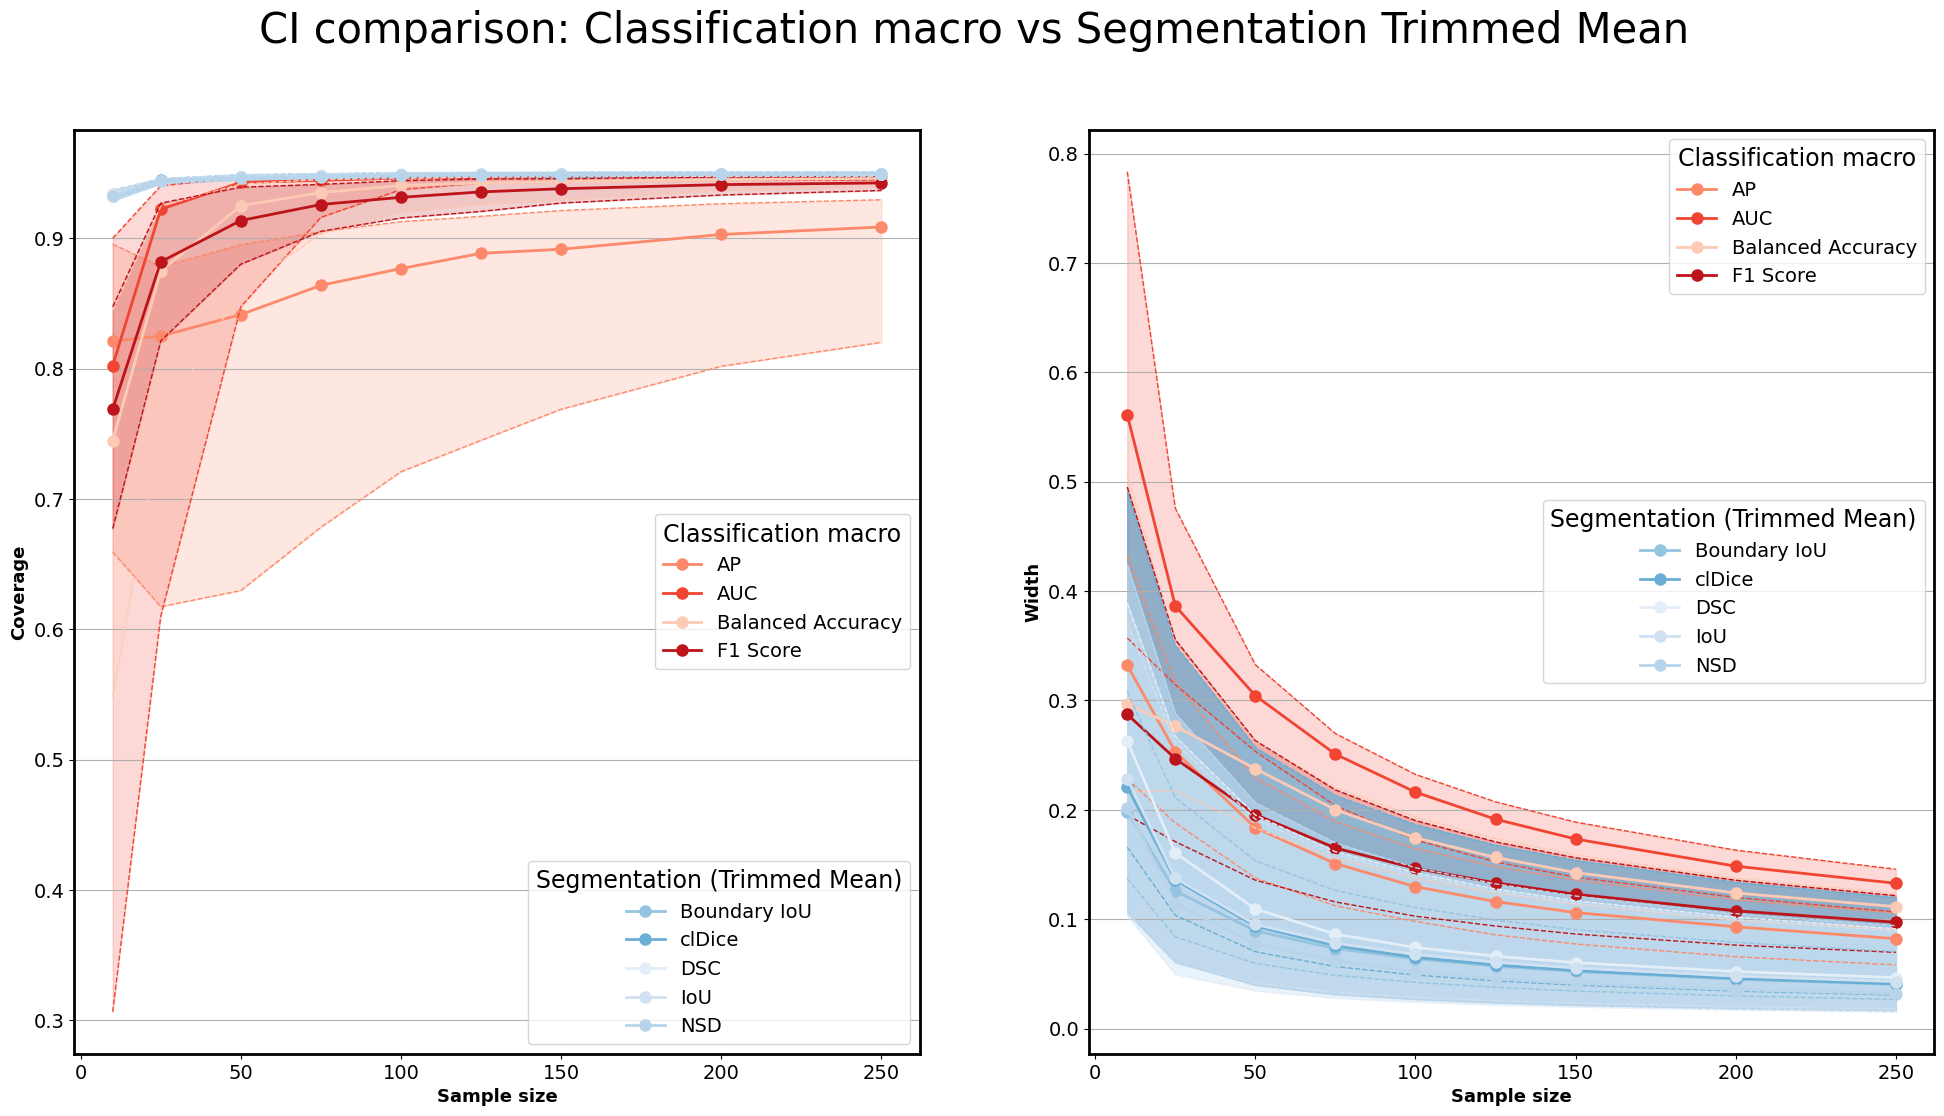

        n               stat  value_median  value_q1  value_q3
0    10.0                 ap       0.82110  0.659300  0.895425
1    10.0                auc       0.80220  0.306500  0.899975
2    10.0  balanced_accuracy       0.74475  0.547775  0.844650
3    10.0           f1_score       0.76875  0.677225  0.847450
4    25.0                 ap       0.82490  0.617275  0.878050
5    25.0                auc       0.92220  0.610075  0.940225
6    25.0  balanced_accuracy       0.87480  0.757400  0.924575
7    25.0           f1_score       0.88190  0.821225  0.926900
8    50.0                 ap       0.84140  0.629625  0.894925
9    50.0                auc       0.94280  0.847450  0.946700
10   50.0  balanced_accuracy       0.92495  0.861175  0.941600
11   50.0           f1_score       0.91355  0.880075  0.939150
12   75.0                 ap       0.86380  0.678200  0.905025
13   75.0                auc       0.94440  0.916025  0.947925
14   75.0  balanced_accuracy       0.93495  0.903350  0

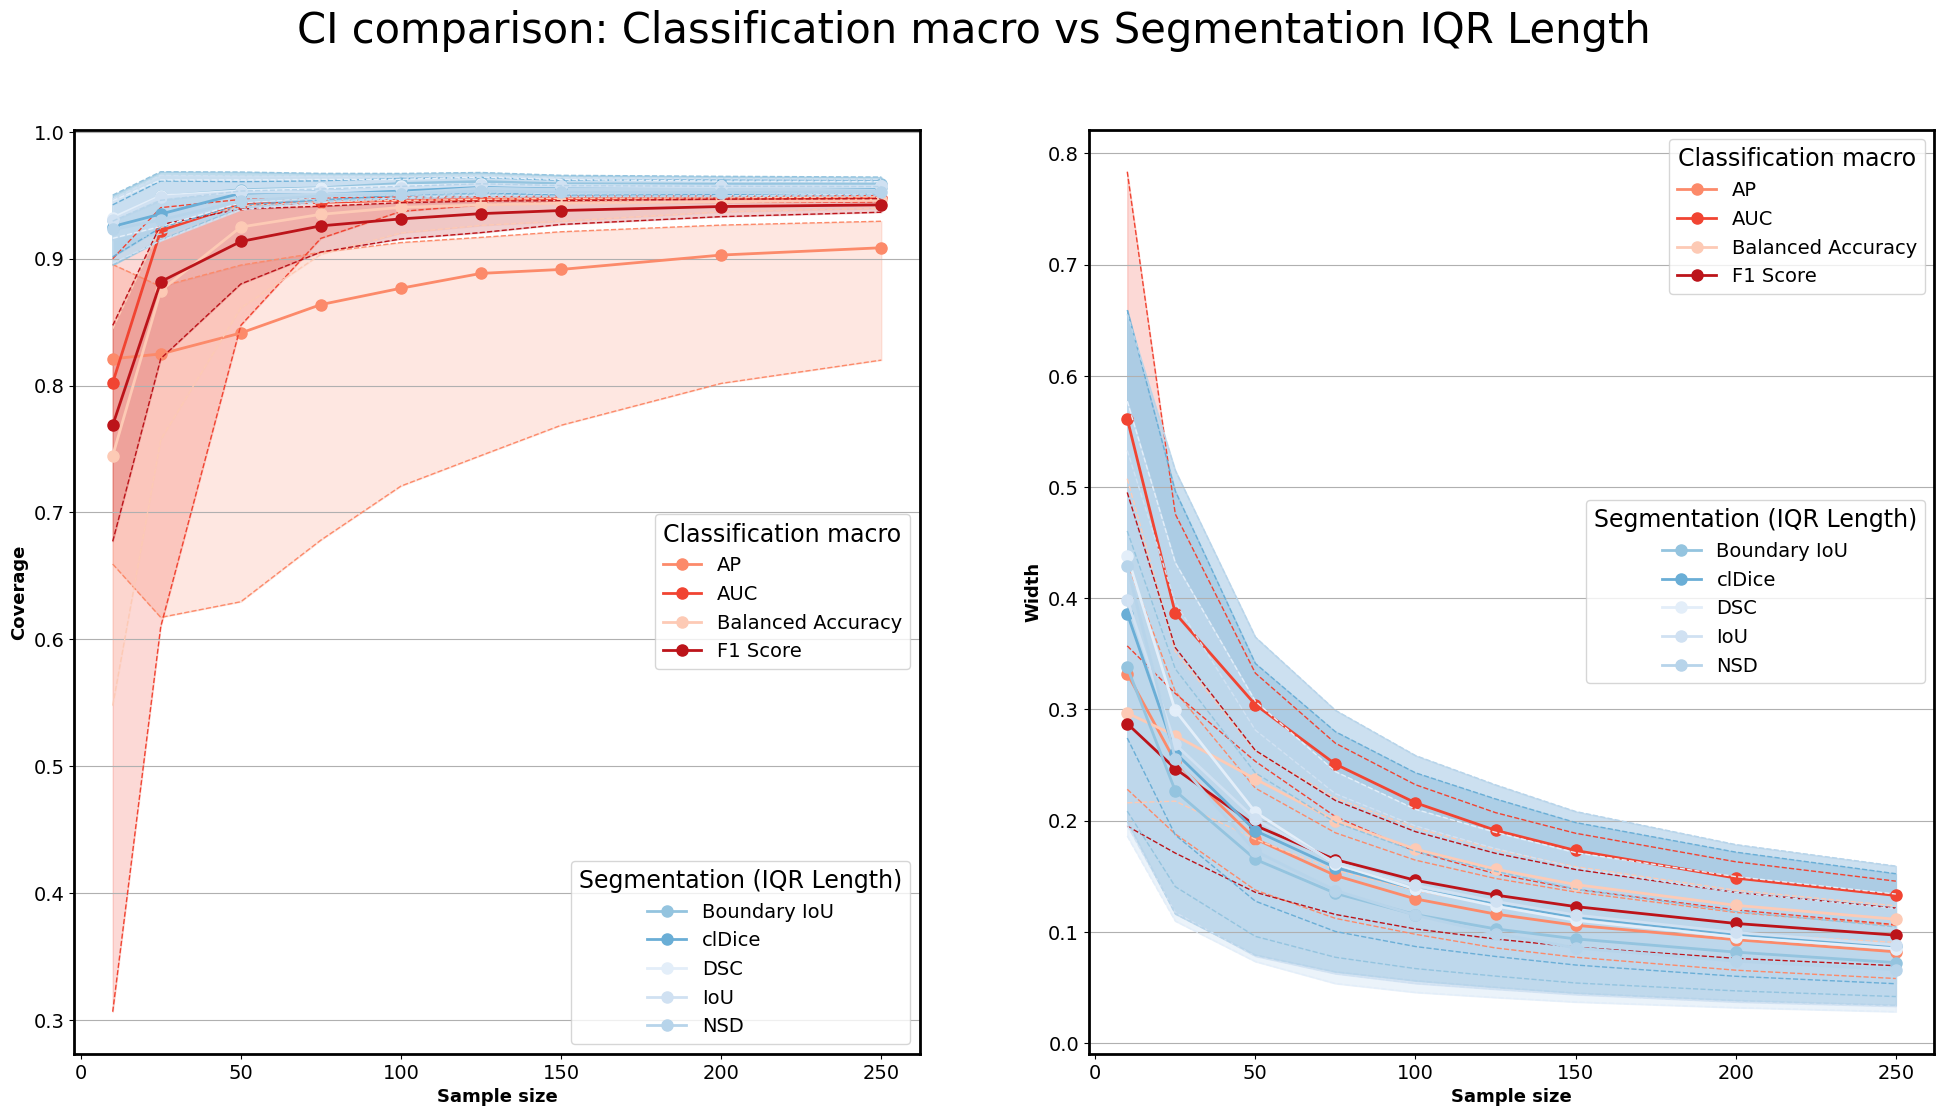

In [ ]:
# Color palettes
palette = sns.color_palette("Blues", len(metric_order))
color_dict = dict(zip(metric_order, palette))
metrics_classif = ["balanced_accuracy", "ap", "auc", "f1_score"]
palette_classif = sns.color_palette("Reds", len(metrics_classif))
color_dict_classif = dict(zip(metrics_classif, palette_classif))

df_macro_perc = df_macro[(df_macro['n'] <= 250) & (df_macro['method'] == 'percentile')]
df_segm_perc = df_segm[(df_segm['n'] <= 250) & (df_segm['method'] == 'percentile') &
                       (df_segm['metric'].isin(["boundary_iou", "nsd", "iou", "dsc", "cldice"]))]
df_segm_perc_width = df_segm_width[(df_segm_width['n'] <= 250) & (df_segm_width['method'] == 'percentile') &
                                   (df_segm_width['metric'].isin(["boundary_iou", "nsd", "iou", "dsc", "cldice"]))]
df_macro_perc_width = df_macro_width[(df_macro_width['n'] <= 250) & (df_macro_width['method'] == 'percentile')]

# --- Main loop ---
for stat in df_segm_perc['stat'].unique():
    fig, axs = plt.subplots(1, 2, figsize=(24, 12))

    # ============================================================
    # COVERAGE PLOT
    # ============================================================
    ax = axs[0]

    # --- CLASSIFICATION FIRST ---
    medians = df_macro_perc.groupby(['n', 'stat'])['value'].median().reset_index()
    q1 = df_macro_perc.groupby(['n', 'stat'])['value'].quantile(0.25).reset_index()
    q3 = df_macro_perc.groupby(['n', 'stat'])['value'].quantile(0.75).reset_index()
    df_plot = medians.merge(q1, on=['n', 'stat'], suffixes=('_median', '_q1')).merge(q3, on=['n', 'stat'])
    df_plot.rename(columns={'value': 'value_q3'}, inplace=True)
    print(df_plot)
    for stat_classif in df_plot['stat'].unique():
        df_stat = df_plot[df_plot['stat'] == stat_classif]
        ax.plot(df_stat['n'], df_stat['value_median'], marker='o',
                label=metric_labels[stat_classif],
                color=color_dict_classif[stat_classif], linewidth=2, markersize=8)
        ax.plot(df_stat['n'], df_stat['value_q3'], linestyle="--",
                color=color_dict_classif[stat_classif], linewidth=1, markersize=8)
        ax.plot(df_stat['n'], df_stat['value_q1'],linestyle="--",
                color=color_dict_classif[stat_classif], linewidth=1, markersize=8)
        ax.fill_between(df_stat['n'], df_stat['value_q1'], df_stat['value_q3'],
                        alpha=0.2, color=color_dict_classif[stat_classif])

    # --- SEGMENTATION SECOND ---
    df_segm_mean = df_segm_perc[df_segm_perc['stat'] == stat]
    medians = df_segm_mean.groupby(['n', 'metric'])['coverage'].median().reset_index()
    q1 = df_segm_mean.groupby(['n', 'metric'])['coverage'].quantile(0.25).reset_index()
    q3 = df_segm_mean.groupby(['n', 'metric'])['coverage'].quantile(0.75).reset_index()
    df_plot = medians.merge(q1, on=['n', 'metric'], suffixes=('_median', '_q1')).merge(q3, on=['n', 'metric'])
    df_plot.rename(columns={'coverage': 'coverage_q3'}, inplace=True)

    for metric in df_plot['metric'].unique():
        df_metric = df_plot[df_plot['metric'] == metric]
        ax.plot(df_metric['n'], df_metric['coverage_median'], marker='o',
                label=metric_labels[metric],
                color=color_dict[metric], linewidth=2, markersize=8)
        ax.plot(df_metric['n'], df_metric['coverage_q1'], linestyle="--",
               
                color=color_dict[metric], linewidth=1,  markersize=8)
        ax.plot(df_metric['n'], df_metric['coverage_q3'],  linestyle="--",
               
                color=color_dict[metric], linewidth=1, markersize=8)
        ax.fill_between(df_metric['n'], df_metric['coverage_q1'], df_metric['coverage_q3'],
                        alpha=0.6, color=color_dict[metric])

    # Formatting
    ax.set_xlabel('Sample size', fontsize=13, weight='bold')
    ax.set_ylabel('Coverage', weight='bold', fontsize=13)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True, axis='y')

    # --- Legends (Classification first) ---
    handles, labels = ax.get_legend_handles_labels()
    n_seg = len(metric_order) - 4

    leg_classif = ax.legend(
        handles[:4], labels[:4],
        title="Classification macro", fontsize=14, title_fontsize=17,
        loc='center right'
    )
    leg_segm = ax.legend(
        handles[4:], labels[4:],
        title=f"Segmentation ({stat_labels[stat]})", fontsize=14, title_fontsize=17,
        loc='lower right'
    )
    ax.add_artist(leg_classif)

    # ============================================================
    # WIDTH PLOT
    # ============================================================
    ax = axs[1]

    # --- CLASSIFICATION FIRST ---
    medians = df_macro_perc_width.groupby(['n', 'stat'])['width'].median().reset_index()
    q1 = df_macro_perc_width.groupby(['n', 'stat'])['width'].quantile(0.25).reset_index()
    q3 = df_macro_perc_width.groupby(['n', 'stat'])['width'].quantile(0.75).reset_index()
    df_plot = medians.merge(q1, on=['n', 'stat'], suffixes=('_median', '_q1')).merge(q3, on=['n', 'stat'])
    df_plot.rename(columns={'width': 'width_q3'}, inplace=True)

    for stat_classif in df_plot['stat'].unique():
        df_stat = df_plot[df_plot['stat'] == stat_classif]
        ax.plot(df_stat['n'], df_stat['width_median'], marker='o',
                label=metric_labels[stat_classif],
                color=color_dict_classif[stat_classif], linewidth=2, markersize=8)
        ax.plot(df_stat['n'], df_stat['width_q1'], linestyle="--",
                
                color=color_dict_classif[stat_classif], linewidth=1, markersize=8)
        ax.plot(df_stat['n'], df_stat['width_q3'],linestyle="--",
               
                color=color_dict_classif[stat_classif], linewidth=1, markersize=8)
        ax.fill_between(df_stat['n'], df_stat['width_q1'], df_stat['width_q3'],
                        alpha=0.2, color=color_dict_classif[stat_classif])

    # --- SEGMENTATION SECOND ---
    df_segm_mean = df_segm_perc_width[df_segm_perc_width['stat'] == stat]
    medians = df_segm_mean.groupby(['n', 'metric'])['width'].median().reset_index()
    q1 = df_segm_mean.groupby(['n', 'metric'])['width'].quantile(0.25).reset_index()
    q3 = df_segm_mean.groupby(['n', 'metric'])['width'].quantile(0.75).reset_index()
    df_plot = medians.merge(q1, on=['n', 'metric'], suffixes=('_median', '_q1')).merge(q3, on=['n', 'metric'])
    df_plot.rename(columns={'width': 'width_q3'}, inplace=True)

    for metric in df_plot['metric'].unique():
        df_metric = df_plot[df_plot['metric'] == metric]
        ax.plot(df_metric['n'], df_metric['width_median'], marker='o',
                label=metric_labels[metric],
                color=color_dict[metric], linewidth=2, markersize=8)
        ax.plot(df_metric['n'], df_metric['width_q1'], linestyle="--",
                
                color=color_dict[metric], linewidth=1, markersize=8)
        ax.plot(df_metric['n'], df_metric['width_q3'], linestyle="--",
                
                color=color_dict[metric], linewidth=1, markersize=8)
        ax.fill_between(df_metric['n'], df_metric['width_q1'], df_metric['width_q3'],
                        alpha=0.7, color=color_dict[metric])

    # Formatting
    ax.set_xlabel('Sample size', fontsize=13, weight='bold')
    ax.set_ylabel('Width', weight='bold', fontsize=13)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True, axis='y')

    # Legends (Classification first)
    handles, labels = ax.get_legend_handles_labels()
    leg_classif = ax.legend(
        handles[:4], labels[:4],
        title="Classification macro", fontsize=14, title_fontsize=17,
        loc='upper right'
    )
    leg_segm = ax.legend(
        handles[4:], labels[4:],
        title=f"Segmentation ({stat_labels[stat]})", fontsize=14, title_fontsize=17,
        loc='center right'
    )
    ax.add_artist(leg_classif)

    plt.suptitle(f"CI comparison: Classification macro vs Segmentation {stat_labels[stat]}", fontsize=30)
    # plt.savefig(f'../../../clean_figs/fig_7_{stat}.pdf')

    plt.show()


In [ ]:
df_macro_perc

subtask   algo               stat      n  \
2      aptos19_blindness_detection  alg_1  balanced_accuracy   10.0   
5      aptos19_blindness_detection  alg_1  balanced_accuracy   25.0   
8      aptos19_blindness_detection  alg_1  balanced_accuracy   50.0   
11     aptos19_blindness_detection  alg_1  balanced_accuracy   75.0   
14     aptos19_blindness_detection  alg_1  balanced_accuracy  100.0   
...                            ...    ...                ...    ...   
28367              mura_xr_forearm  alg_9           f1_score  100.0   
28370              mura_xr_forearm  alg_9           f1_score  125.0   
28373              mura_xr_forearm  alg_9           f1_score  150.0   
28376              mura_xr_forearm  alg_9           f1_score  200.0   
28379              mura_xr_forearm  alg_9           f1_score  250.0   

           method   value  x_group  
2      percentile  0.4313   n=10.0  
5      percentile  0.7575   n=25.0  
8      percentile  0.8821   n=50.0  
11     percentile  0.9008   n=75.0  
14     percentile  0.9156  n=100.0  
...           ...     ...      ...  
28367  percentile  0.9358  n=100.0  
28370  percentile  0.9373  n=125.0  
28373  percentile  0.9387  n=150.0  
28376  percentile  0.9462  n=200.0  
28379  percentile  0.9461  n=250.0  

[8208 rows x 7 columns]

# Figure 8

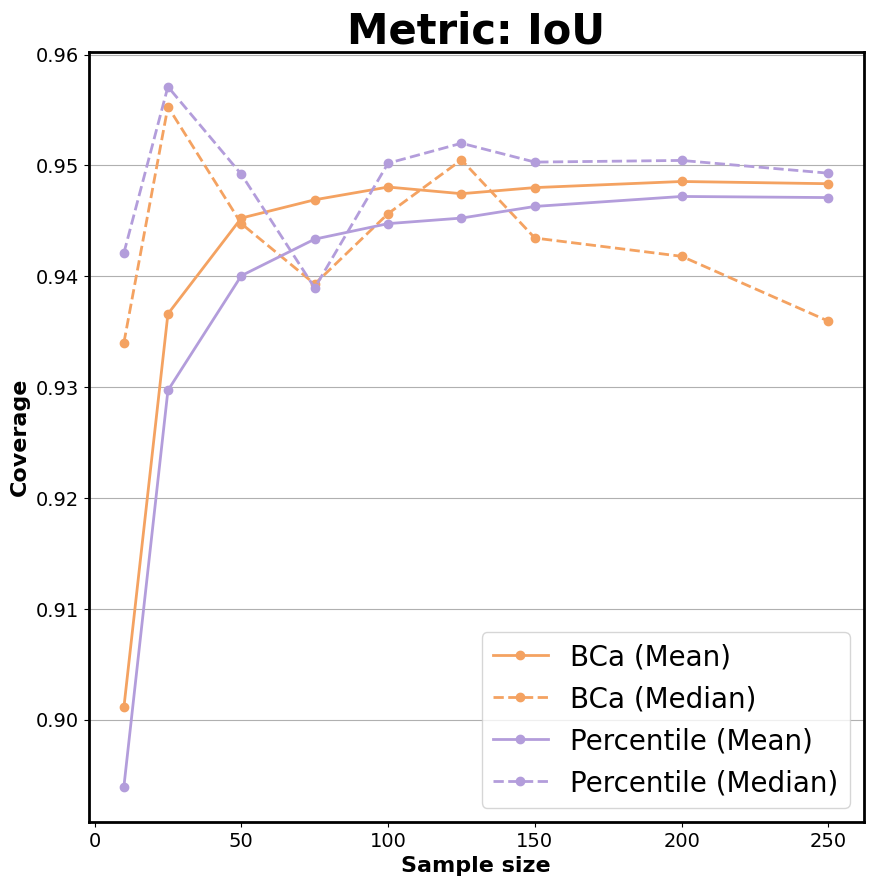

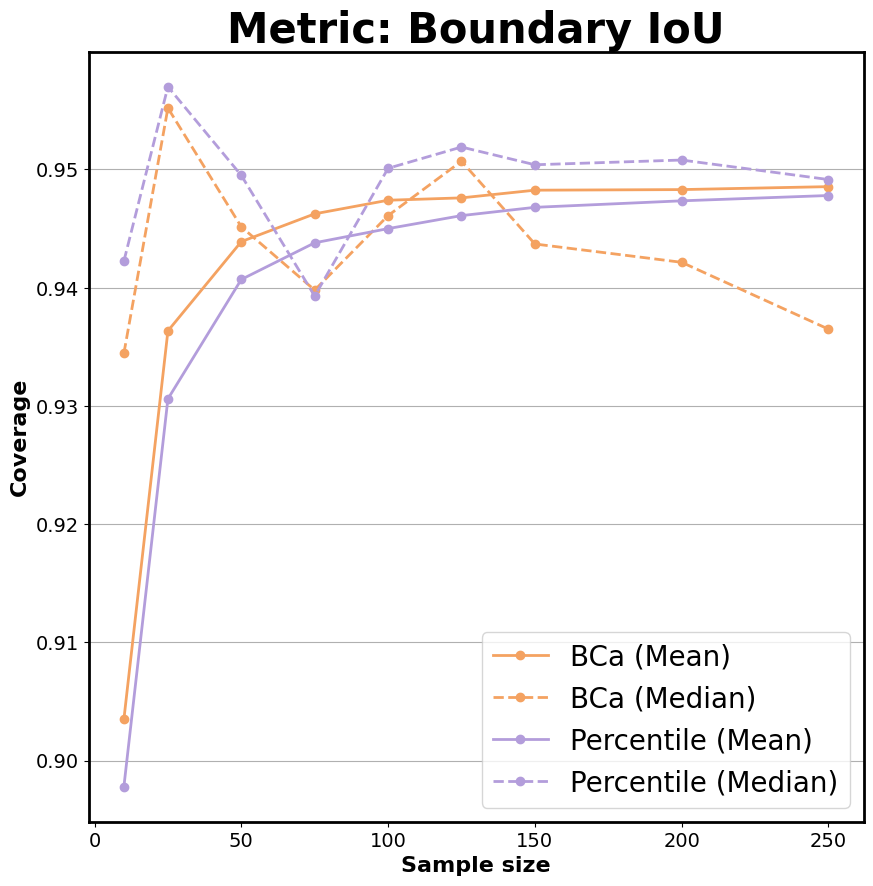

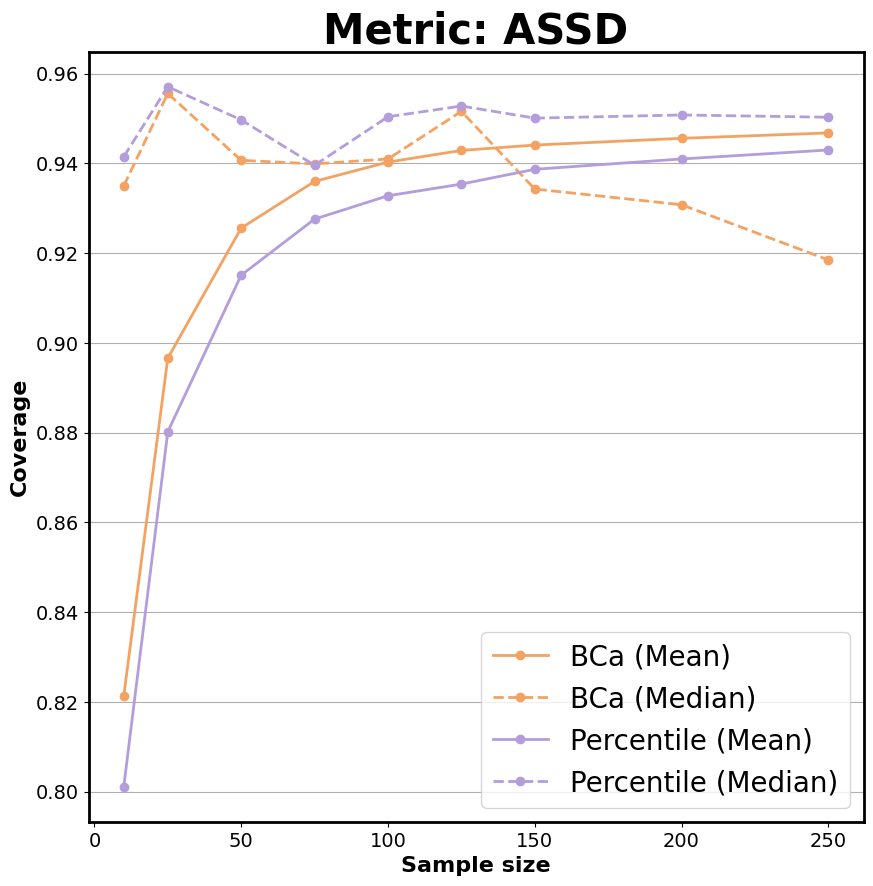

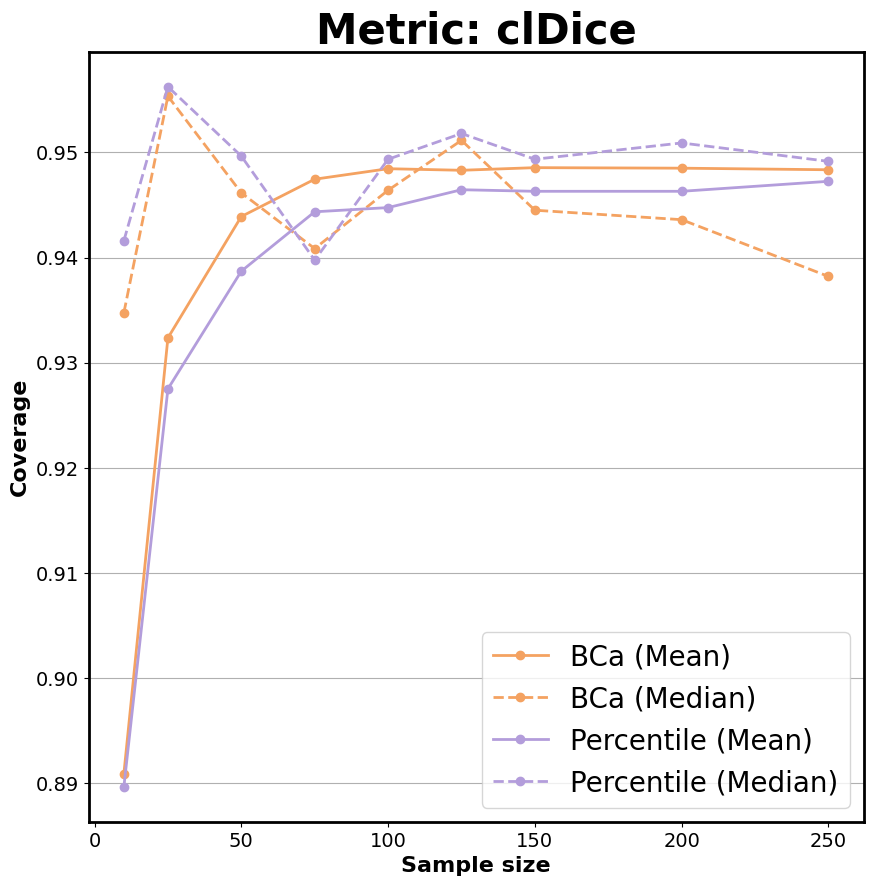

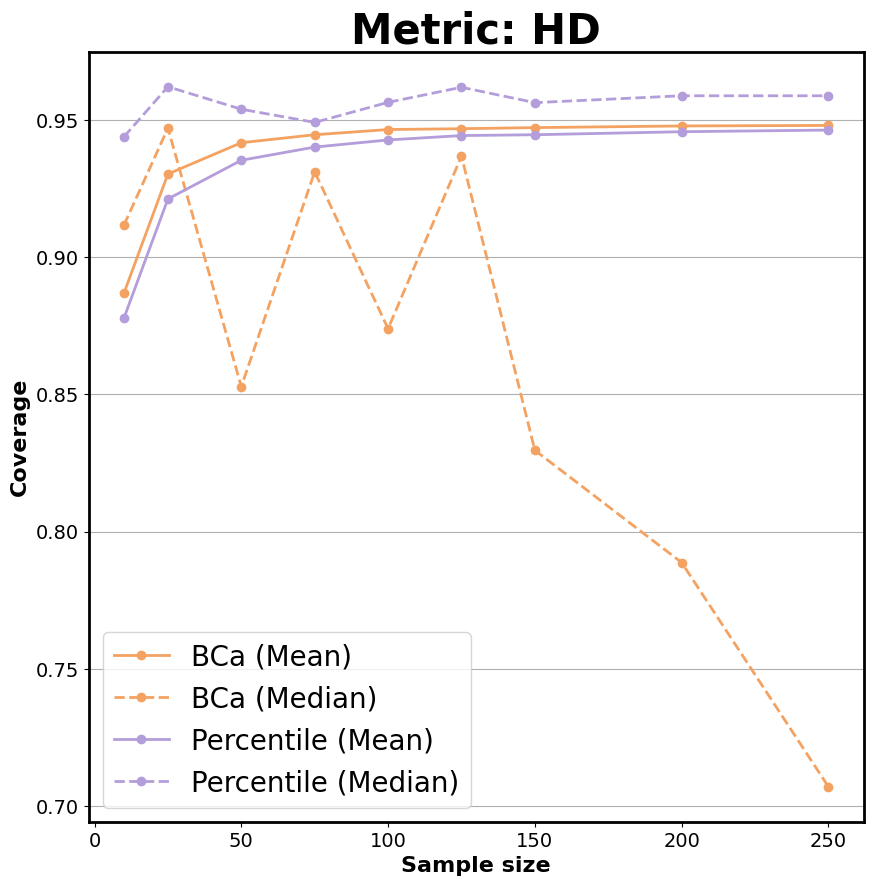

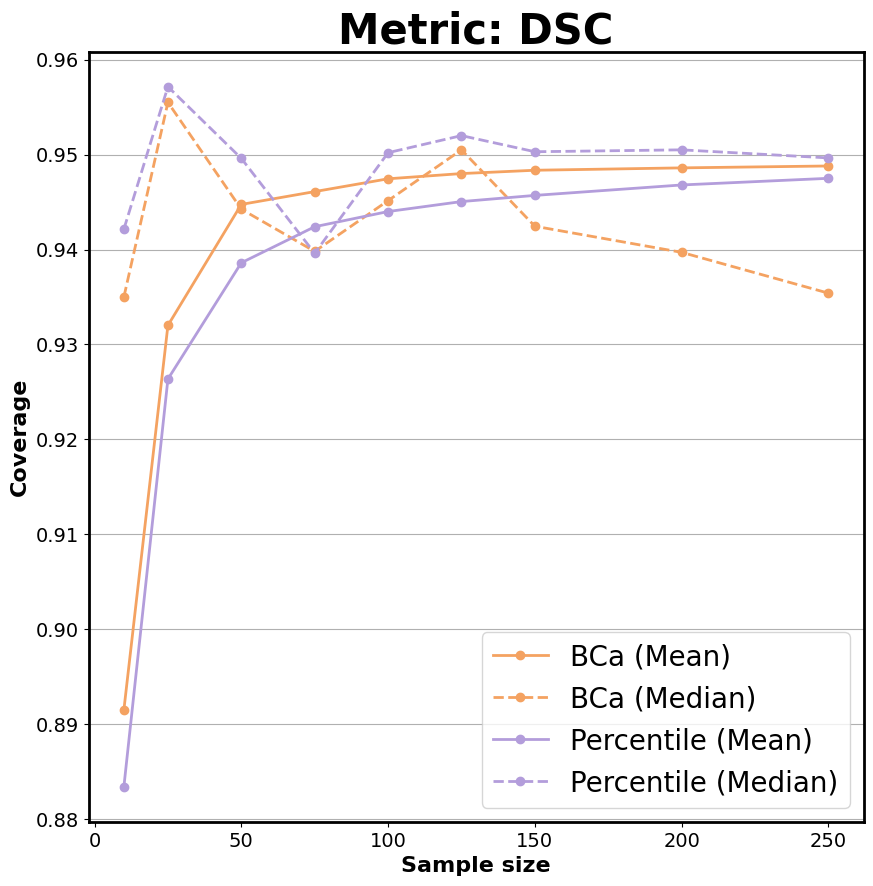

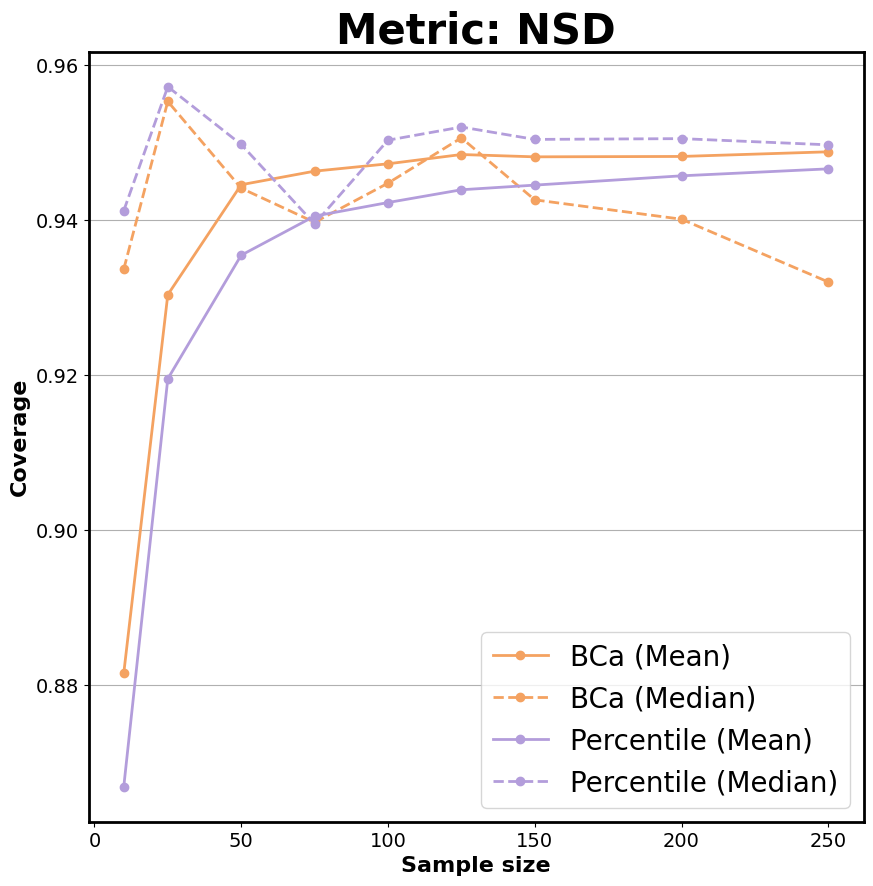

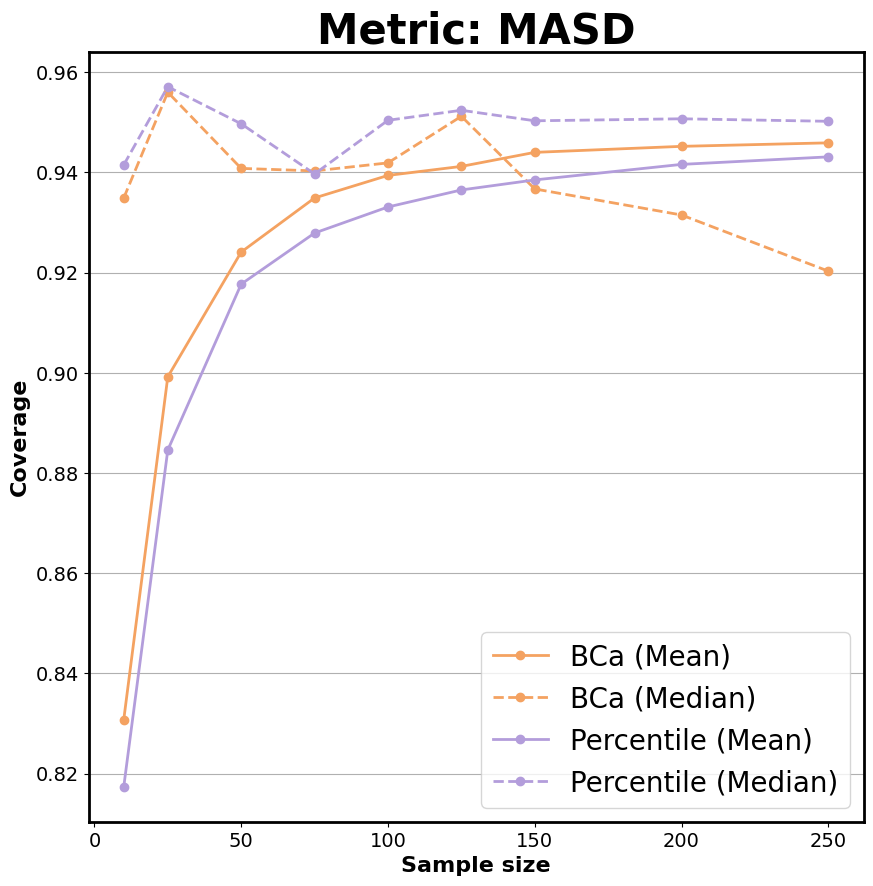

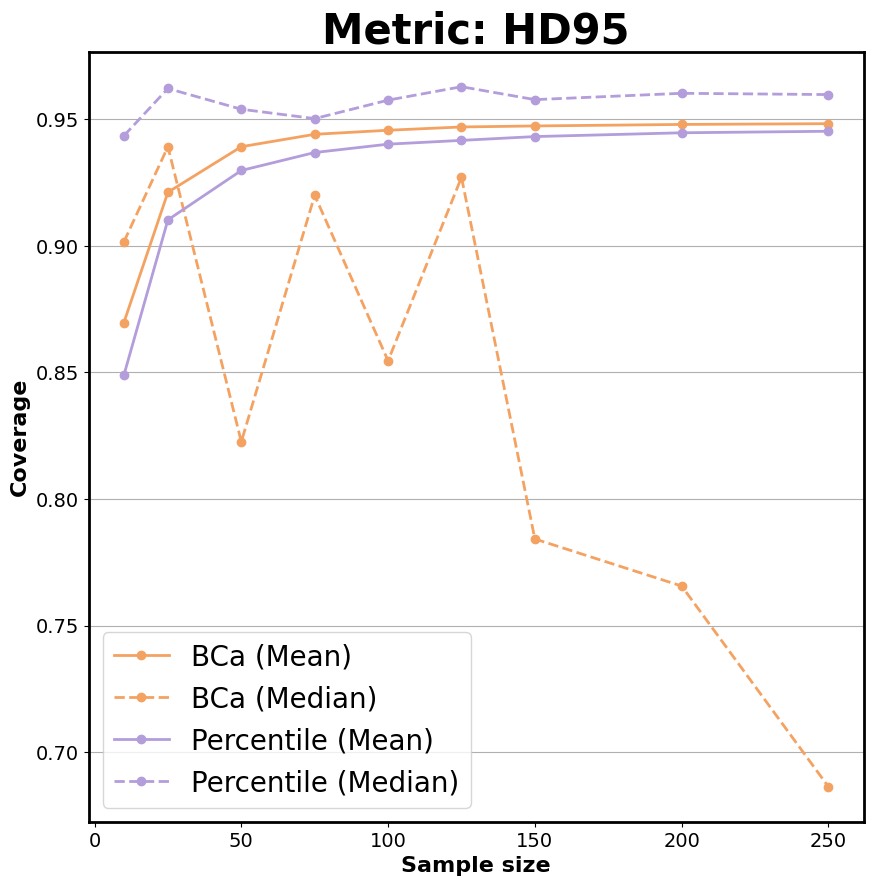

In [ ]:
metrics = df_segm['metric'].unique()
# Identify all columns except 'stat' and 'median'
other_cols = [c for c in df_segm.columns if c not in ["stat", "median"]]

for metric in metrics:
    df_all_metric=df_segm[df_segm['metric']==metric]
    data_method=df_all_metric[df_all_metric['method'].isin(['bca', 'percentile']) & df_all_metric['stat'].isin(['mean', 'median'])]
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)

    medians = data_method.groupby(['n', 'method', 'stat'])['coverage'].median().reset_index()
    q1 = data_method.groupby(['n', 'method', 'stat'])['coverage'].quantile(0.25).reset_index()
    q3 = data_method.groupby(['n', 'method', 'stat'])['coverage'].quantile(0.75).reset_index()
    df_plot = medians.merge(q1, on=['n', 'method', 'stat'], suffixes=('_median', '_q1')).merge(q3, on=['n', 'method', 'stat'])
    df_plot.rename(columns={'coverage': 'coverage_q3'}, inplace=True)
    
    for (method, stat), df_group in df_plot.groupby(['method', 'stat']):
        linestyle = '--' if stat == 'median' else '-'
        ax.plot(
            df_group['n'], df_group['coverage_median'],
            label=f"{method_labels[method]} ({stat_labels[stat]})",
            color=method_colors[method],
            marker='o',
            linestyle=linestyle,
            linewidth=2
        )
    
    ax.set_title(f'Metric: {metric_labels[metric]}', weight='bold')
    ax.set_xlabel('Sample size',weight='bold', fontsize=16)
    ax.set_ylabel('Coverage', weight='bold', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=14)

    ax.grid(True, axis='y')

    ax.legend(prop={'weight':'bold'}, fontsize= 20)
    plt.legend(fontsize= 20)

    #plt.savefig(f"../../../clean_figs/fig_8_{metric}.pdf") # leave room for suptitle
    plt.show()


# Figure 9

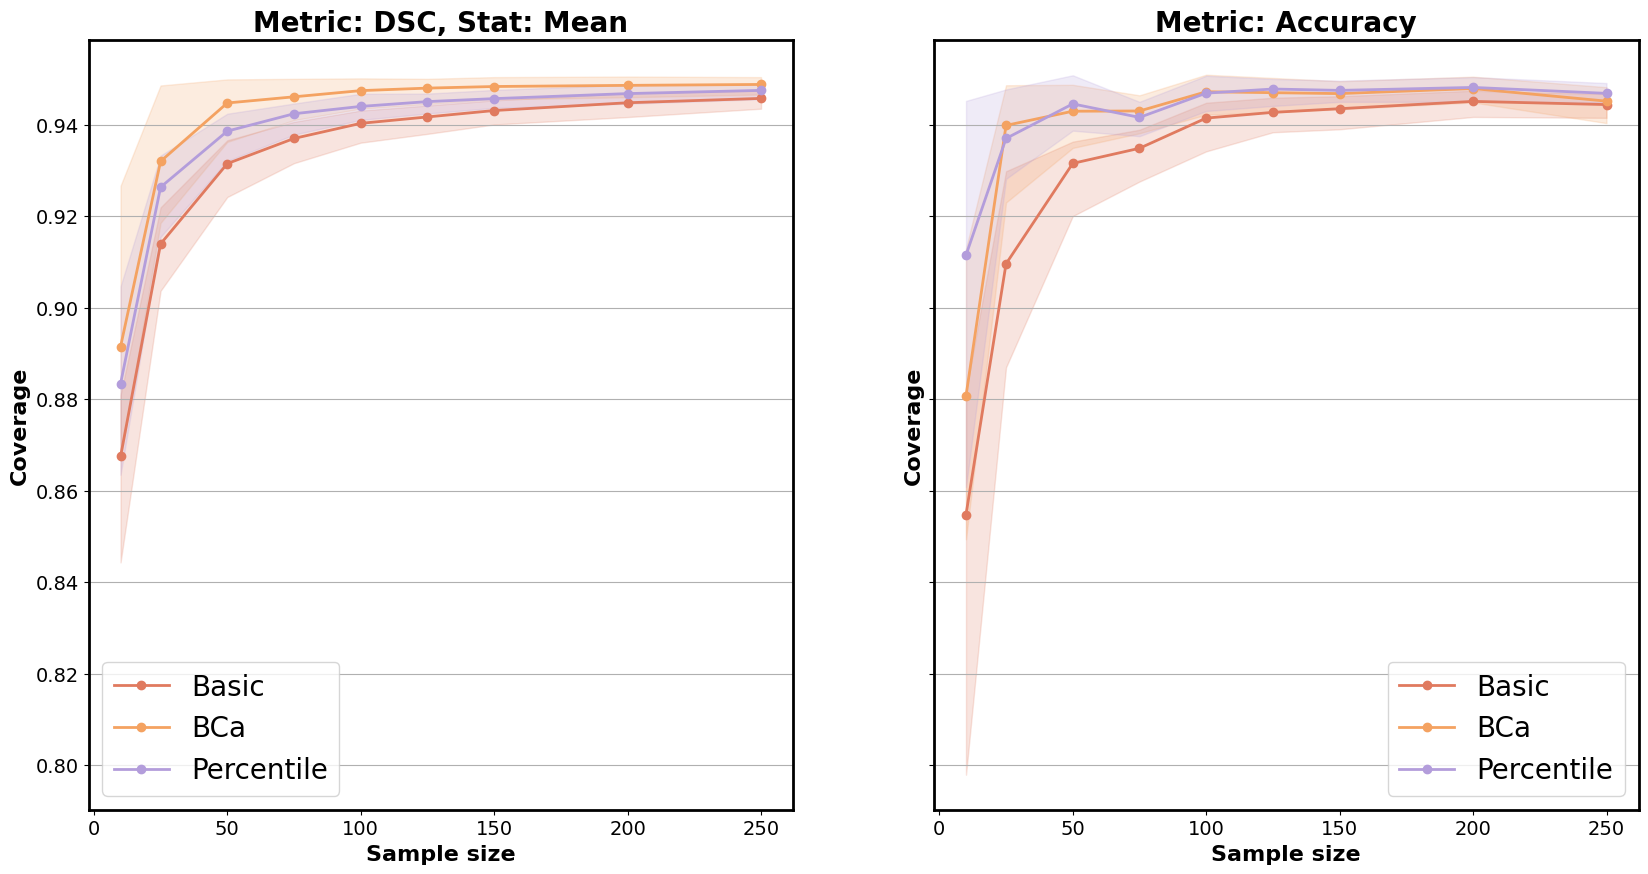

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

ax = axs[0]
metric = "dsc"
stat = "mean"
df_metric=df_segm[df_segm['metric']==metric]
df_stat=df_metric[(df_metric['stat']==stat) & (df_metric['method'].isin(['bca', 'percentile', 'basic']))]

medians = df_stat.groupby(['n', 'method', 'stat'])['coverage'].median().reset_index()
q1 = df_stat.groupby(['n', 'method', 'stat'])['coverage'].quantile(0.25).reset_index()
q3 = df_stat.groupby(['n', 'method', 'stat'])['coverage'].quantile(0.75).reset_index()
df_plot = medians.merge(q1, on=['n', 'method', 'stat'], suffixes=('_median', '_q1')).merge(q3, on=['n', 'method', 'stat'])
df_plot.rename(columns={'coverage': 'coverage_q3'}, inplace=True)

for method, df_group in df_plot.groupby("method"):
    if method not in ['bca', 'percentile', 'basic']:
        pass
    ax.plot(
        df_group['n'], df_group['coverage_median'],
        label=f"{method_labels[method]}",
        color=method_colors[method],
        marker='o',
        linewidth=2
    )
    ax.fill_between(df_group['n'], df_group['coverage_q1'], df_group['coverage_q3'],
        color=method_colors[method],
        alpha=0.2)

ax.set_title(f'Metric: {metric_labels[metric]}, Stat: {stat_labels[stat]}', weight='bold', fontsize=20)
ax.set_xlabel('Sample size',weight='bold', fontsize=16)
ax.set_ylabel('Coverage', weight='bold', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.grid(True, axis='y')

ax.legend(fontsize= 20)

ax= axs[1]
metric = "accuracy"

df_metric=df_micro[(df_micro['stat']==metric) & (df_micro['method'].isin(['bca', 'percentile', 'basic']))]

medians = df_metric.groupby(['n', 'method'])['value'].median().reset_index()
q1 = df_metric.groupby(['n', 'method'])['value'].quantile(0.25).reset_index()
q3 = df_metric.groupby(['n', 'method'])['value'].quantile(0.75).reset_index()
df_plot = medians.merge(q1, on=['n', 'method'], suffixes=('_median', '_q1')).merge(q3, on=['n', 'method'])
df_plot.rename(columns={'value': 'value_q3'}, inplace=True)

for method, df_group in df_plot.groupby("method"):
    if method not in ['bca', 'percentile', 'basic']:
        pass
    ax.plot(
        df_group['n'], df_group['value_median'],
        label=f"{method_labels[method]}",
        color=method_colors[method],
        marker='o',
        linewidth=2
    )
    ax.fill_between(df_group['n'], df_group['value_q1'], df_group['value_q3'],
        color=method_colors[method],
        alpha=0.2)

ax.set_title(f'Metric: {metric_labels[metric]}', weight='bold', fontsize=20)
ax.set_xlabel('Sample size',weight='bold', fontsize=16)
ax.set_ylabel('Coverage', weight='bold', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.grid(True, axis='y')

ax.legend(fontsize= 20)

#plt.savefig(f"../../../clean_figs/fig_9.pdf")
plt.show()


# Figure 10

In [ ]:
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.size": 10,
    "axes.titlesize": 10,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 7,
    "axes.edgecolor": "black",
    "axes.linewidth": 1,
    "axes.spines.top": True,
    "axes.spines.right": True,
    "axes.grid": False,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white",
    "axes.facecolor": "white"
})

@njit
def balanced_accuracy_vec(y_true, y_pred, n_classes):
    """Vectorized balanced accuracy for a single sample."""
    recalls = np.zeros(n_classes, dtype=np.float32)
    for c in range(n_classes):
        mask = y_true == c
        n = mask.sum()
        if n > 0:
            recalls[c] = (y_pred[mask] == c).sum() / n
    return recalls.mean()

@njit(parallel=True)
def bootstrap_ba(y_true, y_pred, n_classes, n_bootstrap, random_state=None):
    """Compute balanced accuracy over bootstrap samples in parallel."""
    n_samples = y_true.shape[0]
    ba_boot = np.empty(n_bootstrap, dtype=np.float32)
    for b in prange(n_bootstrap):
        idx = np.random.randint(0, n_samples, n_samples)
        ba_boot[b] = balanced_accuracy_vec(y_true[idx], y_pred[idx], n_classes)
    return ba_boot

def stratified_bootstrap_CI_shared(y_true, y_pred, n_classes, n_bootstrap=1000, alpha=0.05):
    """
    Compute percentile, basic, and BCa bootstrap CIs using the same bootstrap samples.

    y_true, y_pred: shape (batch_size, n_samples)
    Returns:
        ci_lower_percentile, ci_upper_percentile,
        ci_lower_basic, ci_upper_basic,
        ci_lower_bca, ci_upper_bca
    """
    batch_size, n_samples = y_true.shape

    ci_lower_percentile = np.empty(batch_size, dtype=np.float32)
    ci_upper_percentile = np.empty(batch_size, dtype=np.float32)
    ci_lower_basic = np.empty(batch_size, dtype=np.float32)
    ci_upper_basic = np.empty(batch_size, dtype=np.float32)
    ci_lower_bca = np.empty(batch_size, dtype=np.float32)
    ci_upper_bca = np.empty(batch_size, dtype=np.float32)

    for i in range(batch_size):
        original_stat = balanced_accuracy_vec(y_true[i], y_pred[i], n_classes)

        # Bootstrap replicates
        ba_boot = bootstrap_ba(y_true[i], y_pred[i], n_classes, n_bootstrap)

        # Percentile CI
        ci_lower_percentile[i] = np.percentile(ba_boot, 100 * (alpha / 2))
        ci_upper_percentile[i] = np.percentile(ba_boot, 100 * (1 - alpha / 2))

        # Basic CI
        ci_lower_basic[i] = 2 * original_stat - ci_upper_percentile[i]
        ci_upper_basic[i] = 2 * original_stat - ci_lower_percentile[i]

        # ---- BCa CI ----
        # 1. Bias correction
        prop_less = (np.sum(ba_boot < original_stat)) / n_bootstrap
        # Avoid extreme values 0 or 1
        prop_less = np.clip(prop_less, 1e-10, 1 - 1e-10)
        z0 = norm.ppf(prop_less)

        # 2. Acceleration via jackknife
        jackknife_stats = []
        for j in range(n_samples):
            mask = np.ones(n_samples, dtype=bool)
            mask[j] = False
            jack_stat = balanced_accuracy_vec(y_true[i][mask], y_pred[i][mask], n_classes)
            jackknife_stats.append(jack_stat)
        jackknife_stats = np.array(jackknife_stats)
        jack_mean = np.mean(jackknife_stats)

        num = np.sum((jack_mean - jackknife_stats) ** 3)
        den = 6.0 * (np.sum((jack_mean - jackknife_stats) ** 2) ** 1.5)

        # Acceleration with guard
        acc = num / den if den > 0 else 0.0

        # 3. Adjusted quantiles with safeguard
        def safe_adj(z_alpha):
            denom = 1 - acc * (z0 + z_alpha)
            if np.isnan(denom) or np.isclose(denom, 0.0):
                # fall back to plain percentile quantile
                return norm.cdf(z_alpha)
            return norm.cdf(z0 + (z0 + z_alpha) / denom)

        z_alpha_low = norm.ppf(alpha / 2)
        z_alpha_high = norm.ppf(1 - alpha / 2)

        adj_low = np.clip(safe_adj(z_alpha_low), 0, 1)
        adj_high = np.clip(safe_adj(z_alpha_high), 0, 1)

        ci_lower_bca[i] = np.percentile(ba_boot, 100 * adj_low)
        ci_upper_bca[i] = np.percentile(ba_boot, 100 * adj_high)



    return (
        ci_lower_percentile,
        ci_upper_percentile,
        ci_lower_basic,
        ci_upper_basic,
        ci_lower_bca,
        ci_upper_bca,
    )


def coverage_of_ci(targets, predictions, C, true_val=0.8, alpha=0.05, B=1000):
    """
    Compute coverage for both percentile and basic CIs using shared bootstrap samples.
    """
    ci_perc_low, ci_perc_high, ci_basic_low, ci_basic_high, ci_bca_low, ci_bca_high = stratified_bootstrap_CI_shared(
        targets, predictions, C, n_bootstrap=B, alpha=alpha
    )
    
    results = {
        "N": targets.shape[1],
        "C": C,
        "percentile_coverage": np.mean((ci_perc_low <= true_val) & (ci_perc_high >= true_val)),
        "percentile_ci_width": np.mean(ci_perc_high - ci_perc_low),
        "basic_coverage": np.mean((ci_basic_low <= true_val) & (ci_basic_high >= true_val)),
        "basic_ci_width": np.mean(ci_basic_high - ci_basic_low),
        "bca_coverage": np.mean((ci_bca_low <= true_val) & (ci_bca_high >= true_val)),
        "bca_ci_width": np.mean(ci_bca_high - ci_bca_low)
    }
    
    return results

def make_synthetic_data(N, C, recalls_per_class, class_proportions=None, n_samples=1000):
    """
    Generate synthetic data with N samples, C classes, and specified recall per class.
    The number of correct predictions per class is sampled from a binomial distribution
    to allow variability in recall.
    """
    if class_proportions is None:
        n_per_class = np.full(C, N // C)
    else:
        class_proportions = np.sort(class_proportions)
        class_proportions /= class_proportions.sum()
        n_per_class = (class_proportions * N).astype(np.int32)
        # Adjust to ensure total is N
        n_per_class[-1] += N - n_per_class.sum()
    
    delimitations = np.concatenate(([0], np.cumsum(n_per_class)))
    # True labels
    y_true_row = np.empty(N, dtype=np.int32)
    for c in range(C):
        start, end = delimitations[c], delimitations[c+1]
        y_true_row[start:end] = c
    y_true = np.tile(y_true_row, (n_samples, 1))
    
    y_pred = np.empty((n_samples, N), dtype=np.int32)
    
    for i in range(n_samples):
        row_pred = np.empty(N, dtype=np.int32)
        for c in range(C):
            # indices of this class
            start, end = delimitations[c], delimitations[c+1]
            idx = np.arange(start, end)
            np.random.shuffle(idx)
            
            # number of correct predictions sampled from binomial
            n_correct = np.random.binomial(n_per_class[c], recalls_per_class[c])
            n_wrong = n_per_class[c] - n_correct
            
            # assign correct predictions
            row_pred[idx[:n_correct]] = c
            
            # assign wrong predictions
            if n_wrong > 0:
                wrong_choices = [x for x in range(C) if x != c]
                row_pred[idx[n_correct:]] = np.random.choice(wrong_choices, n_wrong)
        
        y_pred[i] = row_pred
    
    # Optionally shuffle columns to mix classes
    perm = np.array([np.random.permutation(N) for _ in range(n_samples)])
    y_true = y_true[np.arange(n_samples)[:, None], perm]
    y_pred = y_pred[np.arange(n_samples)[:, None], perm]
    
    return y_true, y_pred

def exp2_vary_imbalance_runs(recall_per_class=0.8, 
                        C=3,
                        N_list=[60,120,240,600],
                        class_proportions=[[0.5,0.3,0.2], [0.7,0.2,0.1], [0.8,0.1,0.1]],
                        n_runs=15,
                        B=1000):
    """
    Run coverage experiment for multiple C and N values, with n_runs repetitions each.
    """
    results = []
    if np.isscalar(recall_per_class):
        rec = np.full(C, recall_per_class, dtype=np.float32)
    else:
        rec = np.asarray(recall_per_class, dtype=np.float32)
    
    for class_prop in class_proportions:
        for N in N_list:
            for run in range(n_runs):
                print(f"Running class proportions {class_prop}, N={N}, run {run+1}/{n_runs}")
                # Generate synthetic data
                targets, predictions = make_synthetic_data(N, C, recalls_per_class=rec, class_proportions=class_prop)
                # Compute coverage using shared bootstrap
                cov_res = coverage_of_ci(targets, predictions, C, 
                                                true_val=recall_per_class, 
                                                alpha=0.05, 
                                                B=B)
                cov_res['run'] = run + 1
                cov_res['N'] = N
                cov_res["imbalance"] = str(np.round(class_prop,3).tolist())
                results.append(cov_res)
    
    return pd.DataFrame(results)

df_exp2 = exp2_vary_imbalance_runs(recall_per_class=0.8, C=3, N_list=[12,24,36,48,60,72,84,96,108,120], class_proportions=[[1/3, 1/3, 1/3], [0.5,0.3,0.2], [0.7,0.2,0.1], [0.8,0.1,0.1]], n_runs=15)

# Compute the mean over runs
medians = df_exp2.groupby(["imbalance", "N"], as_index=False)[["basic_coverage", "percentile_coverage", "basic_ci_width", "percentile_ci_width",
                                                              "bca_coverage", "bca_ci_width"]].median()

methods = ["basic", "percentile", "bca"]

Running class proportions [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], N=12, run 1/15


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Running class proportions [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], N=12, run 2/15
Running class proportions [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], N=12, run 3/15
Running class proportions [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], N=12, run 4/15
Running class proportions [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], N=12, run 5/15
Running class proportions [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], N=12, run 6/15
Running class proportions [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], N=12, run 7/15
Running class proportions [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], N=12, run 8/15
Running class proportions [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], N=12, run 9/15
Running class proportions [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], N=12, run 10/15
Running class proportions [0.3333333333333333, 0.3333333333333333, 0.333

KeyboardInterrupt: 

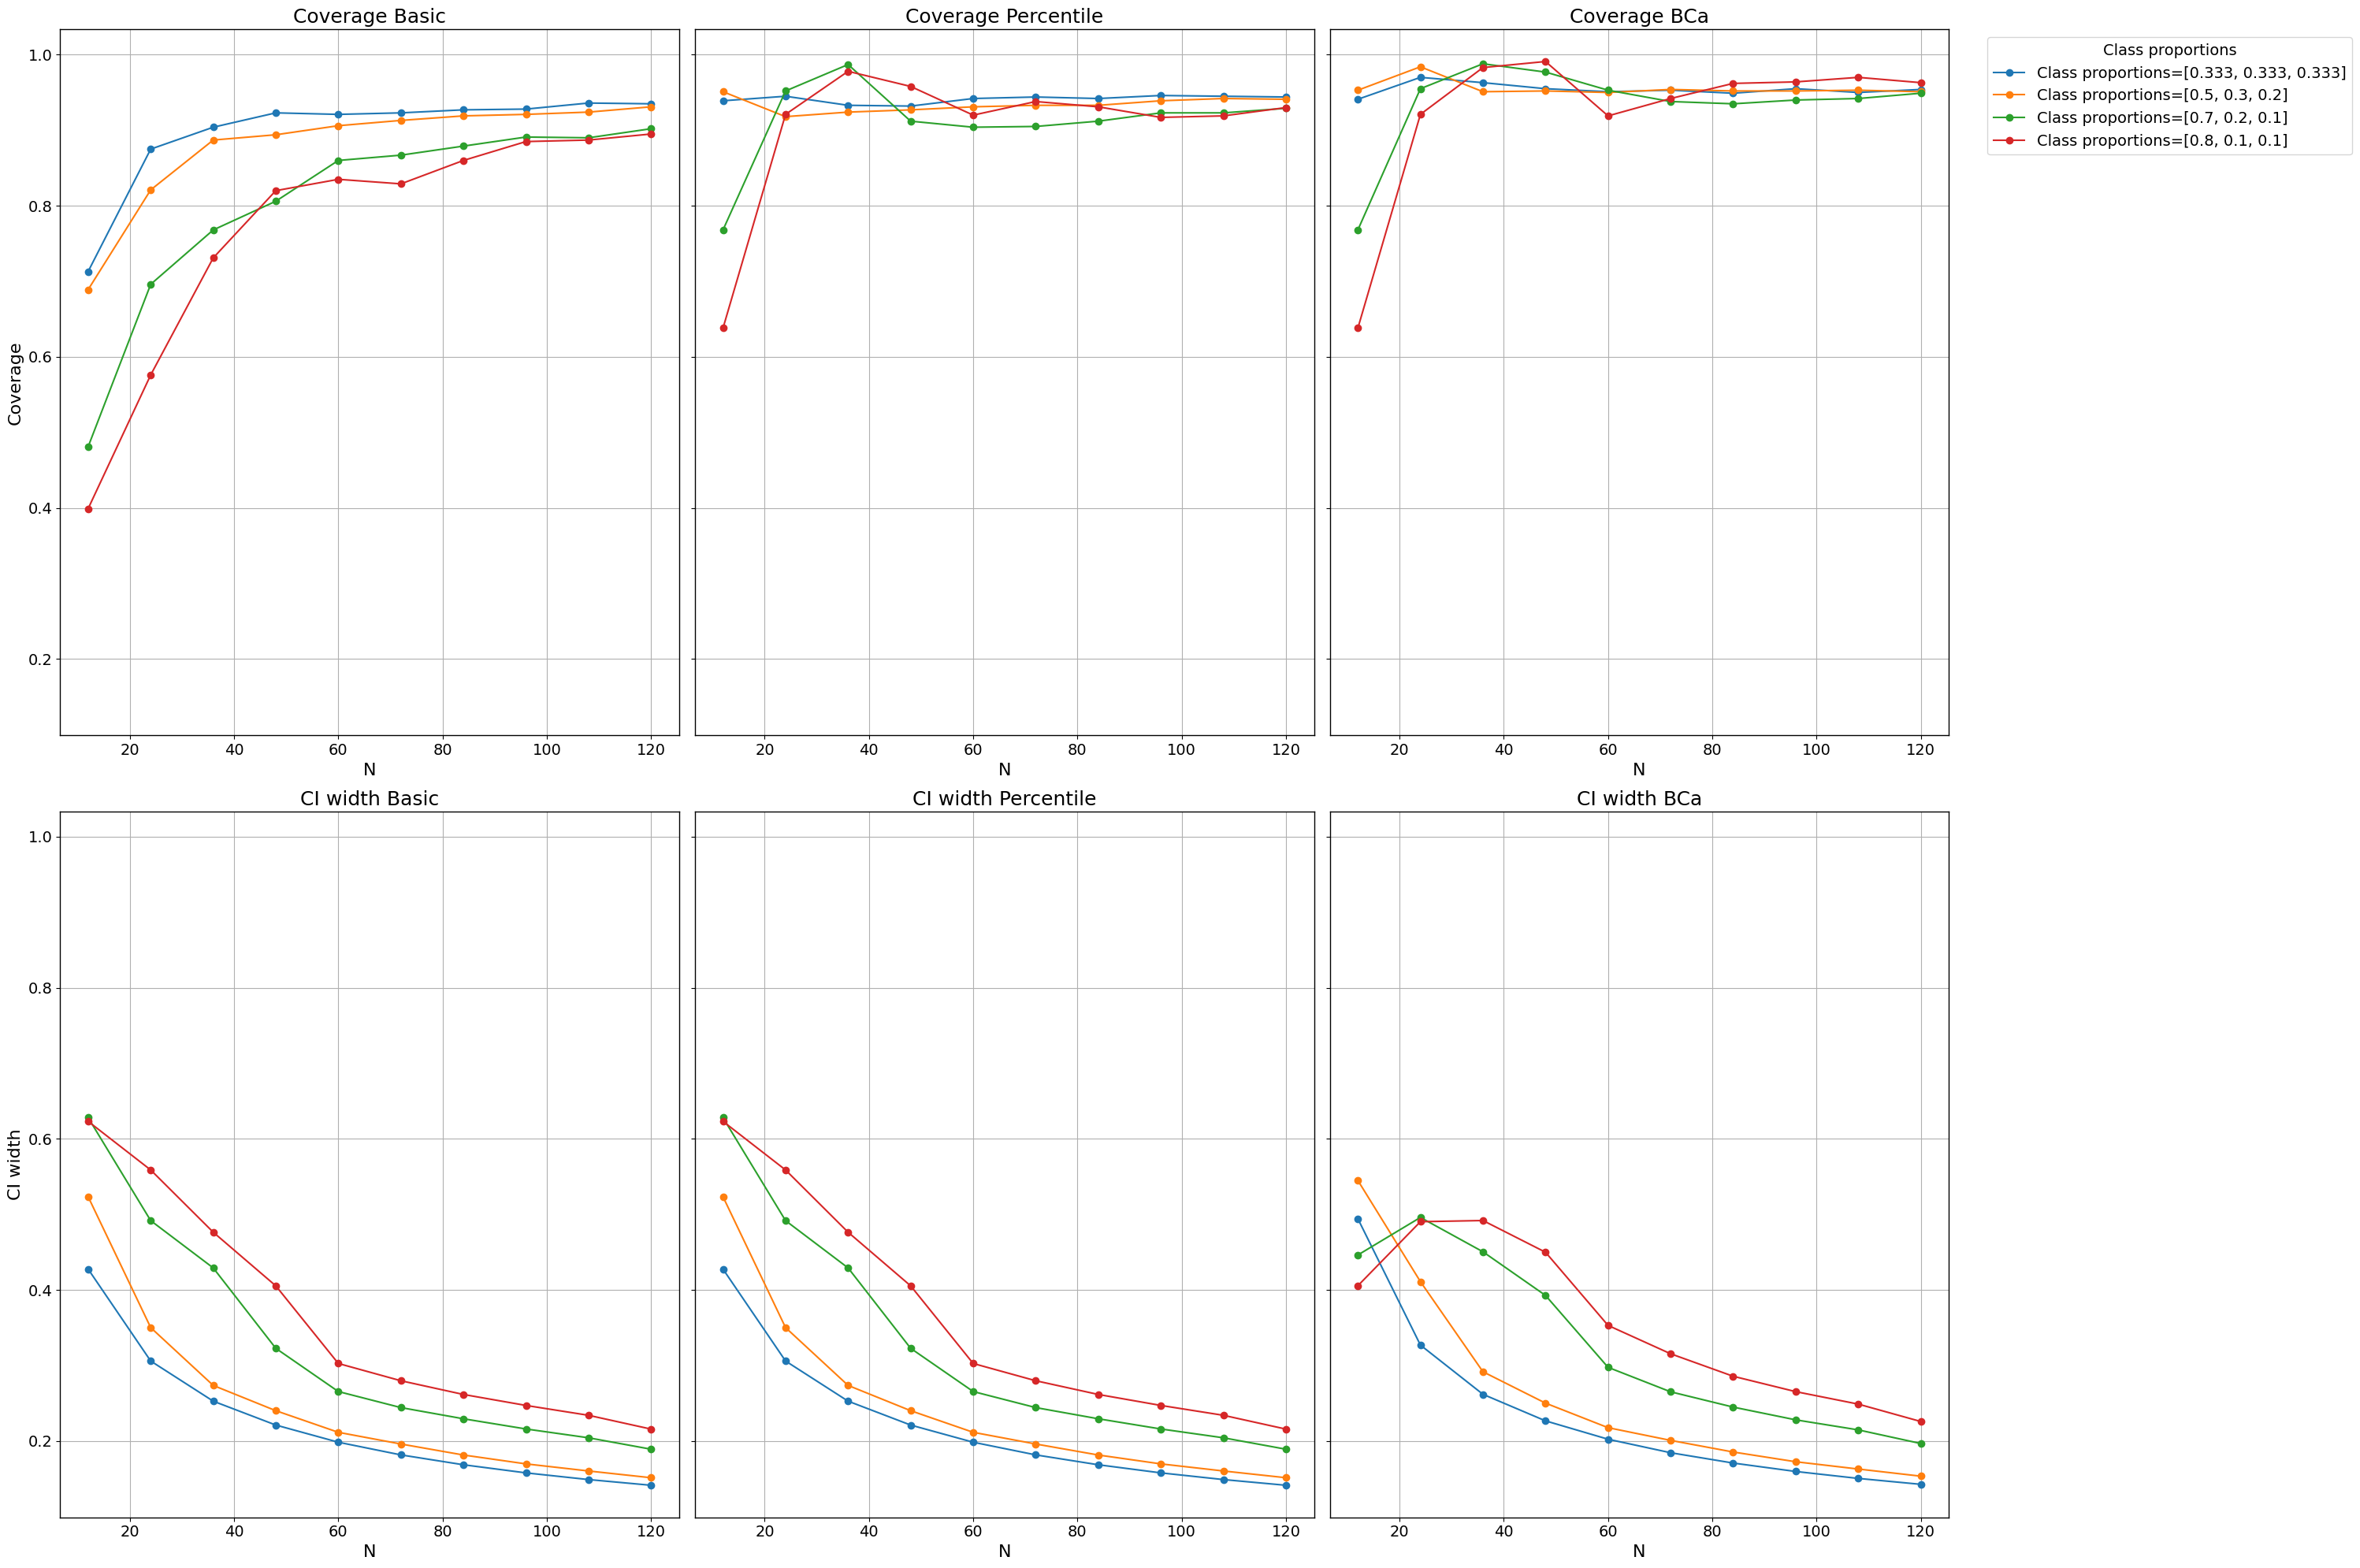

In [ ]:
fig, axes = plt.subplots(2, len(methods), figsize=(30, 20), sharey=True)

# Adjust font sizes
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
legend_fontsize = 14

for ax, method in zip(axes[0], methods):
    for c_val, group in medians.groupby("imbalance"):
        ax.plot(group["N"], group[f"{method}_coverage"], marker="o", label=f"Class proportions={c_val}")
    ax.set_title(f"Coverage {method_labels[method]}", fontsize=title_fontsize)
    ax.set_xlabel("N", fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=tick_fontsize)
    ax.grid(True)

axes[0, 0].set_ylabel("Coverage", fontsize=label_fontsize)
axes[0, -1].legend(title="Class proportions", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=legend_fontsize, title_fontsize=legend_fontsize)

for ax, method in zip(axes[1], methods):
    for c_val, group in medians.groupby("imbalance"):
        ax.plot(group["N"], group[f"{method}_ci_width"], marker="o", label=f"Class proportions={c_val}")
    ax.set_title(f"CI width {method_labels[method]}", fontsize=title_fontsize)
    ax.set_xlabel("N", fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=tick_fontsize)
    ax.grid(True)

axes[1, 0].set_ylabel("CI width", fontsize=label_fontsize)

plt.tight_layout()
plt.savefig("../../../clean_figs/fig_10.pdf")
plt.show()

# Figure 11

In [ ]:
import numpy as np
import pandas as pd
from numba import njit, prange
from scipy.stats import norm

@njit
def balanced_accuracy_vec(y_true, y_pred, n_classes):
    """Vectorized balanced accuracy for a single sample."""
    recalls = np.zeros(n_classes, dtype=np.float32)
    for c in range(n_classes):
        mask = y_true == c
        n = mask.sum()
        if n > 0:
            recalls[c] = (y_pred[mask] == c).sum() / n
    return recalls.mean()

@njit(parallel=True)
def bootstrap_ba(y_true, y_pred, n_classes, n_bootstrap, random_state=None):
    """Compute balanced accuracy over bootstrap samples in parallel."""
    n_samples = y_true.shape[0]
    ba_boot = np.empty(n_bootstrap, dtype=np.float32)
    for b in prange(n_bootstrap):
        idx = np.random.randint(0, n_samples, n_samples)
        ba_boot[b] = balanced_accuracy_vec(y_true[idx], y_pred[idx], n_classes)
    return ba_boot

def stratified_bootstrap_CI_shared(y_true, y_pred, n_classes, n_bootstrap=1000, alpha=0.05):
    """
    Compute percentile, basic, and BCa bootstrap CIs using the same bootstrap samples.

    y_true, y_pred: shape (batch_size, n_samples)
    Returns:
        ci_lower_percentile, ci_upper_percentile,
        ci_lower_basic, ci_upper_basic,
        ci_lower_bca, ci_upper_bca
    """
    batch_size, n_samples = y_true.shape

    ci_lower_percentile = np.empty(batch_size, dtype=np.float32)
    ci_upper_percentile = np.empty(batch_size, dtype=np.float32)
    ci_lower_basic = np.empty(batch_size, dtype=np.float32)
    ci_upper_basic = np.empty(batch_size, dtype=np.float32)
    ci_lower_bca = np.empty(batch_size, dtype=np.float32)
    ci_upper_bca = np.empty(batch_size, dtype=np.float32)

    for i in range(batch_size):
        original_stat = balanced_accuracy_vec(y_true[i], y_pred[i], n_classes)

        # Bootstrap replicates
        ba_boot = bootstrap_ba(y_true[i], y_pred[i], n_classes, n_bootstrap)

        # Percentile CI
        ci_lower_percentile[i] = np.percentile(ba_boot, 100 * (alpha / 2))
        ci_upper_percentile[i] = np.percentile(ba_boot, 100 * (1 - alpha / 2))

        # Basic CI
        ci_lower_basic[i] = 2 * original_stat - ci_upper_percentile[i]
        ci_upper_basic[i] = 2 * original_stat - ci_lower_percentile[i]

        # ---- BCa CI ----
        # 1. Bias correction
        prop_less = (np.sum(ba_boot < original_stat)) / n_bootstrap
        # Avoid extreme values 0 or 1
        prop_less = np.clip(prop_less, 1e-10, 1 - 1e-10)
        z0 = norm.ppf(prop_less)

        # 2. Acceleration via jackknife
        jackknife_stats = []
        for j in range(n_samples):
            mask = np.ones(n_samples, dtype=bool)
            mask[j] = False
            jack_stat = balanced_accuracy_vec(y_true[i][mask], y_pred[i][mask], n_classes)
            jackknife_stats.append(jack_stat)
        jackknife_stats = np.array(jackknife_stats)
        jack_mean = np.mean(jackknife_stats)

        num = np.sum((jack_mean - jackknife_stats) ** 3)
        den = 6.0 * (np.sum((jack_mean - jackknife_stats) ** 2) ** 1.5)

        # Acceleration with guard
        acc = num / den if den > 0 else 0.0

        # 3. Adjusted quantiles with safeguard
        def safe_adj(z_alpha):
            denom = 1 - acc * (z0 + z_alpha)
            if np.isnan(denom) or np.isclose(denom, 0.0):
                # fall back to plain percentile quantile
                return norm.cdf(z_alpha)
            return norm.cdf(z0 + (z0 + z_alpha) / denom)

        z_alpha_low = norm.ppf(alpha / 2)
        z_alpha_high = norm.ppf(1 - alpha / 2)

        adj_low = np.clip(safe_adj(z_alpha_low), 0, 1)
        adj_high = np.clip(safe_adj(z_alpha_high), 0, 1)

        ci_lower_bca[i] = np.percentile(ba_boot, 100 * adj_low)
        ci_upper_bca[i] = np.percentile(ba_boot, 100 * adj_high)



    return (
        ci_lower_percentile,
        ci_upper_percentile,
        ci_lower_basic,
        ci_upper_basic,
        ci_lower_bca,
        ci_upper_bca,
    )


def coverage_of_ci(targets, predictions, C, true_val=0.8, alpha=0.05, B=1000):
    """
    Compute coverage for both percentile and basic CIs using shared bootstrap samples.
    """
    ci_perc_low, ci_perc_high, ci_basic_low, ci_basic_high, ci_bca_low, ci_bca_high = stratified_bootstrap_CI_shared(
        targets, predictions, C, n_bootstrap=B, alpha=alpha
    )
    
    results = {
        "N": targets.shape[1],
        "C": C,
        "percentile_coverage": np.mean((ci_perc_low <= true_val) & (ci_perc_high >= true_val)),
        "percentile_ci_width": np.mean(ci_perc_high - ci_perc_low),
        "basic_coverage": np.mean((ci_basic_low <= true_val) & (ci_basic_high >= true_val)),
        "basic_ci_width": np.mean(ci_basic_high - ci_basic_low),
        "bca_coverage": np.mean((ci_bca_low <= true_val) & (ci_bca_high >= true_val)),
        "bca_ci_width": np.mean(ci_bca_high - ci_bca_low)
    }
    
    return results

def make_synthetic_data(N, C, recalls_per_class, class_proportions=None, n_samples=1000):
    """
    Generate synthetic data with N samples, C classes, and specified recall per class.
    The number of correct predictions per class is sampled from a binomial distribution
    to allow variability in recall.
    """
    if class_proportions is None:
        n_per_class = np.full(C, N // C)
    else:
        class_proportions = np.sort(class_proportions)
        class_proportions /= class_proportions.sum()
        n_per_class = (class_proportions * N).astype(np.int32)
        # Adjust to ensure total is N
        n_per_class[-1] += N - n_per_class.sum()
    
    delimitations = np.concatenate(([0], np.cumsum(n_per_class)))
    # True labels
    y_true_row = np.empty(N, dtype=np.int32)
    for c in range(C):
        start, end = delimitations[c], delimitations[c+1]
        y_true_row[start:end] = c
    y_true = np.tile(y_true_row, (n_samples, 1))
    
    y_pred = np.empty((n_samples, N), dtype=np.int32)
    
    for i in range(n_samples):
        row_pred = np.empty(N, dtype=np.int32)
        for c in range(C):
            # indices of this class
            start, end = delimitations[c], delimitations[c+1]
            idx = np.arange(start, end)
            np.random.shuffle(idx)
            
            # number of correct predictions sampled from binomial
            n_correct = np.random.binomial(n_per_class[c], recalls_per_class[c])
            n_wrong = n_per_class[c] - n_correct
            
            # assign correct predictions
            row_pred[idx[:n_correct]] = c
            
            # assign wrong predictions
            if n_wrong > 0:
                wrong_choices = [x for x in range(C) if x != c]
                row_pred[idx[n_correct:]] = np.random.choice(wrong_choices, n_wrong)
        
        y_pred[i] = row_pred
    
    # Optionally shuffle columns to mix classes
    perm = np.array([np.random.permutation(N) for _ in range(n_samples)])
    y_true = y_true[np.arange(n_samples)[:, None], perm]
    y_pred = y_pred[np.arange(n_samples)[:, None], perm]
    
    return y_true, y_pred

def exp3_vary_recalls_runs(recall_per_class=[(0.8,0.8)], 
                        C=2,
                        N=250,
                        n_runs=15,
                        B=1000):
    """
    Run coverage experiment for multiple C and N values, with n_runs repetitions each.
    """
    results = []
    if np.isscalar(recall_per_class):
        rec = np.full(C, recall_per_class, dtype=np.float32)
    else:
        rec = np.asarray(recall_per_class, dtype=np.float32)
    
    for r in rec:
        for run in range(n_runs):
            print(f"Running recalls per class : {r}, run {run+1}/{n_runs}")
            # Generate synthetic data
            targets, predictions = make_synthetic_data(N, C, recalls_per_class=r)
            # Compute coverage using shared bootstrap
            cov_res = coverage_of_ci(targets, predictions, C, 
                                            true_val=np.mean(r), 
                                            alpha=0.05, 
                                            B=B)
            cov_res['run'] = run + 1
            cov_res['N'] = N
            cov_res["p1"] = r[0]
            cov_res["p2"] = r[1]
            results.append(cov_res)
    
    return pd.DataFrame(results)

# Values to sweep
base_vals = list(np.arange(0.5, 1.0, 0.05)) + [0.96, 0.97, 0.98, 0.99, 0.999]

# Case 1: diagonal p1 = p2
couples = [(p, p) for p in base_vals]

df_exp3 = exp3_vary_recalls_runs(couples, C=2, N=250, n_runs=15)

import matplotlib.pyplot as plt

# Compute median over runs
df_avg = df_exp3.groupby(["p1", "p2", "N"], as_index=False)[
    ["basic_coverage", "percentile_coverage", "bca_coverage",
     "basic_ci_width", "percentile_ci_width", "bca_ci_width"]
].median()

# ---- Case 1: Diagonal (p1 = p2) ----
df_diag = df_avg[df_avg["p1"] == df_avg["p2"]].groupby(["p1", "p2"], as_index=False).mean()

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Coverage
ax[0].plot(df_diag["p1"], df_diag["basic_coverage"], marker="o", color=method_colors["basic"], label="Basic")
ax[0].plot(df_diag["p1"], df_diag["percentile_coverage"], marker="o", color=method_colors["percentile"], label="Percentile")
ax[0].plot(df_diag["p1"], df_diag["bca_coverage"], marker="o", color=method_colors["bca"], label="BCa")
ax[0].set_title("Coverage - Diagonal (p1 = p2)")
ax[0].set_xlabel("p1 = p2")
ax[0].set_ylabel("Coverage")
ax[0].grid(True)
ax[0].legend()

# CI width
ax[1].plot(df_diag["p1"], df_diag["basic_ci_width"], marker="o", color=method_colors["basic"], label="Basic")
ax[1].plot(df_diag["p1"], df_diag["percentile_ci_width"], marker="o", color=method_colors["percentile"], label="Percentile")
ax[1].plot(df_diag["p1"], df_diag["bca_ci_width"], marker="o", color=method_colors["bca"], label="BCa")
ax[1].set_title("CI Width - Diagonal (p1 = p2)")
ax[1].set_xlabel("p1 = p2")
ax[1].set_ylabel("CI Width")
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.savefig("../../../clean_figs/fig_11.pdf")
plt.show()

Running recalls per class : [0.5 0.5], run 1/15
Running recalls per class : [0.5 0.5], run 2/15
Running recalls per class : [0.5 0.5], run 3/15
Running recalls per class : [0.5 0.5], run 4/15
Running recalls per class : [0.5 0.5], run 5/15


KeyboardInterrupt: 